# Preamble

The first cell is for formatting the notebook as desired, the second is a connection from Python to a Google API for extracting both the spreadsheet I used that had notes of each light curve representation, and the results from each survey. It's also where I imported relevant modules.

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [4]:
import gspread
from IPython.display import display
import time
import matplotlib.pyplot as plt
import playsound

# Worked example for using Python with Google Sheets available at
# https://sempioneer.com/python-for-seo/google-sheets-with-python/
gc = gspread.service_account(filename=r'C:\Users\jackt\OneDrive - Newcastle University\Project - summer\Git repository\client_secret.json')

import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from oauth2client.service_account import ServiceAccountCredentials

# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)

names = ['Survey 1 (Responses)', # List of strings, the names of the excel files containing the responses to each survey.
'Survey 2 (Responses)',
'Survey 3 (Responses)',
'Survey 4 (Responses)',
'Survey 5 (Responses)',
'Survey 6 (Responses)']

import matplotlib
import matplotlib.ticker as ticker
plt.style.use('default')

matplotlib.rcParams.update({'font.size': 18})

# Extracting and organizing data from the Google server

Building a Pandas dataframe from the survey builder spreadsheet containing all the relevant information for each data set I used in the testing. 

As we're doing an A/B/C test for sonification, plots and videos, df_sound, df_visual, and df_video are separate dataframes, which will take questions from the master and have them sorted by each data format in the A/B/C test. For each question, there'll be empty cells which can take data for the responses given, the SNR, the survey it was in and an error calculation.

In [5]:
print("Opening master spreadsheet")    
sh  = gc.open('Survey builder')
worksheet = sh.sheet1

questions = worksheet.col_values(6)
questions.pop(0)
correct_answers = worksheet.col_values(2)
correct_answers.pop(0)
snr = worksheet.col_values(20)
snr.pop(0)
survey_n = worksheet.col_values(19)
survey_n.pop(0)

df_master = pd.DataFrame({'Questions from master' : [],
                          'Correct value' : [],
                          'SNR' : []})

for i in range(0,54):
    df_master = df_master.append({'Questions from master':questions[i],
                                  'Correct value':correct_answers[i],
                                  'SNR':snr[i]},
                                  ignore_index=True)

display(df_master)

df_sound = pd.DataFrame({'Name': [],
                         'Correct n': [],
                         'Number of correct answers': [],
                         'Total responses': [],
                         '# of 0s': [],
                         '# of 1s': [],
                         '# of 2s': [],
                         '# of 3s': [],
                         '# of 4s': [],
                         'σ': [],
                         'SNR': [],
                         'Survey': []})
display(df_sound)

df_visual = pd.DataFrame({'Name': [],
                          'Correct n': [],
                          'Number of correct answers': [],
                          'Total responses': [],
                          '# of 0s': [],
                          '# of 1s': [],
                          '# of 2s': [],
                          '# of 3s': [],
                          '# of 4s': [],
                          'σ': [],
                          'SNR': [],
                          'Survey': []})
display(df_visual)

df_video = pd.DataFrame({'Name': [],
                         'Correct n': [],
                         'Number of correct answers': [],
                         'Total responses': [],
                         '# of 0s': [],
                         '# of 1s': [],
                         '# of 2s': [],
                         '# of 3s': [],
                         '# of 4s': [],
                         'σ': [],
                         'SNR': [],
                         'Survey': []})
display(df_video)

Opening master spreadsheet


,Questions from master,Correct value,SNR
0,Here is the link to sonification 91: https://d...,1,3
1,Here is the link to video 110: https://drive.g...,0,3
2,Here is the link to plot 111: https://drive.go...,0,10
3,Here is the link to plot 71: https://drive.goo...,2,100
4,Here is the link to sonification 174: https://...,0,100
5,Here is the link to sonification 49: https://d...,2,5
6,Here is the link to plot 91: https://drive.goo...,1,3
7,Here is the link to sonification 10: https://d...,1,30
8,Here is the link to sonification 64: https://d...,1,10
9,Here is the link to video 49: https://drive.go...,2,5


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey


Now we've extracted a list of all the questions used and the number of transits and SNR, we're ready to sort these into the three databases from the master dataframe. The 'sorting_hat' function will iterate over the number of questions in the master dataframe (54), and iterates a search in each for sonification, video or plot (probably not the most efficient way of doing this, suggestions welcome). Once it finds the relevant substring in a question in the master, it extracts that questions signal-to-noise, the survey it was in, its name and the correct number of transits (in order to calculate a success rate for each question) and sorts this into the substring's corresponding dataframe.

There's also a quick confirmation that the all the data from the master database has been sorted into tables by format, i.e. the final output should read 18, 18, 18. If this isn't the case, it's likely the data has been sorted from the master database more than once, so re-run the cell above this one to rebuild the databases for each format, and then try again.

In [6]:
substringsoni = "sonification"
substringvid = "video"
substringplot = "plot"

substrings_array = [substringsoni,substringvid,substringplot]

def sorting_hat(i, substring): ## Call this over range of i, over each substring to sort all the data
    
    query = df_master['Questions from master'] 
    
    if substring in query[i]: 
        
        print("I found", substring, "at entry", i,"in database")
        
        if substring == "sonification":
            
            global df_sound
            
            df_sound = df_sound.append({'Name':query[i],
                                        'Correct n':correct_answers[i],
                                        'Number of correct answers': '',
                                        'Total responses': '',
                                        '# of 0s': '',
                                        '# of 1s': '',
                                        '# of 2s': '',
                                        '# of 3s': '',
                                        '# of 4s': '',
                                        'σ': '',
                                        'SNR':snr[i],
                                        'Survey':survey_n[i]},ignore_index=True)
            
        elif substring == "plot":
            
            global df_visual
            
            df_visual = df_visual.append({'Name':query[i],
                                          'Correct n':correct_answers[i],
                                          'Number of correct answers': '',
                                          'Total responses': '',
                                          '# of 0s': '',
                                          '# of 1s': '',
                                          '# of 2s': '',
                                          '# of 3s': '',
                                          '# of 4s': '',
                                          'σ': '',
                                          'SNR':snr[i],
                                          'Survey':survey_n[i]},ignore_index=True)
            
        else:
        
            global df_video
            
            df_video = df_video.append({'Name':query[i],
                                        'Correct n':correct_answers[i],
                                        'Number of correct answers': '',
                                        'Total responses': '',
                                        '# of 0s': '',
                                        '# of 1s': '',
                                        '# of 2s': '',
                                        '# of 3s': '',
                                        '# of 4s': '',
                                        'σ': '',
                                        'SNR':snr[i],
                                        'Survey':survey_n[i]},ignore_index=True)

for i in range(0,len(df_master['Questions from master'])):
    
    for x in substrings_array:    
        
        sorting_hat(i,x)
    
display(df_sound,df_visual,df_video)

print("Sanity check",len(df_sound['Name']),len(df_visual['Name']),len(df_video['Name'])) 

I found sonification at entry 0 in database
I found video at entry 1 in database
I found plot at entry 2 in database
I found plot at entry 3 in database
I found sonification at entry 4 in database
I found sonification at entry 5 in database
I found plot at entry 6 in database
I found sonification at entry 7 in database
I found sonification at entry 8 in database
I found video at entry 9 in database
I found sonification at entry 10 in database
I found plot at entry 11 in database
I found sonification at entry 12 in database
I found plot at entry 13 in database
I found sonification at entry 14 in database
I found plot at entry 15 in database
I found plot at entry 16 in database
I found plot at entry 17 in database
I found video at entry 18 in database
I found video at entry 19 in database
I found sonification at entry 20 in database
I found video at entry 21 in database
I found plot at entry 22 in database
I found sonification at entry 23 in database
I found sonification at entry 24 in d

,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
0,Here is the link to sonification 91: https://d...,1,,,,,,,,,3,1
1,Here is the link to sonification 174: https://...,0,,,,,,,,,100,1
2,Here is the link to sonification 49: https://d...,2,,,,,,,,,5,1
3,Here is the link to sonification 10: https://d...,1,,,,,,,,,30,1
4,Here is the link to sonification 64: https://d...,1,,,,,,,,,10,1
5,Here is the link to sonification 168: https://...,0,,,,,,,,,30,2
6,Here is the link to sonification 36: https://d...,2,,,,,,,,,30,2
7,Here is the link to sonification 17: https://d...,1,,,,,,,,,5,2
8,Here is the link to sonification 111: https://...,0,,,,,,,,,10,3
9,Here is the link to sonification 71: https://d...,2,,,,,,,,,100,3


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
0,Here is the link to plot 111: https://drive.go...,0,,,,,,,,,10,1
1,Here is the link to plot 71: https://drive.goo...,2,,,,,,,,,100,1
2,Here is the link to plot 91: https://drive.goo...,1,,,,,,,,,3,1
3,Here is the link to plot 161: https://drive.go...,0,,,,,,,,,7,2
4,Here is the link to plot 28: https://drive.goo...,1,,,,,,,,,7,2
5,Here is the link to plot 49: https://drive.goo...,2,,,,,,,,,5,2
6,Here is the link to plot 110: https://drive.go...,0,,,,,,,,,3,2
7,Here is the link to plot 15: https://drive.goo...,2,,,,,,,,,7,2
8,Here is the link to plot 64: https://drive.goo...,1,,,,,,,,,10,3
9,Here is the link to plot 17: https://drive.goo...,1,,,,,,,,,5,3


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
0,Here is the link to video 110: https://drive.g...,0,,,,,,,,,3,1
1,Here is the link to video 49: https://drive.go...,2,,,,,,,,,5,2
2,Here is the link to video 91: https://drive.go...,1,,,,,,,,,3,3
3,Here is the link to video 64: https://drive.go...,1,,,,,,,,,10,3
4,Here is the link to video 15: https://drive.go...,2,,,,,,,,,7,3
5,Here is the link to video 28: https://drive.go...,1,,,,,,,,,7,3
6,Here is the link to video 18: https://drive.go...,2,,,,,,,,,3,4
7,Here is the link to video 36: https://drive.go...,2,,,,,,,,,30,4
8,Here is the link to video 59: https://drive.go...,1,,,,,,,,,100,4
9,Here is the link to video 174: https://drive.g...,0,,,,,,,,,100,4


Sanity check 18 18 18


# Importing demographics data

Four questions were asked at the beginning of each survey regarding user's academic backgrounds and whether they had a visual impairment. Again we'll define a function 'weighting_function' that we can call over each survey that will extract this data from the responses spreadsheet. We'll also create a dataframe ('weighting_matrix') that contains all the answers given to these four questions which will be useful down the line. These two were referred to as 'weighting' as there were originally plans to weight responses to transit questions based on the user's proficiencies in certain fields.

At this point, I also calculate the number of users by doing a quick len on the number of responses given.

In [7]:
n_users = []

weighting_matrix = pd.DataFrame({'Astronomy proficiency/4' : [],
                                 'Data analysis proficiency/4' : [],
                                 'Music proficiency/4' : [],
                                 'Visual impairment Y/N' : []})

total = len(weighting_matrix)

def weighting_function(survey_sheet):

    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1
    
    astro = worksheet.col_values(2)
    astro.pop(0)

    data = worksheet.col_values(3)
    data.pop(0)
    
    music = worksheet.col_values(4)
    music.pop(0)
    
    yn = worksheet.col_values(5)
    yn.pop(0)
    
    n_users.append(len(astro))
    
    for i in range(0,len(astro)):
        
        global weighting_matrix
            
        weighting_matrix = weighting_matrix.append({'Astronomy proficiency/4' : astro[i],
                                             'Data analysis proficiency/4' : data[i],
                                             'Music proficiency/4' : music[i],
                                             'Visual impairment Y/N' : yn[i]},
                                             ignore_index=True)
                
for x in names:

    weighting_function(x)

display(weighting_matrix)
print(len(weighting_matrix['Astronomy proficiency/4']),
      "responses")
print("Number of respondents per survey",n_users)
print("Sanity check...", sum(n_users))

#del dict

,Astronomy proficiency/4,Data analysis proficiency/4,Music proficiency/4,Visual impairment Y/N
0,4,4,1,No
1,4,4,1,No
2,4,4,2,No
3,4,4,4,No
4,1,2,1,No
5,4,4,1,No
6,4,4,1,No
7,4,4,2,No
8,4,4,1,No
9,3,4,2,No


182 responses
Number of respondents per survey [35, 33, 25, 36, 25, 28]
Sanity check... 182


# Producing figures for demographics data

We can now create figures detailing the backgrounds of our users. First is a simple bar plot of the number of responses to each survey. Second are three bar plots showing the percentage split of users for each demographics-based question, as well as a quick calculation of the number of BVI users. The final figure is a combined bar chart of percentage of users against proficiency they gave themselves out of four, for each demographics question.

I'm also working on a diagram that shows the overlap of responses for each demographic. This could inform how to split data, e.g. if most people who say they're not astronomers also say they're not proficient with data analysis, it seems reasonable to group the two together for a statistically stronger result. Work in the undergraduate project involved just splitting by users who put 4/4 for proficiency in astronomers, and those who put anything below, so there's scope to delve a bit deeper.

## Survey responses and basic demographics bar plots

Text(0.5, 1.0, 'Number of user responses to each survey')

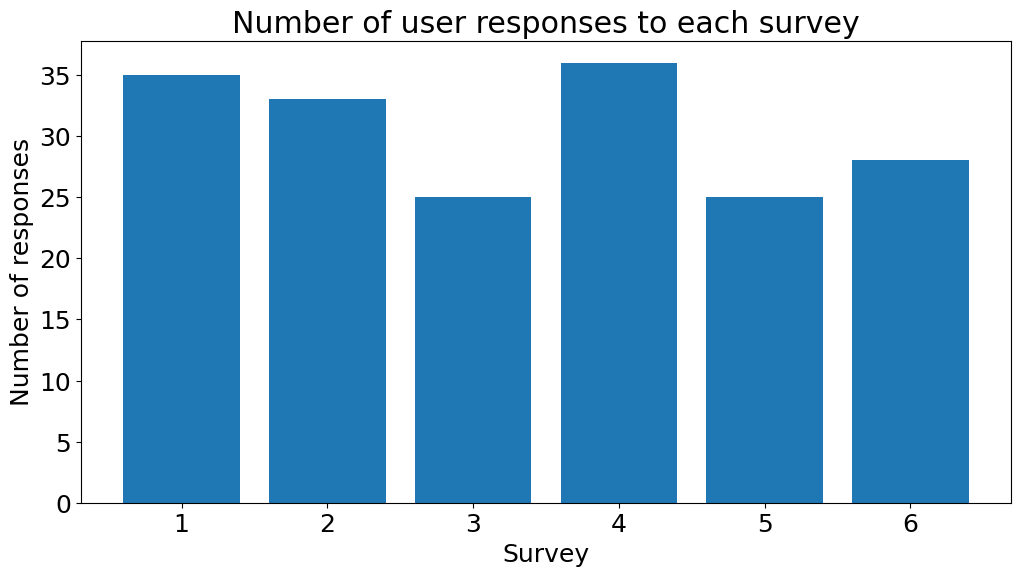

In [8]:
f, ax = plt.subplots(figsize=(12,6))
plt.bar([1,2,3,4,5,6],n_users,width=0.8)
plt.xlabel("Survey")
plt.ylabel("Number of responses")
plt.title("Number of user responses to each survey")
#plt.savefig("Number of responses to each survey.jpg")

9 users identified as having visual impairment

4    126
1     44
3     10
2      2
Name: Astronomy proficiency/4, dtype: int64

4    145
2     16
3     11
1     10
Name: Data analysis proficiency/4, dtype: int64

1    88
2    57
3    20
4    17
Name: Music proficiency/4, dtype: int64


Text(0, 0.5, 'Percentage of users')

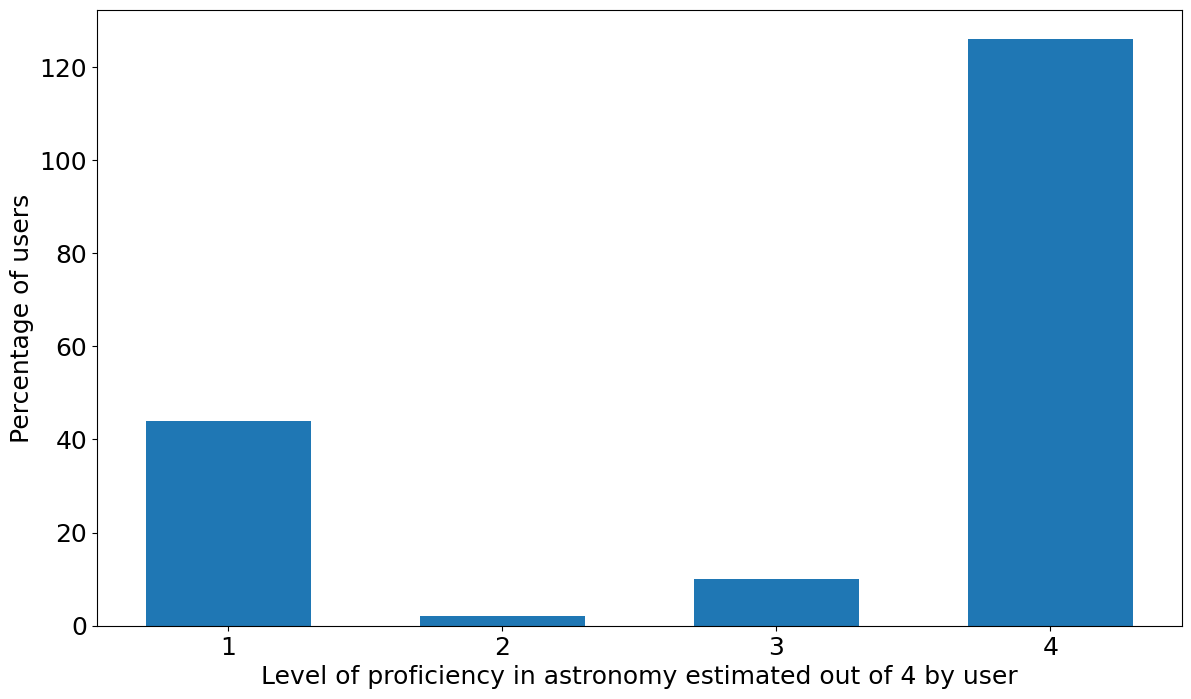

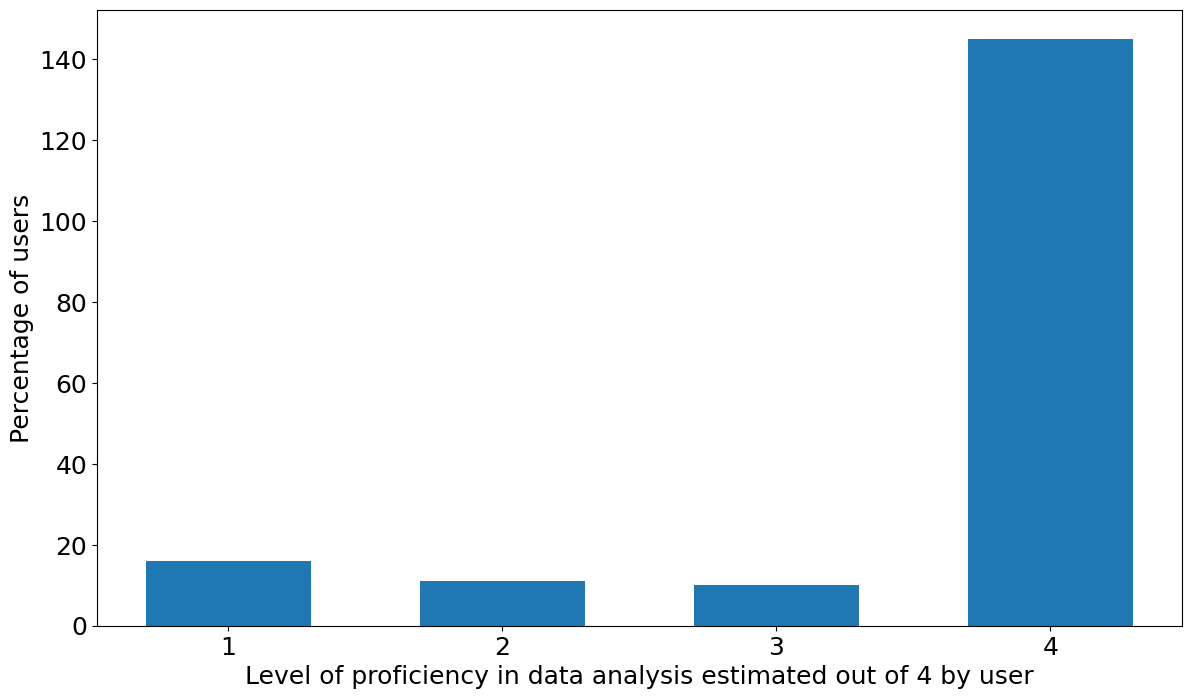

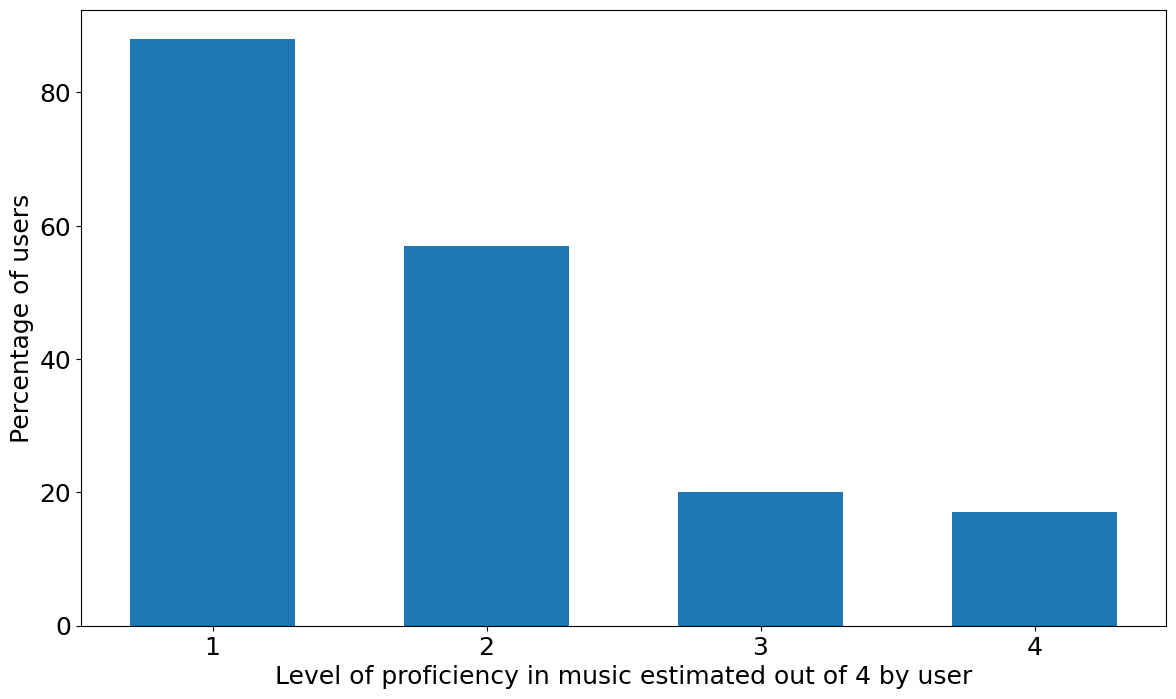

In [9]:
impair = weighting_matrix['Visual impairment Y/N'].value_counts(sort=True, ascending=True)
print(impair[0],"users identified as having visual impairment")
print()
#----------------------------------------------------------------------------------------------------
astroprof = weighting_matrix['Astronomy proficiency/4'].value_counts(normalize=False)
print(astroprof)
print()
astroprof_x = np.linspace(1,4,4)
astroprof_y = [astroprof[1],astroprof[3],astroprof[2],astroprof[0]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(astroprof_x,astroprof_y,width=0.6)
plt.xticks([1,2,3,4])
#plt.plot(astroprof_x,astroprof_y,'b.')
plt.xlabel("Level of proficiency in astronomy estimated out of 4 by user")
plt.ylabel("Percentage of users")

#----------------------------------------------------------------------------------------------------
dataprof = weighting_matrix['Data analysis proficiency/4'].value_counts(normalize=False)
print(dataprof)
print()
dataprof_x = np.linspace(1,4,4)
dataprof_y = [dataprof[1],dataprof[2],dataprof[3],dataprof[0]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(dataprof_x,dataprof_y,width=0.6)
plt.xticks([1,2,3,4])
plt.xlabel("Level of proficiency in data analysis estimated out of 4 by user")
plt.ylabel("Percentage of users")

#----------------------------------------------------------------------------------------------------
musicprof = weighting_matrix['Music proficiency/4'].value_counts(normalize=False)
print(musicprof)
musicprof_x = np.linspace(1,4,4)
musicprof_y = [musicprof[0],musicprof[1],musicprof[2],musicprof[3]]

f, ax = plt.subplots(figsize=(14,8))
plt.bar(musicprof_x,musicprof_y,width=0.6)
plt.xticks([1,2,3,4])
plt.xlabel("Level of proficiency in music estimated out of 4 by user")
plt.ylabel("Percentage of users")

## Combined plots

([<matplotlib.axis.XTick at 0x29567b4ea00>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

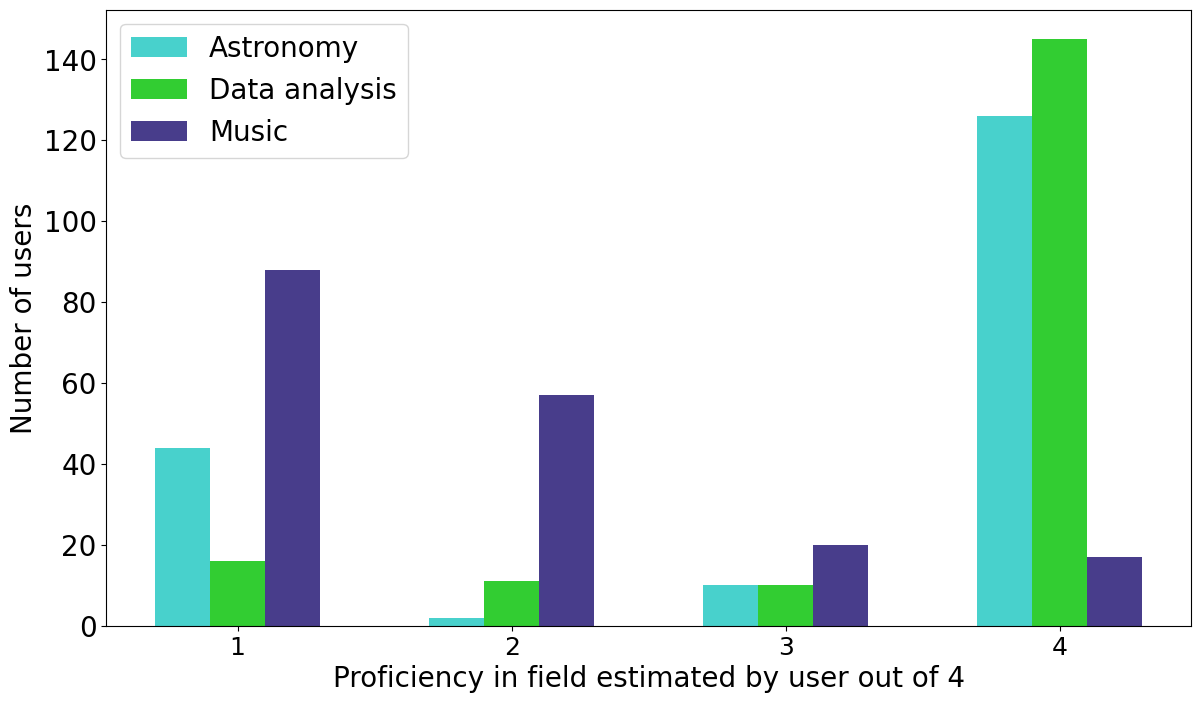

In [10]:
matplotlib.rcParams.update({'font.size': 20})
f, ax = plt.subplots(111,figsize=(14,8))
ax = plt.subplot(111)
ax.bar(astroprof_x-0.2, astroprof_y, width=0.2, color='mediumturquoise', align='center',label='Astronomy')
ax.bar(dataprof_x, dataprof_y, width=0.2, color='limegreen', align='center',label='Data analysis')
ax.bar(musicprof_x+0.2, musicprof_y, width=0.2, color='darkslateblue', align='center',label='Music')
ax.set_xlabel("Proficiency in field estimated by user out of 4")
ax.set_ylabel("Number of users")
ax.legend(loc='best')

plt.xticks([1,2,3,4],fontsize=18)
#plt.gcf()
#plt.savefig("Combined bar chart of demographics.jpg")

We can see from the first figure and the three previous plots that the large majority of users put 4/4 for their responses to the data analysis and astronomy questions. Therefore, I'm going to consider 4/4 as an expert and anything less as not an expert. This will give us the strongest statistical result while maximizing size of the data set. 

Now, we'll convert the 'weighting matrix' so that the numerical responses to these first two demographics questions are converted to simple Y/N responses (i.e. the question being 'would you consider yourself an expert in this field').

The next cell produces two figures: a table showing the number of users for each possible response, and the groupings of users for the astronomy and data analysis expertise questions.

In [11]:
import dataframe_image as dfi # pip install dataframe_image

bvi = [] # This is a list of indices of BVI users, which we're going to remove as the numbers are too small.
for i in range(0,len(weighting_matrix)):
    if weighting_matrix.loc[i,'Visual impairment Y/N'] == 'Yes':
        bvi.append(i)
    
responses = pd.DataFrame({'Astro expert Y': [],
                          'Astro expert N': [],
                          'Data expert Y': [],
                          'Data expert N': [],
                          'Music proficiency/4': []})

astro = []
data = []
music = []

def convertyn():

    global responses
    global astro
    global data
    global music
    
    astro_resp = weighting_matrix["Astronomy proficiency/4"].tolist()

    astro_respint = []
    astro = []
    
    for sublist in astro_resp:
        for item in sublist:
            if item == '':
                astro_respint.append(0)#astro_resp.remove(sublist)
            else:
                astro_respint.append(int(item))
    for i in astro_respint:
        if i == 4:
            astro.append('Y')
        else:
            astro.append('N')

    data_resp = weighting_matrix["Data analysis proficiency/4"].tolist()

    data_respint = []
    data = []
    
    for sublist in data_resp:
        for item in sublist:
            if item == '':
                data_resp.remove(sublist)
            else:
                data_respint.append(int(item))
    for i in data_respint:
        if i == 4:
            data.append('Y')
        else:
            data.append('N')

    music_resp = weighting_matrix["Music proficiency/4"].tolist()

    music_respint = []
    music = []
    
    for sublist in music_resp:
        for item in sublist:
            if item == '':
                music_respint.append(0)
            else:
                music_respint.append(int(item))
    music = music_respint
            
    print(len(music),len(astro),len(data))
            
    for i in range(0,len(astro)):
        
        if astro[i] == 'Y':
            responses.loc[i, 'Astro expert Y'] = True
            responses.loc[i, 'Astro expert N'] = False
        
        else:
            responses.loc[i, 'Astro expert Y'] = False
            responses.loc[i, 'Astro expert N'] = True
            
        if data[i] == 'Y':
            responses.loc[i, 'Data expert Y'] = True
            responses.loc[i, 'Data expert N'] = False
            
        else:
            responses.loc[i, 'Data expert Y'] = False
            responses.loc[i, 'Data expert N'] = True
            
        responses.at[i,'Music proficiency/4'] = music[i] # Dropping any responses that weren't given as a number 1-4

convertyn()
display(responses)

values = responses.value_counts(sort=False).to_frame()
dfi.export(values,'values.png')

responses_drop = responses.drop(columns=['Music proficiency/4'])
values_drop = responses_drop.value_counts(sort=True).to_frame()
dfi.export(values_drop,'values_drop.png')

display(values,values_drop)

182 182 182


,Astro expert Y,Astro expert N,Data expert Y,Data expert N,Music proficiency/4
0,True,False,True,False,1.0
1,True,False,True,False,1.0
2,True,False,True,False,2.0
3,True,False,True,False,4.0
4,False,True,False,True,1.0
5,True,False,True,False,1.0
6,True,False,True,False,1.0
7,True,False,True,False,2.0
8,True,False,True,False,1.0
9,False,True,True,False,2.0


0
Astro expert Y Astro expert N Data expert Y Data expert N Music proficiency/4    
False          True           False         True          1.0                  14
                                                          2.0                  13
                                                          3.0                   1
                                                          4.0                   8
                              True          False         1.0                   8
                                                          2.0                  12
True           False          False         True          1.0                   1
                              True          False         1.0                  65
                                                          2.0                  32
                                                          3.0                  19
                                                          4.0                   9

0
Astro expert Y Astro expert N Data expert Y Data expert N     
True           False          True          False          125
False          True           False         True            36
                              True          False           20
True           False          False         True             1

# Setting up for data analysis

## Separating our subgroups

In [12]:
global responses
global weighting_matrix

expert = responses # Create a matrix from the responses of only experts
nexpert = responses # And another of non-experts

expert = expert[expert['Astro expert Y'] != False]
expert = expert[expert['Data expert Y'] != False]
nexpert = nexpert[nexpert['Astro expert N'] != False]
nexpert = nexpert[nexpert['Data expert N'] != False]

display(expert,nexpert,len(expert),len(nexpert))

,Astro expert Y,Astro expert N,Data expert Y,Data expert N,Music proficiency/4
0,True,False,True,False,1.0
1,True,False,True,False,1.0
2,True,False,True,False,2.0
3,True,False,True,False,4.0
5,True,False,True,False,1.0
6,True,False,True,False,1.0
7,True,False,True,False,2.0
8,True,False,True,False,1.0
11,True,False,True,False,1.0
13,True,False,True,False,1.0


,Astro expert Y,Astro expert N,Data expert Y,Data expert N,Music proficiency/4
4,False,True,False,True,1.0
12,False,True,False,True,1.0
21,False,True,False,True,4.0
29,False,True,False,True,1.0
30,False,True,False,True,4.0
32,False,True,False,True,2.0
33,False,True,False,True,2.0
54,False,True,False,True,4.0
62,False,True,False,True,4.0
63,False,True,False,True,1.0


125

36

## Setting up for matching responses to questions

In [13]:
expert_sound = df_sound.copy(deep=True)
expert_visual = df_visual.copy(deep=True)
expert_video = df_video.copy(deep=True)

nexpert_sound = df_sound.copy(deep=True)
nexpert_visual = df_visual.copy(deep=True)
nexpert_video = df_video.copy(deep=True)

display(expert_sound)

,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
0,Here is the link to sonification 91: https://d...,1,,,,,,,,,3,1
1,Here is the link to sonification 174: https://...,0,,,,,,,,,100,1
2,Here is the link to sonification 49: https://d...,2,,,,,,,,,5,1
3,Here is the link to sonification 10: https://d...,1,,,,,,,,,30,1
4,Here is the link to sonification 64: https://d...,1,,,,,,,,,10,1
5,Here is the link to sonification 168: https://...,0,,,,,,,,,30,2
6,Here is the link to sonification 36: https://d...,2,,,,,,,,,30,2
7,Here is the link to sonification 17: https://d...,1,,,,,,,,,5,2
8,Here is the link to sonification 111: https://...,0,,,,,,,,,10,3
9,Here is the link to sonification 71: https://d...,2,,,,,,,,,100,3


In [14]:
def sorting_hat_success(sound,visual,video,query,success,responses,err,n0,n1,n2,n3,n4):

    if "sonification" in query: # question contains substring
        
        col = sound['Name']
    
        for i in range(0,len(col)):
            
            cell = sound.iloc[i]['Name']
            
            if query in cell:
                
                sound.at[i,'Number of correct answers'] = sound.at[i,'Number of correct answers'].replace('',str(success))
                sound.at[i,'Total responses'] = sound.at[i,'Total responses'].replace('',str(responses))
                sound.at[i,'# of 0s'] = sound.at[i,'# of 0s'].replace('',str(n0))
                sound.at[i,'# of 1s'] = sound.at[i,'# of 1s'].replace('',str(n1))
                sound.at[i,'# of 2s'] = sound.at[i,'# of 2s'].replace('',str(n2))
                sound.at[i,'# of 3s'] = sound.at[i,'# of 3s'].replace('',str(n3))
                sound.at[i,'# of 4s'] = sound.at[i,'# of 4s'].replace('',str(n4))
                sound.at[i,'σ'] = sound.at[i,'σ'].replace('',str(err))
                
    elif "plot" in query:

        col = visual['Name']
    
        for i in range(0,len(col)):
            
            cell = visual.iloc[i]['Name']
            
            if query in cell:
                
                visual.at[i,'Number of correct answers'] = visual.at[i,'Number of correct answers'].replace('',str(success))
                visual.at[i,'Total responses'] = visual.at[i,'Total responses'].replace('',str(responses))
                visual.at[i,'# of 0s'] = visual.at[i,'# of 0s'].replace('',str(n0))
                visual.at[i,'# of 1s'] = visual.at[i,'# of 1s'].replace('',str(n1))
                visual.at[i,'# of 2s'] = visual.at[i,'# of 2s'].replace('',str(n2))
                visual.at[i,'# of 3s'] = visual.at[i,'# of 3s'].replace('',str(n3))
                visual.at[i,'# of 4s'] = visual.at[i,'# of 4s'].replace('',str(n4))
                visual.at[i,'σ'] = visual.at[i,'σ'].replace('',str(err))
                
    else:

        col = video['Name']
    
        for i in range(0,len(col)):
            
            cell = video.iloc[i]['Name']
            
            if query in cell:
                
                video.at[i,'Number of correct answers'] = video.at[i,'Number of correct answers'].replace('',str(success))
                video.at[i,'Total responses'] = video.at[i,'Total responses'].replace('',str(responses))
                video.at[i,'# of 0s'] = video.at[i,'# of 0s'].replace('',str(n0))
                video.at[i,'# of 1s'] = video.at[i,'# of 1s'].replace('',str(n1))
                video.at[i,'# of 2s'] = video.at[i,'# of 2s'].replace('',str(n2))
                video.at[i,'# of 3s'] = video.at[i,'# of 3s'].replace('',str(n3))
                video.at[i,'# of 4s'] = video.at[i,'# of 4s'].replace('',str(n4))
                video.at[i,'σ'] = video.at[i,'σ'].replace('',str(err))

In [15]:
def filter_float(arr):
    
    output = []
    
    for i in arr:
        
        if len(i) == 0:
            arr.remove(i)
        elif len(i) == 41:
            arr.remove(i)
        else:
            output.append(i)
            
    return output

# Experts

## Accumulating the data

To obtain data for experts we'll obtain indices corresponding to responses we DON'T want, and then filtering these out. We can then duplicate these cells for any demographic subset.

In [16]:
to_remove = []

off = list(nexpert.index.values)
for i in off:
    to_remove.append(i)
for i in bvi:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)
#print(to_remove)

## lists of indices relative to each survey
n1remove = [] 
n2remove = []
n3remove = []
n4remove = []
n5remove = []
n6remove = []

for x in to_remove:
    if -1 < x <= n_users[0]-1:
        n1remove.append(x)
        
    elif n_users[0] <= x <= n_users[1]+n_users[0]-1:
        n2remove.append(x - n_users[0])
        
    elif n_users[1]+n_users[0] <= x <= n_users[1]+n_users[0]+n_users[2]-1:
        n3remove.append(x - (n_users[1]+n_users[0]))
        
    elif n_users[1]+n_users[0]+n_users[2] <= x <= n_users[1]+n_users[0]+n_users[2]+n_users[3]-1:
        n4remove.append(x-(n_users[1]+n_users[0]+n_users[2]))
        
    elif n_users[1]+n_users[0]+n_users[2]+n_users[3] <= x <= n_users[1]+n_users[0]+n_users[2]+n_users[3]+n_users[4]-1:
        n5remove.append(x-(n_users[1]+n_users[0]+n_users[2]+n_users[3]))
        
    else:
        n6remove.append(x-(n_users[1]+n_users[0]+n_users[2]+n_users[3]+n_users[4]))
        
#print("Remove indices", n1remove, "from Survey 1 responses")
#print("Remove indices", n2remove, "from Survey 2 responses")
#print("Remove indices", n3remove, "from Survey 3 responses")
#print("Remove indices", n4remove, "from Survey 4 responses")
#print("Remove indices", n5remove, "from Survey 5 responses")
#print("Remove indices", n6remove, "from Survey 6 responses")

In [17]:
print("sanity check",len(n1remove)+len(n2remove)+len(n3remove)+len(n4remove)+len(n5remove)+len(n6remove))

sanity check 45


In [18]:
global n1remove
global n2remove
global n3remove
global n4remove
global n5remove
global n6remove

def condition(name_string,arr):
    
    if '1' in name_string:
        
        temp_1 = pd.DataFrame({'Response': arr})
        
        for x in n1remove:
            temp_1 = temp_1[temp_1.index != x]
            
        out = temp_1['Response'].tolist()
        return out
    
    elif '2' in name_string:
        
        temp_2 = pd.DataFrame({'Response': arr})
        
        for x in n2remove:
            temp_2 = temp_2[temp_2.index != x]
            
        out = temp_2['Response'].tolist()
        return out
    
    elif '3' in name_string:
        
        temp_3 = pd.DataFrame({'Response': arr})
        
        for x in n3remove:
            temp_3 = temp_3[temp_3.index != x]
            
        out = temp_3['Response'].tolist()
        return out
        
    elif '4' in name_string:
        
        temp_4 = pd.DataFrame({'Response': arr})
        
        for x in n4remove:
            temp_4 = temp_4[temp_4.index != x]
            
        out = temp_4['Response'].tolist()
        return out
        
    elif '5' in name_string:
        
        temp_5 = pd.DataFrame({'Response': arr})
        
        for x in n5remove:
            temp_5 = temp_5[temp_5.index != x]
            
        out = temp_5['Response'].tolist()
        return out
        
    else:
        
        temp_6 = pd.DataFrame({'Response': arr})
        
        for x in n6remove:
            temp_6 = temp_6[temp_6.index != x]
            
        out = temp_6['Response'].tolist()
        return out

In [19]:
def sort_errors(success,error): 

    uplim = error
    lolim = error

    for k in range(0,len(success)): 
        
        if success[k] == 100.0:
            uplim[k] = 0
        
        elif error[k] + success[k] > 100:
            uplim[k] = 99.9 - success[k]

        elif success[k] - error[k] <= 0:
            lolim[k] = success[k]
            
        else:
            continue

    return uplim, lolim

In [20]:
total_responses_counter = 0

def search_function(survey_sheet):
    
    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1

    print(survey_sheet,"opened.")
    print("")

    global success_rates
    global snr
    global total_responses_counter
    global to_remove ## list of indexes of users whose responses we may want to remove.
    global weighting_matrix ## for optional referring to demographics

    success_rates = []
    snr = []

    for i in range(6,15): # iterating over each question in the survey
        
        questioncol = worksheet.col_values(i) # Obtaining the question string for each form.
        #print(questioncol)
        question = questioncol[0]
        responses = questioncol[1:] # Getting the responses given to the question. Take away indices we want to remove from lists in cells above.
        n_users = len(responses)
        #print(n_users)
        
        responses = condition(survey_sheet,responses)
        
        for j in range(0,len(df_master['Questions from master'])): # Matching up sorted data using sortinghat and appending to databases.

            if df_master.iloc[j]['Questions from master'] == question:
                #print("I found",question,"in the master")
                #print("It's value of snr is",df_master.iloc[j]['snr'])
                #print("The correct answer was",df_master.iloc[j]['correct value'],"transit")
                #print("The responses were",responses)
                
                sigma = np.sqrt(len(responses))#np.std(np.array(filter_float(responses)).astype(np.float))#
                
                ks = np.array(filter_float(responses)).astype(np.float)
                #flat = scipy.stats.kstest(ks,'randint',args=(0,4))
                
                bool_list = []

                ## Search across the three databases for the relevant string, then once found
                ## search for the relevant snr. 

                for k in responses: ## Success rate calculation here
                
                        test = list(map(lambda x, y: x == y, df_master.iloc[j]['Correct value'], k))
                        bool_list = bool_list + test

                #print(bool_list)

                true_count = sum(bool_list)
                #print("got a true count of ",true_count)
                #print("got",len(responses),"responses")
                #perc = true_count/len(bool_list)*100.0

                sorting_hat_success(expert_sound,expert_visual,expert_video,
                                    question,true_count,
                                    len(responses),sigma,
                                    #flat[0],flat[1],
                                    responses.count('0'),responses.count('1'),
                                    responses.count('2'),responses.count('3'),
                                    responses.count('4'))

            else:
                continue
                
for x in names:
    search_function(x)
    #time.sleep(3)

print("Responses and correct answers calculated")

#print(success_rates,snr)

Survey 1 (Responses) opened.

Survey 2 (Responses) opened.

Survey 3 (Responses) opened.

Survey 4 (Responses) opened.

Survey 5 (Responses) opened.

Survey 6 (Responses) opened.

Responses and correct answers calculated


In [21]:
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

str_df = [get_df_name(expert_sound),get_df_name(expert_visual),get_df_name(expert_video)]

sets_expert = pd.DataFrame({'Data':[expert_sound,expert_visual,expert_video],
                    'String': str_df})

def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)
    
for x in sets_expert['Data']:
    sort(x)
    display(x)

,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
8,Here is the link to sonification 111: https://...,0,13,19,13,2,3,1,0,4.358898943540674,10,3
14,Here is the link to sonification 161: https://...,0,15,17,15,0,0,2,0,4.123105625617661,7,5
10,Here is the link to sonification 123: https://...,0,17,19,17,2,0,0,0,4.358898943540674,5,3
5,Here is the link to sonification 168: https://...,0,20,24,20,2,1,0,1,5.0,30,2
17,Here is the link to sonification 110: https://...,0,17,19,17,2,0,0,0,4.358898943540674,3,6
1,Here is the link to sonification 174: https://...,0,22,27,22,2,1,1,1,5.196152422706632,100,1
3,Here is the link to sonification 10: https://d...,1,24,27,1,24,2,0,0,5.196152422706632,30,1
7,Here is the link to sonification 17: https://d...,1,2,25,22,2,0,1,0,5.0,5,2
16,Here is the link to sonification 59: https://d...,1,19,19,0,19,0,0,0,4.358898943540674,100,6
12,Here is the link to sonification 28: https://d...,1,11,29,18,11,0,0,0,5.477225575051661,7,4


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
0,Here is the link to plot 111: https://drive.go...,0,23,24,23,1,0,0,0,5.196152422706632,10,1
14,Here is the link to plot 174: https://drive.go...,0,16,16,16,0,0,0,0,4.123105625617661,100,5
13,Here is the link to plot 123: https://drive.go...,0,17,17,17,0,0,0,0,4.123105625617661,5,5
3,Here is the link to plot 161: https://drive.go...,0,21,21,21,0,0,0,0,5.0,7,2
6,Here is the link to plot 110: https://drive.go...,0,21,24,21,3,0,0,0,5.0,3,2
16,Here is the link to plot 168: https://drive.go...,0,17,17,17,0,0,0,0,4.358898943540674,30,6
12,Here is the link to plot 59: https://drive.goo...,1,16,17,1,16,0,0,0,4.123105625617661,100,5
10,Here is the link to plot 10: https://drive.goo...,1,30,30,0,30,0,0,0,5.477225575051661,30,4
9,Here is the link to plot 17: https://drive.goo...,1,1,18,17,1,0,0,0,4.358898943540674,5,3
8,Here is the link to plot 64: https://drive.goo...,1,13,19,2,13,4,0,0,4.358898943540674,10,3


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
0,Here is the link to video 110: https://drive.g...,0,21,27,21,5,0,0,1,5.196152422706632,3,1
15,Here is the link to video 111: https://drive.g...,0,17,18,17,1,0,0,0,4.358898943540674,10,6
12,Here is the link to video 168: https://drive.g...,0,15,17,15,1,0,0,1,4.123105625617661,30,5
11,Here is the link to video 161: https://drive.g...,0,29,29,29,0,0,0,0,5.477225575051661,7,4
10,Here is the link to video 123: https://drive.g...,0,30,30,30,0,0,0,0,5.477225575051661,5,4
9,Here is the link to video 174: https://drive.g...,0,28,28,28,0,0,0,0,5.477225575051661,100,4
14,Here is the link to video 10: https://drive.go...,1,18,18,0,18,0,0,0,4.358898943540674,30,6
13,Here is the link to video 17: https://drive.go...,1,0,19,19,0,0,0,0,4.358898943540674,5,6
8,Here is the link to video 59: https://drive.go...,1,30,30,0,30,0,0,0,5.477225575051661,100,4
5,Here is the link to video 28: https://drive.go...,1,14,19,4,14,1,0,0,4.358898943540674,7,3


## Data analysis for the experts

### Quantifying the random guess percentage (this needs thinking about).

In [39]:
rtz = 0
onestwos = 0

for i in sets_expert['Data']:
    
    j = i.iloc[0:6]
    #display(j)
    
    for k in range(0,len(j['Name'])):
        
        nu = j.iloc[k]['Total responses']
        #print("Responses", nu)
        rtz = rtz + float(nu) # Sum
        #print("Total responses", rtz)
        
        mu = float(j.iloc[k]['# of 1s']) + float(j.iloc[k]['# of 2s'])
        #print("Add # of 1s and 2s",mu)
        onestwos = onestwos + mu
        #print("Total ones and twos responses", onestwos)
        
expert0guess = onestwos/rtz*100
print("Guess percentage =",expert0guess)

Guess percentage = 6.615776081424936


### n = 0 data for experts - limit error bar values, and save the success rates and errors as a global variable for producing the combined figure after the fact

<ipython-input-26-37942e19dab6>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)
<ipython-input-26-37942e19dab6>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


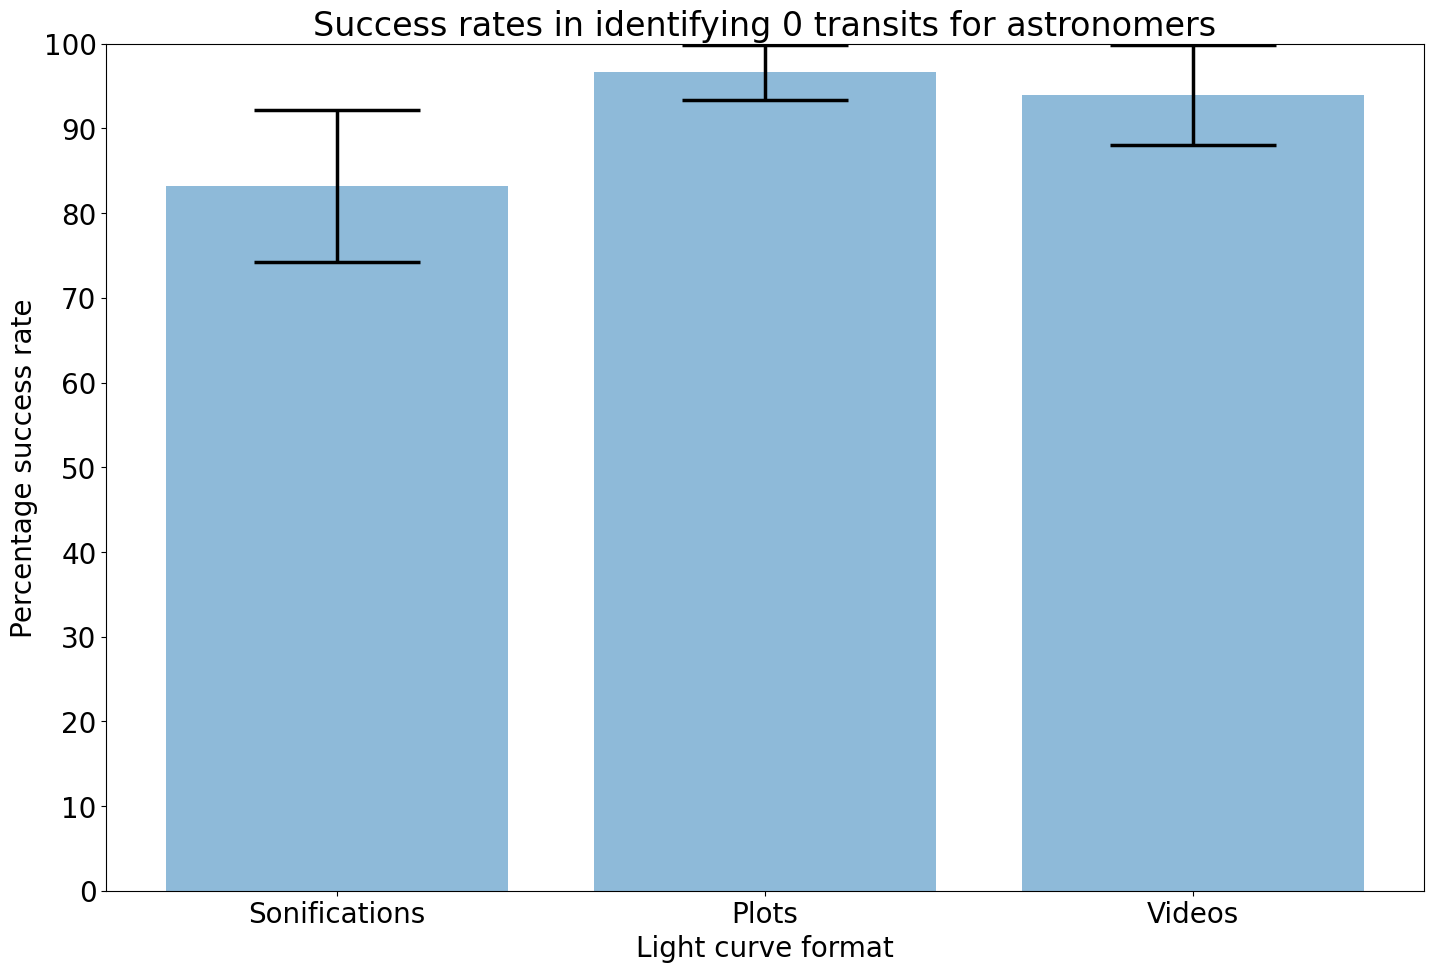

In [26]:
suc_expert = []
errsuc_expert = []

for i in sets_expert['Data']:
    
    j = i.iloc[0:6]
    #display(j)
    
    tot_n = 0
    tot_resp = 0
    
    global suc_expert
    global errsuc_expert
    
    for k in range(0,len(j['Name'])):
        n = j.iloc[k]['Number of correct answers']
        resp = j.iloc[k]['Total responses']
        
        #print(n,resp)
        tot_n = tot_n + float(n)
        tot_resp = tot_resp + float(resp)
        
        #print(tot_n,tot_resp)
        
    suc_expert.append(tot_n/tot_resp*100)
    errsuc_expert.append(np.sqrt(tot_resp)/tot_resp*100)

errsuc_expert_0 = sort_errors(suc_expert,errsuc_expert)    
    
f, ax = plt.subplots(figsize=(17,11))
ax.bar([1,2,3], suc_expert, yerr=errsuc_expert_0, error_kw=dict(capthick=2.5, elinewidth=2.5, ecolor='black'), alpha=0.5,align='center', ecolor='black', capsize=60) 
plt.ylim([0, 100])
ax.set_ylabel("Percentage success rate")
ax.set_xlabel("Light curve format")
ax.set_title("Success rates in identifying 0 transits for astronomers")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
x_locator = ticker.FixedLocator([1,2,3])
y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_major_locator(y_locator)
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)

### n = 1, 2 data for astronomers (need a guess perc calculation before this)

<ipython-input-28-16b80eb99c26>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
4,Here is the link to sonification 64: https://d...,1,8,27,2,8,16,1,0,5.196152422706632,10,1
11,Here is the link to sonification 94: https://d...,2,6,30,12,12,6,0,0,5.477225575051661,10,4
16,Here is the link to sonification 59: https://d...,1,19,19,0,19,0,0,0,4.358898943540674,100,6
9,Here is the link to sonification 71: https://d...,2,19,19,0,0,19,0,0,4.358898943540674,100,3
0,Here is the link to sonification 91: https://d...,1,1,27,25,1,1,0,0,5.196152422706632,3,1
15,Here is the link to sonification 18: https://d...,2,2,17,8,6,2,1,0,4.123105625617661,3,5
3,Here is the link to sonification 10: https://d...,1,24,27,1,24,2,0,0,5.196152422706632,30,1
6,Here is the link to sonification 36: https://d...,2,23,25,1,0,23,1,0,5.0,30,2
7,Here is the link to sonification 17: https://d...,1,2,25,22,2,0,1,0,5.0,5,2
2,Here is the link to sonification 49: https://d...,2,4,27,17,6,4,0,0,5.196152422706632,5,1


<ipython-input-28-16b80eb99c26>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
8,Here is the link to plot 64: https://drive.goo...,1,13,19,2,13,4,0,0,4.358898943540674,10,3
17,Here is the link to plot 94: https://drive.goo...,2,10,19,2,7,10,0,0,4.358898943540674,10,6
12,Here is the link to plot 59: https://drive.goo...,1,16,17,1,16,0,0,0,4.123105625617661,100,5
1,Here is the link to plot 71: https://drive.goo...,2,26,27,1,0,26,0,0,5.196152422706632,100,1
2,Here is the link to plot 91: https://drive.goo...,1,0,24,24,0,0,0,0,5.196152422706632,3,1
11,Here is the link to plot 18: https://drive.goo...,2,1,16,14,1,1,0,0,4.123105625617661,3,5
10,Here is the link to plot 10: https://drive.goo...,1,30,30,0,30,0,0,0,5.477225575051661,30,4
15,Here is the link to plot 36: https://drive.goo...,2,17,17,0,0,17,0,0,4.123105625617661,30,5
9,Here is the link to plot 17: https://drive.goo...,1,1,18,17,1,0,0,0,4.358898943540674,5,3
5,Here is the link to plot 49: https://drive.goo...,2,11,25,10,4,11,0,0,5.0,5,2


<ipython-input-28-16b80eb99c26>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
3,Here is the link to video 64: https://drive.go...,1,15,19,1,15,3,0,0,4.358898943540674,10,3
17,Here is the link to video 94: https://drive.go...,2,5,19,4,10,5,0,0,4.358898943540674,10,6
8,Here is the link to video 59: https://drive.go...,1,30,30,0,30,0,0,0,5.477225575051661,100,4
16,Here is the link to video 71: https://drive.go...,2,19,19,0,0,19,0,0,4.358898943540674,100,6
2,Here is the link to video 91: https://drive.go...,1,0,19,19,0,0,0,0,4.358898943540674,3,3
6,Here is the link to video 18: https://drive.go...,2,0,30,25,4,0,1,0,5.477225575051661,3,4
14,Here is the link to video 10: https://drive.go...,1,18,18,0,18,0,0,0,4.358898943540674,30,6
7,Here is the link to video 36: https://drive.go...,2,30,30,0,0,30,0,0,5.477225575051661,30,4
13,Here is the link to video 17: https://drive.go...,1,0,19,19,0,0,0,0,4.358898943540674,5,6
1,Here is the link to video 49: https://drive.go...,2,10,25,12,2,10,1,0,5.0,5,2


<ipython-input-28-16b80eb99c26>:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)
<ipython-input-28-16b80eb99c26>:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


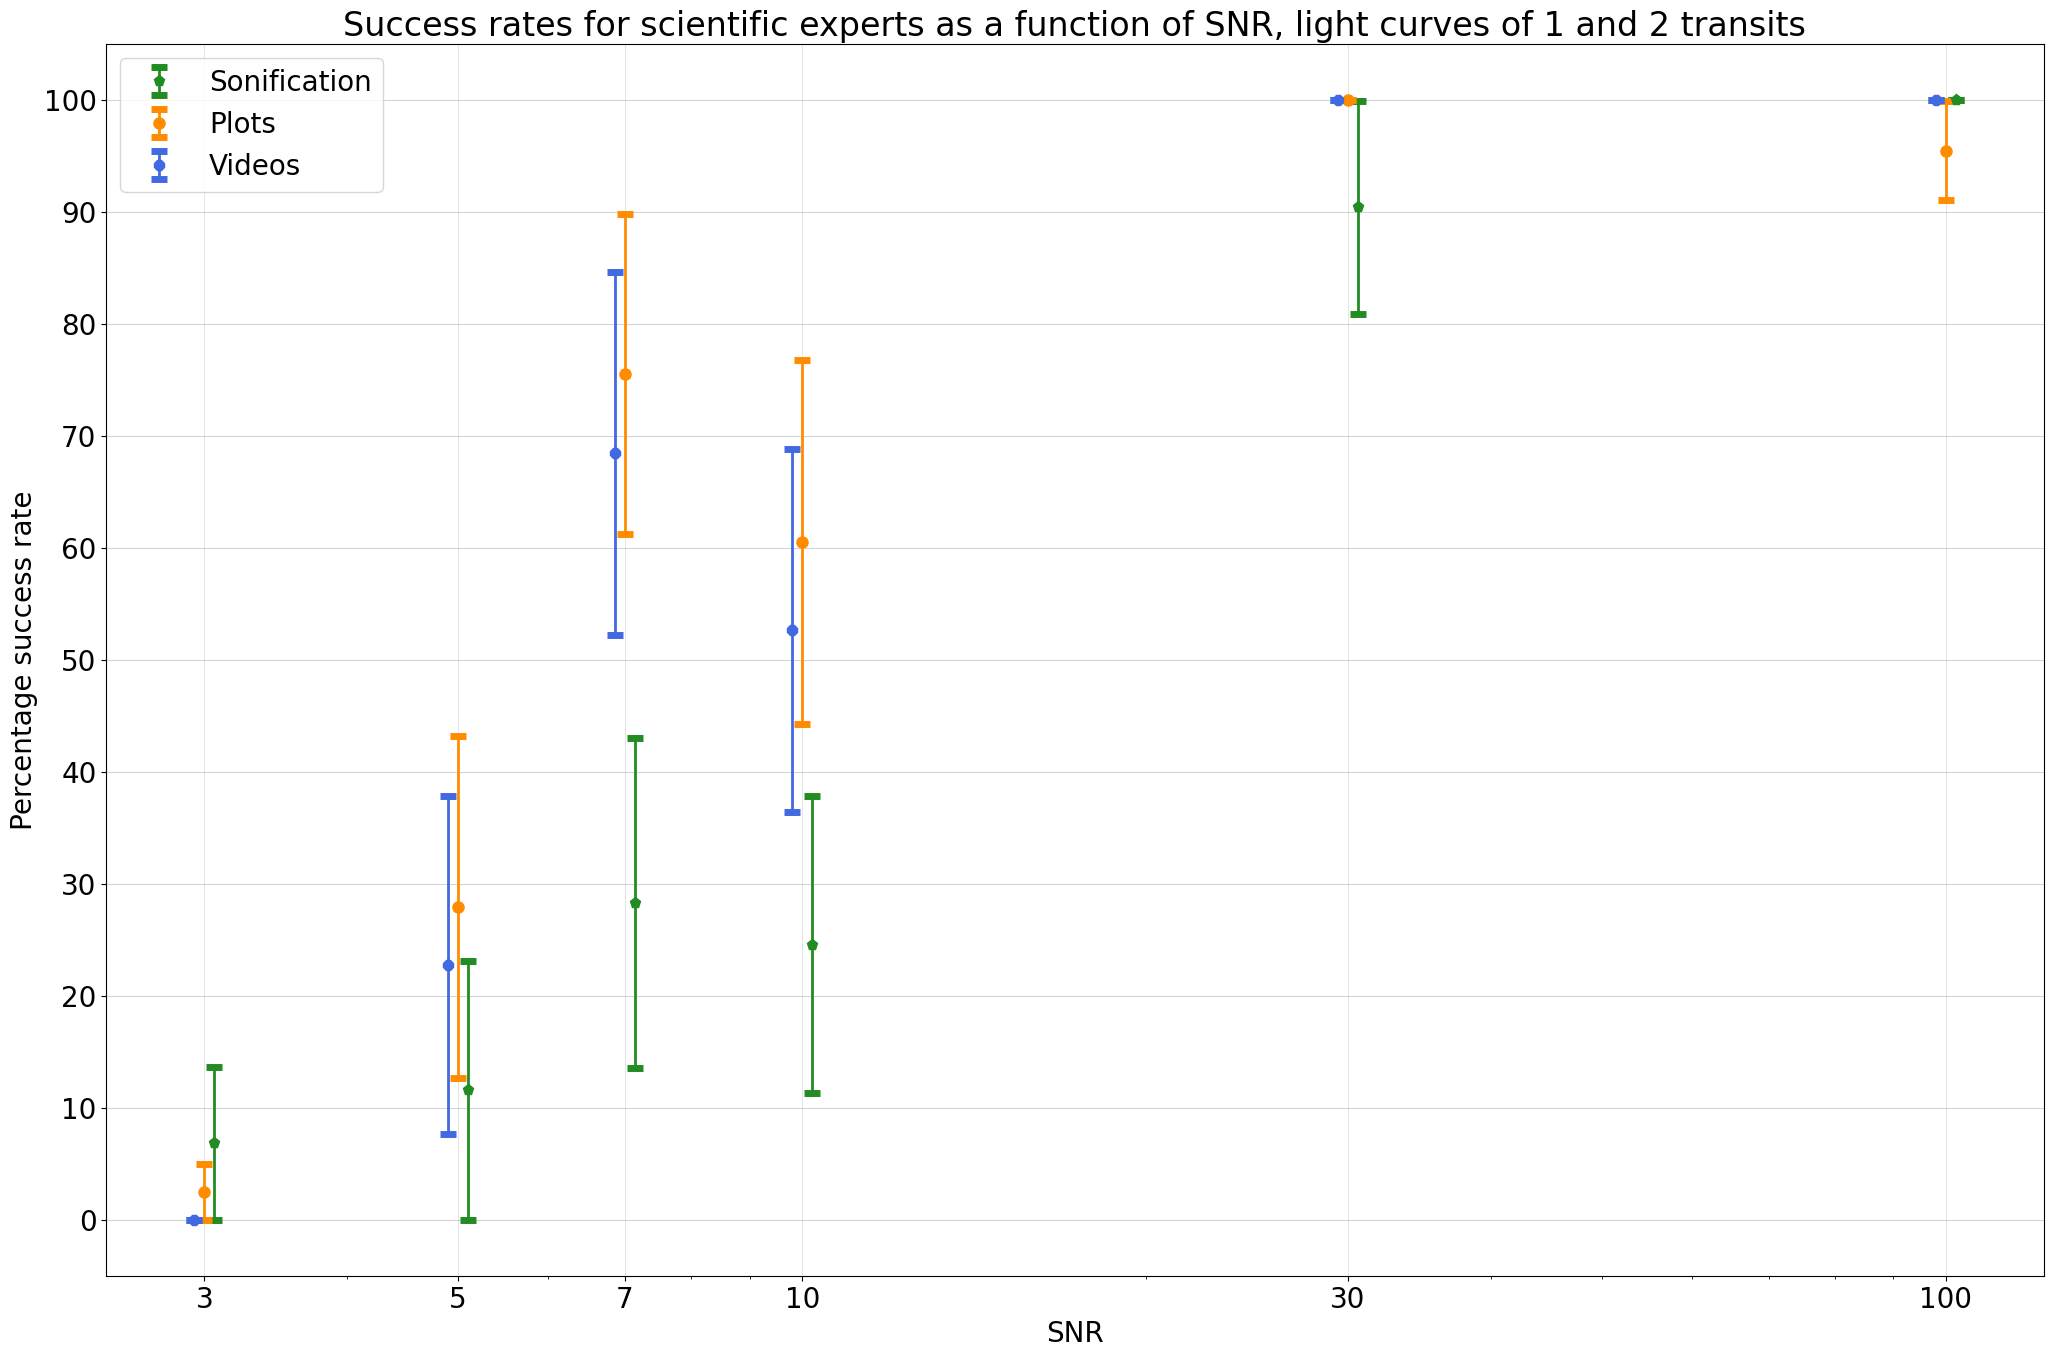

In [28]:
suc_expert12_sound = []
suc_expert12_sounderr = []

suc_expert12_visual = []
suc_expert12_visualerr = []

suc_expert12_video = []
suc_expert12_videoerr = []

snr = []

def sort(df):
    df.sort_values(by=['SNR'], ascending=True,inplace=True)

for i in sets_expert['Data']:
    
    j = i.iloc[6:18]

    sort(j)
    display(j)
    
    for k in range(0,len(j['Name']),2):
        
        if len(snr) < 6:  
            snr.append(int(j.iloc[k]['SNR']))
        
        if "sonification" in j.iloc[0]['Name']: 

            global suc_expert12_sound
            
            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            suc_expert12_sound.append(correct/tot*100.0)
            suc_expert12_sounderr.append(err*100.0)
            
            #print(suc_expert12_sound,suc_expert12_sounderr)
    
        elif "plot" in j.iloc[0]['Name']: 

            global suc_expert12_visual

            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            suc_expert12_visual.append(correct/tot*100.0)
            suc_expert12_visualerr.append(err*100.0)
            
        else:

            global suc_expert12_video

            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            suc_expert12_video.append(correct/tot*100.0)
            suc_expert12_videoerr.append(err*100.0)
            
f, ax = plt.subplots(figsize=(25, 16))

a = sort_errors(suc_expert12_sound,suc_expert12_sounderr)
b = sort_errors(suc_expert12_visual,suc_expert12_visualerr)
c = sort_errors(suc_expert12_video,suc_expert12_videoerr)


plt.errorbar([i + 0.02*i for i in snr], suc_expert12_sound, yerr=a, capthick=5, elinewidth=2,
             xerr=None,color = 'forestgreen', linestyle="None", 
             marker='p', markersize=8, capsize=5.5, label='Sonification')

plt.errorbar(snr, suc_expert12_visual, yerr=b, capthick=5, elinewidth=2,
             xerr=None, color='darkorange', linestyle="None", marker='o', 
             markersize=8, capsize=5.5, label='Plots')

plt.errorbar([i - 0.02*i for i in snr], suc_expert12_video,yerr=c, capthick=5, elinewidth=2,
             xerr=None,color='royalblue', linestyle="None", 
             marker='8', markersize=8, capsize=5.5, label='Videos')

#plt.hlines(guessperc, 1, 100, colors='k', linestyles='dashed', label='Estimated guess percentage',color='dimgray')
plt.xscale("log")
plt.legend(loc="best")#,fontsize='xx-large')
ax.set_xlabel("SNR")
ax.set_ylabel("Percentage success rate")
ax.set_title("Success rates for scientific experts as a function of SNR, light curves of 1 and 2 transits")
x_formatter = ticker.FixedFormatter(["3","5","7","10","30","100"])
x_locator = ticker.FixedLocator([3,5,7,10,30,100])
y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_major_locator(y_locator)

plt.savefig("n = 1,2 transits, experts.jpg")

# Non-experts

## Accumulating the data

In [29]:
to_remove = []

off = list(expert.index.values)
for i in off:
    to_remove.append(i)
for i in bvi:
    if i in to_remove:
        continue
    else:
        to_remove.append(i)
#print(to_remove)

## lists of indices relative to each survey
n1remove = [] 
n2remove = []
n3remove = []
n4remove = []
n5remove = []
n6remove = []

for x in to_remove:
    if -1 < x <= n_users[0]-1:
        n1remove.append(x)
        
    elif n_users[0] <= x <= n_users[1]+n_users[0]-1:
        n2remove.append(x - n_users[0])
        
    elif n_users[1]+n_users[0] <= x <= n_users[1]+n_users[0]+n_users[2]-1:
        n3remove.append(x - (n_users[1]+n_users[0]))
        
    elif n_users[1]+n_users[0]+n_users[2] <= x <= n_users[1]+n_users[0]+n_users[2]+n_users[3]-1:
        n4remove.append(x-(n_users[1]+n_users[0]+n_users[2]))
        
    elif n_users[1]+n_users[0]+n_users[2]+n_users[3] <= x <= n_users[1]+n_users[0]+n_users[2]+n_users[3]+n_users[4]-1:
        n5remove.append(x-(n_users[1]+n_users[0]+n_users[2]+n_users[3]))
        
    else:
        n6remove.append(x-(n_users[1]+n_users[0]+n_users[2]+n_users[3]+n_users[4]))
        
#print("Remove indices", n1remove, "from Survey 1 responses")
#print("Remove indices", n2remove, "from Survey 2 responses")
#print("Remove indices", n3remove, "from Survey 3 responses")
#print("Remove indices", n4remove, "from Survey 4 responses")
#print("Remove indices", n5remove, "from Survey 5 responses")
#print("Remove indices", n6remove, "from Survey 6 responses")

In [30]:
print("sanity check",len(n1remove)+len(n2remove)+len(n3remove)+len(n4remove)+len(n5remove)+len(n6remove))

sanity check 126


In [31]:
total_responses_counter = 0

def search_function(survey_sheet):
    
    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1

    print(survey_sheet,"opened.")
    print("")

    global success_rates
    global snr
    global total_responses_counter
    global to_remove ## list of indexes of users whose responses we may want to remove.
    global weighting_matrix ## for optional referring to demographics

    success_rates = []
    snr = []

    for i in range(6,15): # iterating over each question in the survey
        
        questioncol = worksheet.col_values(i) # Obtaining the question string for each form.
        #print(questioncol)
        question = questioncol[0]
        responses = questioncol[1:] # Getting the responses given to the question. Take away indices we want to remove from lists in cells above.
        n_users = len(responses)
        #print(n_users)
        
        responses = condition(survey_sheet,responses)
        
        for j in range(0,len(df_master['Questions from master'])): # Matching up sorted data using sortinghat and appending to databases.

            if df_master.iloc[j]['Questions from master'] == question:
                #print("I found",question,"in the master")
                #print("It's value of snr is",df_master.iloc[j]['snr'])
                #print("The correct answer was",df_master.iloc[j]['correct value'],"transit")
                #print("The responses were",responses)
                
                sigma = np.sqrt(len(responses))#np.std(np.array(filter_float(responses)).astype(np.float))#
                
                ks = np.array(filter_float(responses)).astype(np.float)
                #flat = scipy.stats.kstest(ks,'randint',args=(0,4))
                
                bool_list = []

                ## Search across the three databases for the relevant string, then once found
                ## search for the relevant snr. 

                for k in responses: ## Success rate calculation here
                
                        test = list(map(lambda x, y: x == y, df_master.iloc[j]['Correct value'], k))
                        bool_list = bool_list + test

                #print(bool_list)

                true_count = sum(bool_list)
                #print("got a true count of ",true_count)
                #print("got",len(responses),"responses")
                #perc = true_count/len(bool_list)*100.0

                sorting_hat_success(nexpert_sound,nexpert_visual,nexpert_video,
                                    question,true_count,
                                    len(responses),sigma,
                                    #flat[0],flat[1],
                                    responses.count('0'),responses.count('1'),
                                    responses.count('2'),responses.count('3'),
                                    responses.count('4'))

            else:
                continue
                
for x in names:
    search_function(x)
    #time.sleep(3)

print("Responses and correct answers calculated")

#print(success_rates,snr)

Survey 1 (Responses) opened.

Survey 2 (Responses) opened.

Survey 3 (Responses) opened.

Survey 4 (Responses) opened.

Survey 5 (Responses) opened.

Survey 6 (Responses) opened.

Responses and correct answers calculated


In [32]:
def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name

str_df = [get_df_name(nexpert_sound),get_df_name(nexpert_visual),get_df_name(nexpert_video)]

sets_nexpert = pd.DataFrame({'Data':[nexpert_sound,nexpert_visual,nexpert_video],
                    'String': str_df})

def sort(df):
    df.sort_values(by=['Correct n'], inplace=True)
    
for x in sets_nexpert['Data']:
    sort(x)
    #display(x)

## Data analysis for the non-experts

### Estimating guess percentages

In [40]:
rtz = 0
onestwos = 0

for i in sets_nexpert['Data']:
    
    j = i.iloc[0:6]
    #display(j)
    
    for k in range(0,len(j['Name'])):
        
        nu = j.iloc[k]['Total responses']
        #print("Responses", nu)
        rtz = rtz + float(nu) # Sum
        #print("Total responses", rtz)
        
        mu = float(j.iloc[k]['# of 1s']) + float(j.iloc[k]['# of 2s'])
        #print("Add # of 1s and 2s",mu)
        onestwos = onestwos + mu
        #print("Total ones and twos responses", onestwos)
        
nexpert0guess = onestwos/rtz*100
print("Guess percentage =",nexpert0guess)

Guess percentage = 13.414634146341465


### n = 0 data for non-astronomers - limit error bar values, and save the success rates and errors as a global variable for producing the combined figure after the fact

<ipython-input-33-c191f67d1a98>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)
<ipython-input-33-c191f67d1a98>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


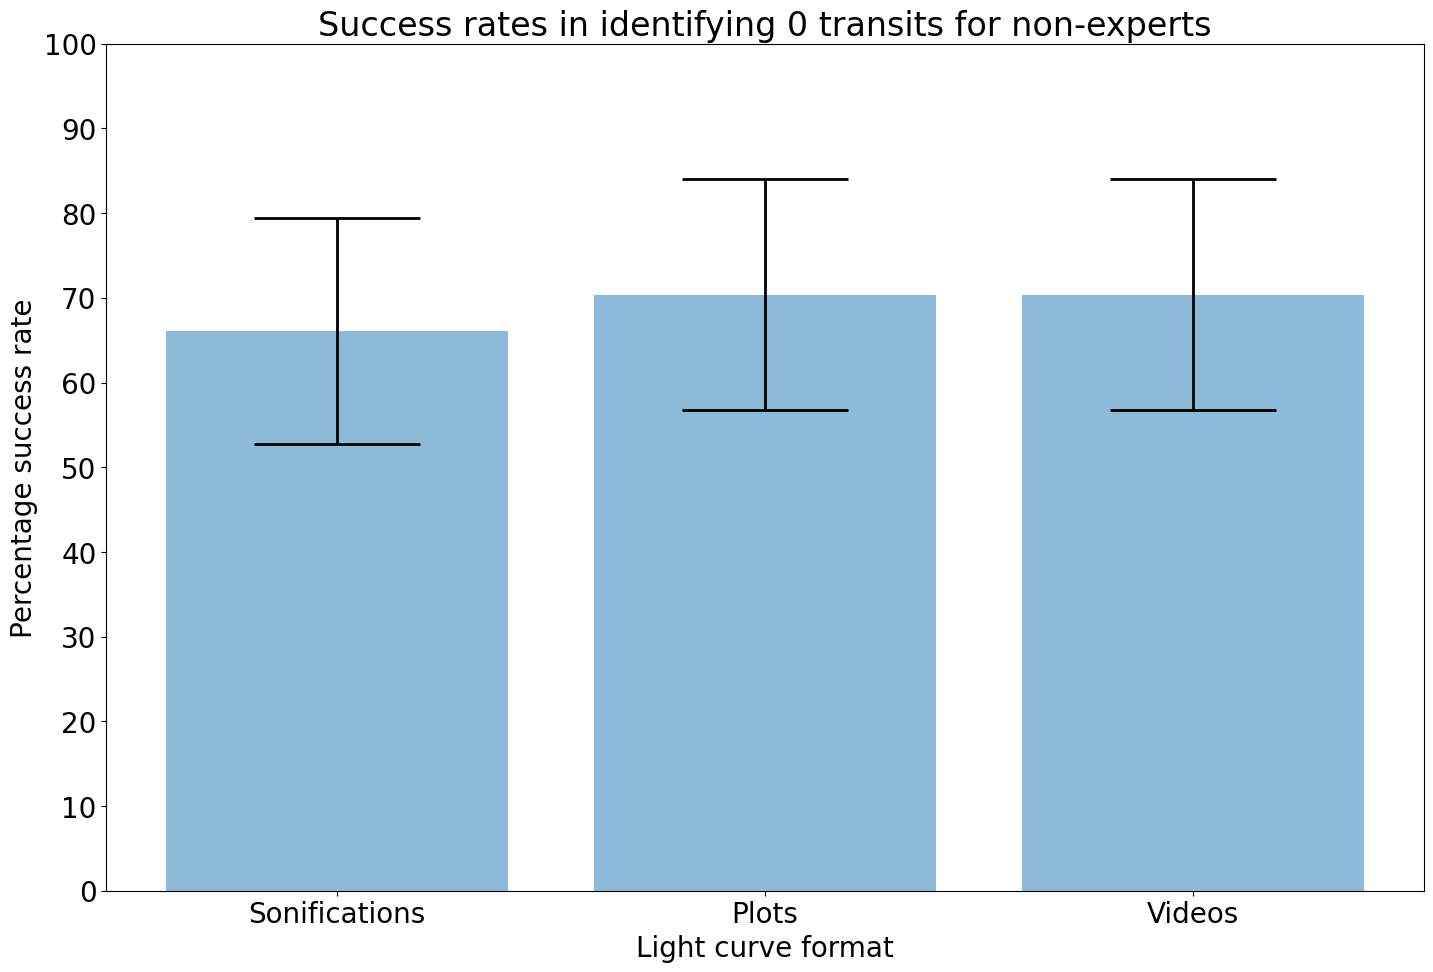

In [33]:
suc_nexpert = []
errsuc_nexpert = []

for i in sets_nexpert['Data']:
    
    j = i.iloc[0:6]
    #display(j)
    
    tot_n = 0
    tot_resp = 0
    
    global suc_nexpert
    global err_suc_nexpert
    
    for k in range(0,len(j['Name'])):
        n = j.iloc[k]['Number of correct answers']
        resp = j.iloc[k]['Total responses']
        
        #print(n,resp)
        tot_n = tot_n + float(n)
        tot_resp = tot_resp + float(resp)
        
        #print(tot_n,tot_resp)
        
    suc_nexpert.append(tot_n/tot_resp*100)
    errsuc_nexpert.append(np.sqrt(tot_resp)/tot_resp*100)
    
errsuc_nexpert_0 = sort_errors(suc_nexpert,errsuc_nexpert)    
    
f, ax = plt.subplots(figsize=(17,11))
ax.bar([1,2,3], suc_nexpert, yerr=errsuc_nexpert_0, error_kw=dict(capthick=2, elinewidth=2, ecolor='black'), alpha=0.5,align='center', ecolor='black', capsize=60) 
plt.ylim([0, 100])
ax.set_ylabel("Percentage success rate")
ax.set_xlabel("Light curve format")
ax.set_title("Success rates in identifying 0 transits for non-experts")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
x_locator = ticker.FixedLocator([1,2,3])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_major_locator(y_locator)

### n = 1, 2 data for non-astronomers

<ipython-input-34-a45adab67f6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
4,Here is the link to sonification 64: https://d...,1,1,13,2,1,7,3,0,3.605551275463989,10,1
11,Here is the link to sonification 94: https://d...,2,2,8,1,5,2,0,0,2.8284271247461903,10,4
16,Here is the link to sonification 59: https://d...,1,8,9,0,8,1,0,0,3.0,100,6
9,Here is the link to sonification 71: https://d...,2,7,8,0,0,7,0,1,2.8284271247461903,100,3
0,Here is the link to sonification 91: https://d...,1,0,13,9,0,0,4,0,3.605551275463989,3,1
15,Here is the link to sonification 18: https://d...,2,1,9,6,2,1,0,0,3.0,3,5
3,Here is the link to sonification 10: https://d...,1,10,13,0,10,2,1,0,3.605551275463989,30,1
6,Here is the link to sonification 36: https://d...,2,9,9,0,0,9,0,0,3.0,30,2
7,Here is the link to sonification 17: https://d...,1,2,9,5,2,1,1,0,3.0,5,2
2,Here is the link to sonification 49: https://d...,2,3,13,5,1,3,0,4,3.605551275463989,5,1


[14.285714285714285] [21.821789023599237]
[14.285714285714285, 88.23529411764706] [21.821789023599237, 24.253562503633297]
[14.285714285714285, 88.23529411764706, 4.545454545454546] [21.821789023599237, 24.253562503633297, 21.320071635561042]
[14.285714285714285, 88.23529411764706, 4.545454545454546, 86.36363636363636] [21.821789023599237, 24.253562503633297, 21.320071635561042, 21.320071635561042]
[14.285714285714285, 88.23529411764706, 4.545454545454546, 86.36363636363636, 22.727272727272727] [21.821789023599237, 24.253562503633297, 21.320071635561042, 21.320071635561042, 21.320071635561042]
[14.285714285714285, 88.23529411764706, 4.545454545454546, 86.36363636363636, 22.727272727272727, 35.294117647058826] [21.821789023599237, 24.253562503633297, 21.320071635561042, 21.320071635561042, 21.320071635561042, 24.253562503633297]


<ipython-input-34-a45adab67f6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
8,Here is the link to plot 64: https://drive.goo...,1,3,8,2,3,2,1,0,2.8284271247461903,10,3
17,Here is the link to plot 94: https://drive.goo...,2,2,9,3,3,2,1,0,3.0,10,6
12,Here is the link to plot 59: https://drive.goo...,1,8,9,0,8,1,0,0,3.0,100,5
1,Here is the link to plot 71: https://drive.goo...,2,11,13,0,0,11,1,1,3.605551275463989,100,1
2,Here is the link to plot 91: https://drive.goo...,1,0,12,8,0,0,1,3,3.605551275463989,3,1
11,Here is the link to plot 18: https://drive.goo...,2,1,8,6,0,1,1,0,3.0,3,5
10,Here is the link to plot 10: https://drive.goo...,1,8,8,0,8,0,0,0,2.8284271247461903,30,4
15,Here is the link to plot 36: https://drive.goo...,2,8,9,0,0,8,0,1,3.0,30,5
9,Here is the link to plot 17: https://drive.goo...,1,2,8,6,2,0,0,0,2.8284271247461903,5,3
5,Here is the link to plot 49: https://drive.goo...,2,4,9,3,1,4,1,0,3.0,5,2


<ipython-input-34-a45adab67f6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,σ,SNR,Survey
3,Here is the link to video 64: https://drive.go...,1,3,8,2,3,3,0,0,2.8284271247461903,10,3
17,Here is the link to video 94: https://drive.go...,2,1,9,2,5,1,1,0,3.0,10,6
8,Here is the link to video 59: https://drive.go...,1,8,8,0,8,0,0,0,2.8284271247461903,100,4
16,Here is the link to video 71: https://drive.go...,2,9,9,0,0,9,0,0,3.0,100,6
2,Here is the link to video 91: https://drive.go...,1,0,8,6,0,0,1,1,2.8284271247461903,3,3
6,Here is the link to video 18: https://drive.go...,2,0,8,6,0,0,0,2,2.8284271247461903,3,4
14,Here is the link to video 10: https://drive.go...,1,8,9,0,8,0,1,0,3.0,30,6
7,Here is the link to video 36: https://drive.go...,2,7,8,0,0,7,1,0,2.8284271247461903,30,4
13,Here is the link to video 17: https://drive.go...,1,1,9,6,1,0,1,1,3.0,5,6
1,Here is the link to video 49: https://drive.go...,2,3,9,2,1,3,3,0,3.0,5,2


<ipython-input-34-a45adab67f6e>:93: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)
<ipython-input-34-a45adab67f6e>:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


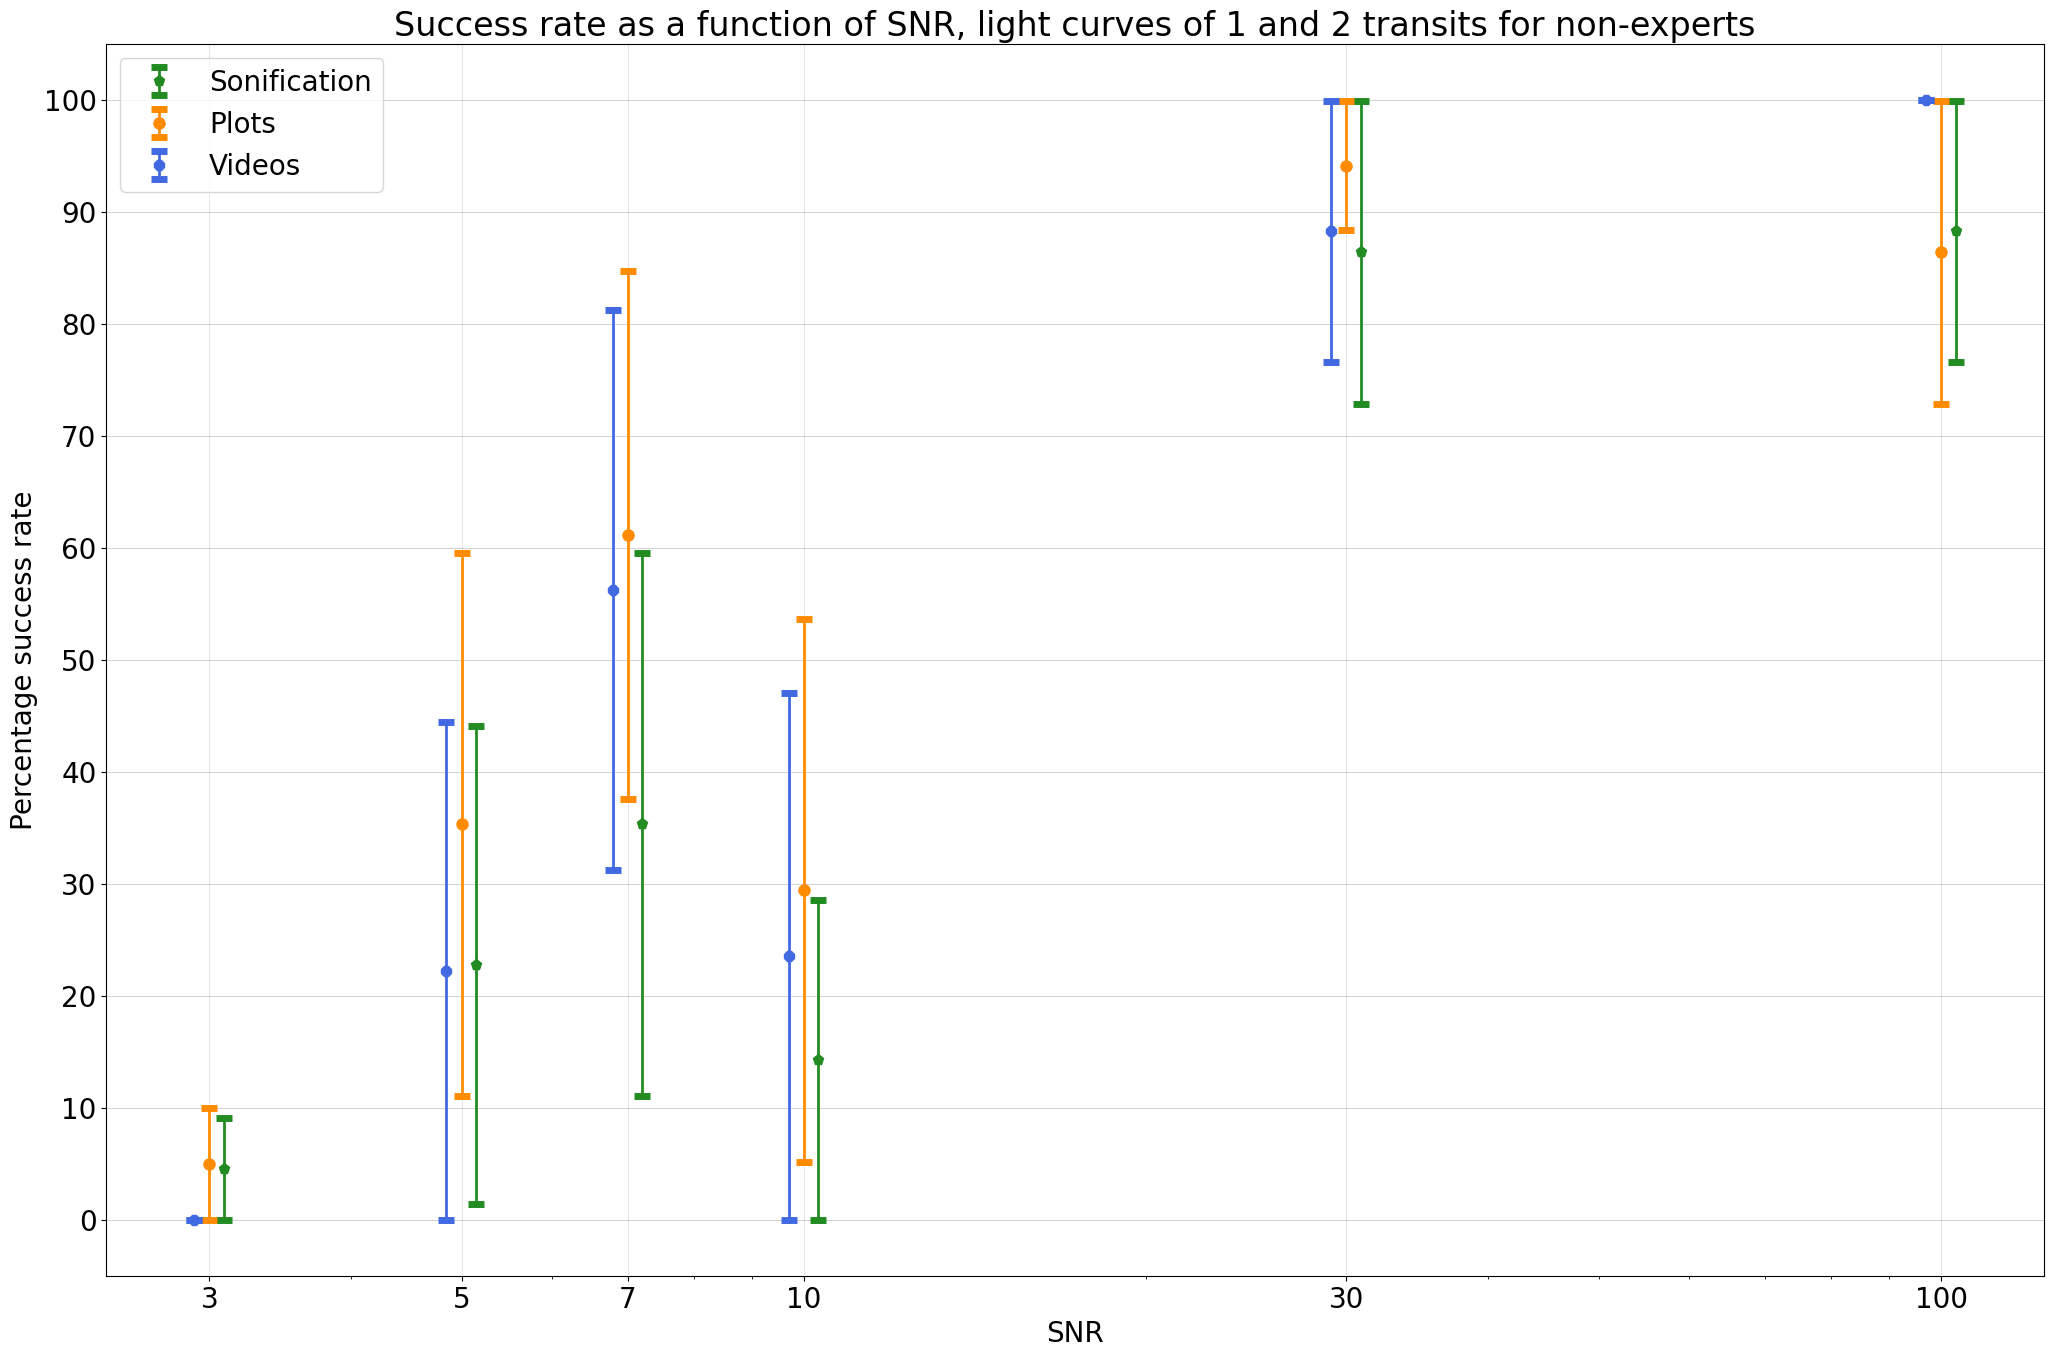

In [34]:
suc_nexpert12_sound = []
suc_nexpert12_sounderr = []

suc_nexpert12_visual = []
suc_nexpert12_visualerr = []

suc_nexpert12_video = []
suc_nexpert12_videoerr = []

snr = []

def sort(df):
    df.sort_values(by=['SNR'], ascending=True,inplace=True)

for i in sets_nexpert['Data']:
    
    j = i.iloc[6:18]

    sort(j)
    display(j)
    
    for k in range(0,len(j['Name']),2):
        
        if len(snr) < 6:  
            snr.append(int(j.iloc[k]['SNR']))
        
        if "sonification" in j.iloc[0]['Name']: 

            global suc_nexpert12_sound
            
            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            suc_nexpert12_sound.append(correct/tot*100.0)
            suc_nexpert12_sounderr.append(err*100.0)
            
            #print(suc_nexpert12_sound,suc_nexpert12_sounderr)
    
        elif "plot" in j.iloc[0]['Name']: 

            global suc_nexpert12_visual

            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            suc_nexpert12_visual.append(correct/tot*100.0)
            suc_nexpert12_visualerr.append(err*100.0)
            
        else:

            global suc_nexpert12_video

            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            suc_nexpert12_video.append(correct/tot*100.0)
            suc_nexpert12_videoerr.append(err*100.0)
            
f, ax = plt.subplots(figsize=(25, 16))

d = sort_errors(suc_nexpert12_sound,suc_nexpert12_sounderr)
e = sort_errors(suc_nexpert12_visual,suc_nexpert12_visualerr)
f = sort_errors(suc_nexpert12_video,suc_nexpert12_videoerr)


plt.errorbar([i + 0.03*i for i in snr], suc_nexpert12_sound, yerr=d, capthick=5, elinewidth=2,
             xerr=None,color = 'forestgreen', linestyle="None", 
             marker='p', markersize=8, capsize=5.5, label='Sonification')

plt.errorbar(snr, suc_nexpert12_visual, yerr=e, capthick=5, elinewidth=2,
             xerr=None, color='darkorange', linestyle="None", marker='o', 
             markersize=8, capsize=5.5, label='Plots')

plt.errorbar([i - 0.03*i for i in snr], suc_nexpert12_video,yerr=f, capthick=5, elinewidth=2,
             xerr=None,color='royalblue', linestyle="None", 
             marker='8', markersize=8, capsize=5.5, label='Videos')

#plt.hlines(guessperc, 1, 100, colors='k', linestyles='dashed', label='Estimated guess percentage',color='dimgray')
plt.xscale("log")
plt.legend(loc="best")#,fontsize='xx-large')
ax.set_xlabel("SNR")
ax.set_ylabel("Percentage success rate")
ax.set_title("Success rate as a function of SNR, light curves of 1 and 2 transits for non-experts")
x_formatter = ticker.FixedFormatter(["3","5","7","10","30","100"])
x_locator = ticker.FixedLocator([3,5,7,10,30,100])
y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_major_locator(y_locator)

plt.savefig("n = 1,2 transits, non-experts.jpg")

# Combining the sub-groups

## Comparing results for n = 0 on one figure.

<ipython-input-42-a4d47be8b49c>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_major_formatter(y_formatter)


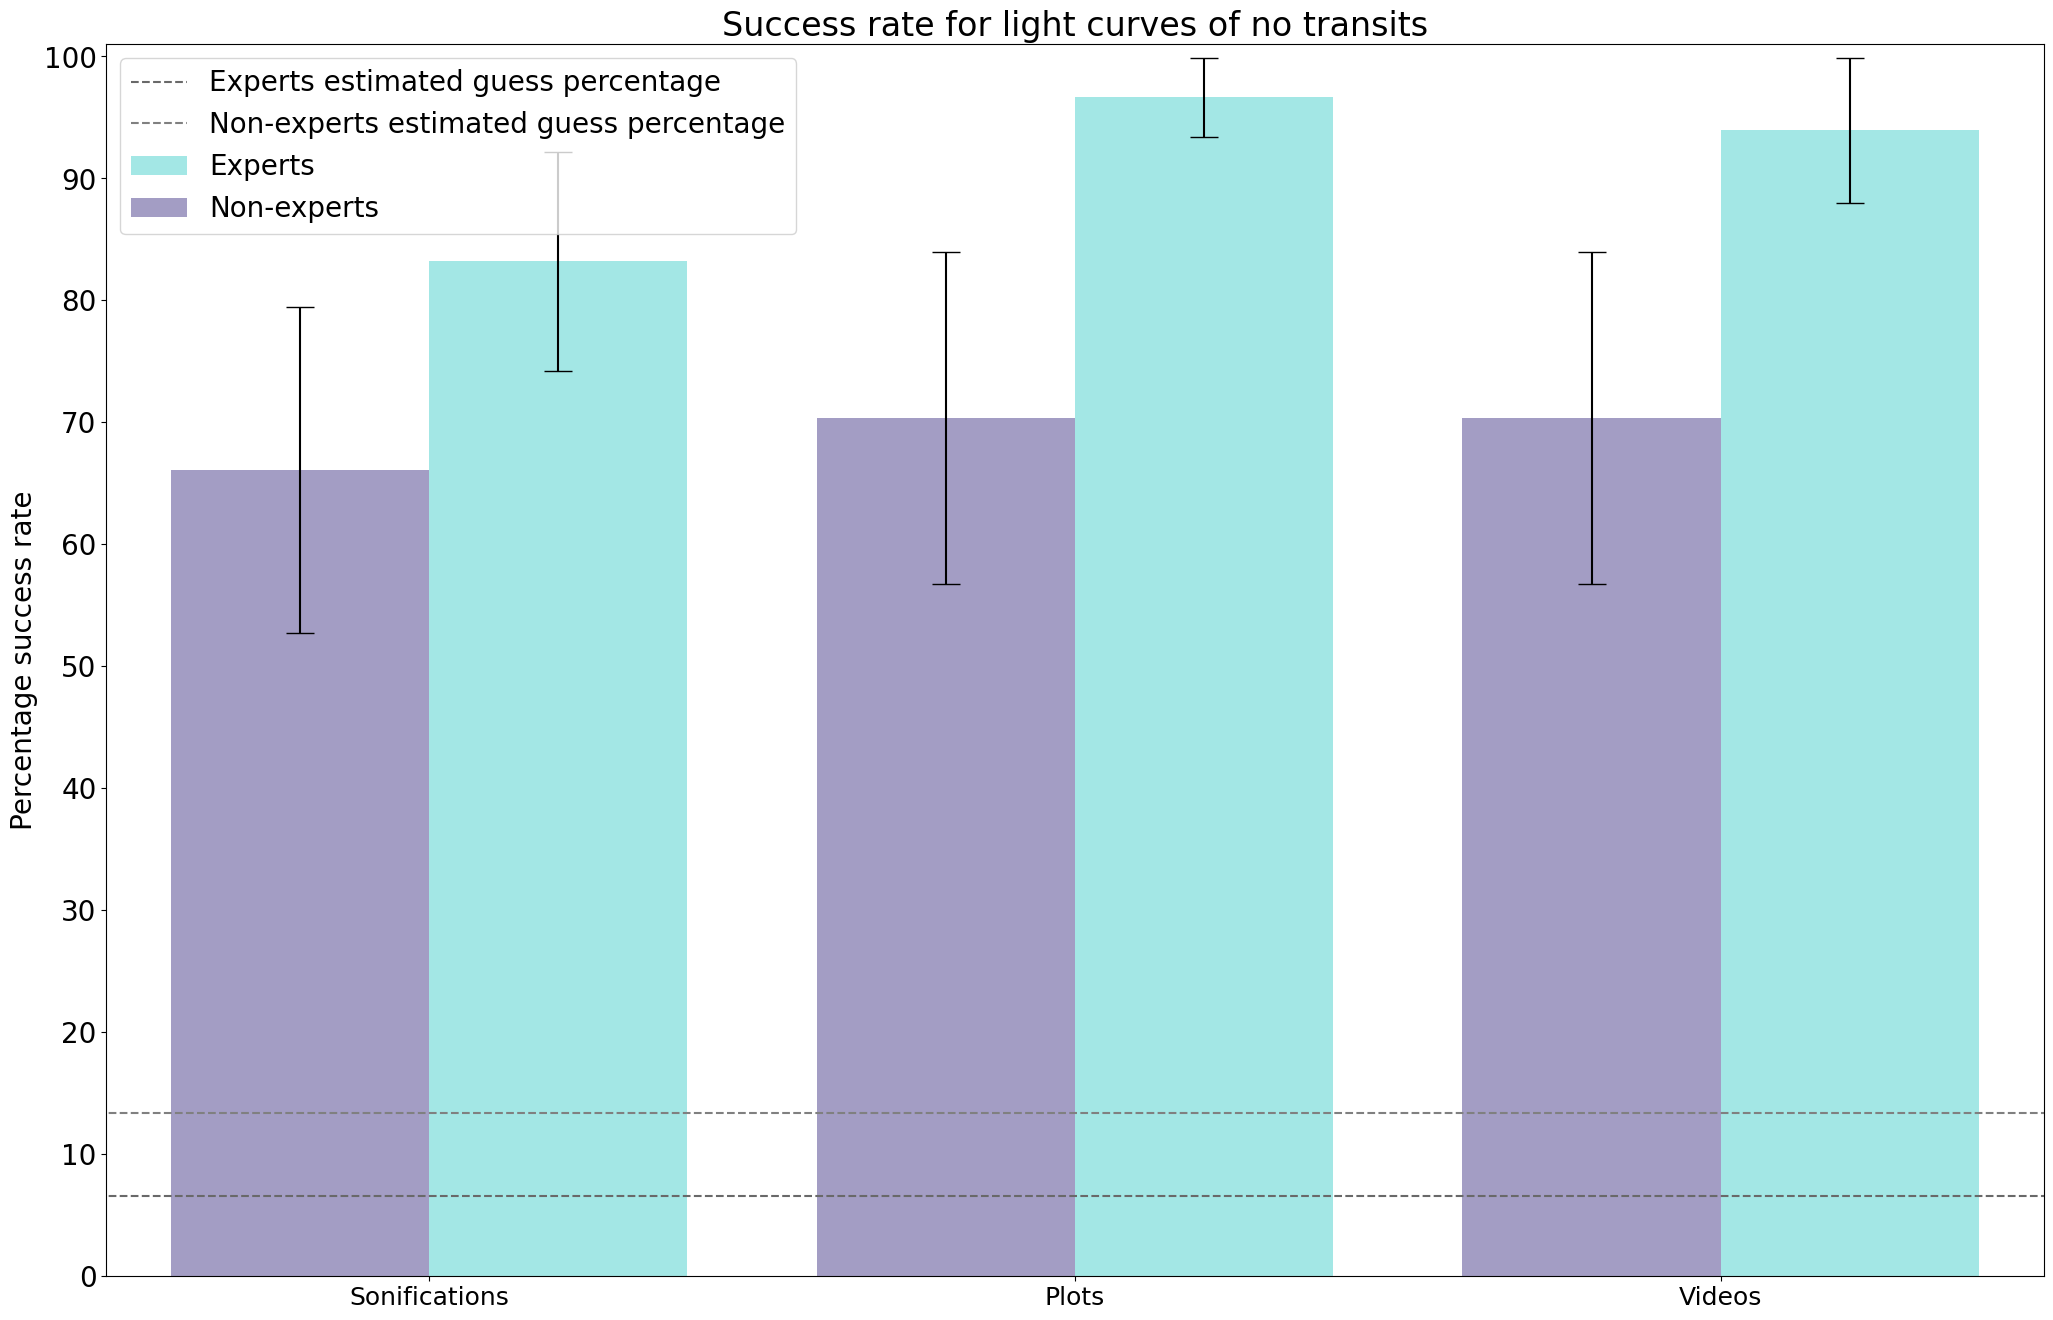

In [42]:
f, ax = plt.subplots(111,figsize=(25,16))
ax = plt.subplot(111)

ax.bar([x + 0.1 for x in [0,0.5,1]], suc_expert, 
       yerr = errsuc_expert_0, width=0.2, 
       color='mediumturquoise', align='center',alpha=0.5,capsize=10,label='Experts')
ax.bar([x - 0.1 for x in [0,0.5,1]], suc_nexpert, 
       yerr = errsuc_nexpert_0, width=0.2, 
       color='darkslateblue', align='center',alpha=0.5,capsize=10,label='Non-experts')

ax.set_xlabel("",fontsize=20)
ax.set_ylabel("Percentage of users",fontsize=20)
ax.set_xlim(-0.25,1.25)
ax.hlines(expert0guess, -1, 2, colors='k', linestyles='dashed', label='Experts estimated guess percentage',color='dimgray')
ax.hlines(nexpert0guess, -1, 2, colors='k', linestyles='dashed', label='Non-experts estimated guess percentage',color='gray')
ax.legend(loc='best')

plt.xticks([0,0.5,1],fontsize=18)

ax.set_ylabel("Percentage success rate")
ax.set_ylim(0,101)
ax.set_title("Success rate for light curves of no transits")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
x_locator = ticker.FixedLocator([0,0.5,1])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
y_formatter = ticker.FixedFormatter(["0","10","20","30","40","50","60","70","80","90","100"])
y_locator = ticker.FixedLocator([0,10,20,30,40,50,60,70,80,90,100])
ax.yaxis.set_major_formatter(y_formatter)
ax.yaxis.set_major_locator(y_locator)

#plt.savefig("n = 0 transits, bar.jpg")

# Still needs sorting

## combined n = 1,2, snr = 30 and 100 combined

<ipython-input-77-59ab11fcea60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
4,Here is the link to sonification 64: https://d...,1,9,23,1,9,12,1,0,0,0,4.795831523312719,10,1
11,Here is the link to sonification 94: https://d...,2,6,27,11,10,6,0,0,0,0,5.196152422706632,10,4
16,Here is the link to sonification 59: https://d...,1,17,17,0,17,0,0,0,0,0,4.123105625617661,100,6
9,Here is the link to sonification 71: https://d...,2,16,16,0,0,16,0,0,0,0,4.0,100,3
0,Here is the link to sonification 91: https://d...,1,1,23,20,1,1,0,1,0,0,4.795831523312719,3,1
15,Here is the link to sonification 18: https://d...,2,2,17,7,7,2,1,0,0,0,4.123105625617661,3,5
3,Here is the link to sonification 10: https://d...,1,21,23,1,21,1,0,0,0,0,4.795831523312719,30,1
6,Here is the link to sonification 36: https://d...,2,22,24,1,0,22,1,0,0,0,4.898979485566356,30,2
7,Here is the link to sonification 17: https://d...,1,2,24,21,2,0,1,0,0,0,4.898979485566356,5,2
2,Here is the link to sonification 49: https://d...,2,2,23,16,5,2,0,0,0,0,4.795831523312719,5,1


17 17
17.0 17.0
16 16
33.0 33.0
21 23
54.0 56.0
22 24
76.0 80.0


<ipython-input-77-59ab11fcea60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
8,Here is the link to plot 64: https://drive.goo...,1,12,16,1,12,3,0,0,0,0,4.0,10,3
17,Here is the link to plot 94: https://drive.goo...,2,11,17,1,5,11,0,0,0,0,4.123105625617661,10,6
12,Here is the link to plot 59: https://drive.goo...,1,16,17,1,16,0,0,0,0,0,4.123105625617661,100,5
1,Here is the link to plot 71: https://drive.goo...,2,22,23,1,0,22,0,0,0,0,4.795831523312719,100,1
2,Here is the link to plot 91: https://drive.goo...,1,0,21,21,0,0,0,0,0,0,4.795831523312719,3,1
11,Here is the link to plot 18: https://drive.goo...,2,1,16,12,2,1,0,1,0,0,4.123105625617661,3,5
10,Here is the link to plot 10: https://drive.goo...,1,27,27,0,27,0,0,0,0,0,5.196152422706632,30,4
15,Here is the link to plot 36: https://drive.goo...,2,17,17,0,0,17,0,0,0,0,4.123105625617661,30,5
9,Here is the link to plot 17: https://drive.goo...,1,1,15,14,1,0,0,0,0,0,4.0,5,3
5,Here is the link to plot 49: https://drive.goo...,2,10,24,9,5,10,0,0,0,0,4.898979485566356,5,2


16 17
16.0 17.0
22 23
38.0 40.0
27 27
65.0 67.0
17 17
82.0 84.0


<ipython-input-77-59ab11fcea60>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
3,Here is the link to video 64: https://drive.go...,1,14,16,0,14,2,0,0,0,0,4.0,10,3
17,Here is the link to video 94: https://drive.go...,2,5,17,3,9,5,0,0,0,0,4.123105625617661,10,6
8,Here is the link to video 59: https://drive.go...,1,27,27,0,27,0,0,0,0,0,5.196152422706632,100,4
16,Here is the link to video 71: https://drive.go...,2,17,17,0,0,17,0,0,0,0,4.123105625617661,100,6
2,Here is the link to video 91: https://drive.go...,1,0,16,16,0,0,0,0,0,0,4.0,3,3
6,Here is the link to video 18: https://drive.go...,2,0,27,21,5,0,1,0,0,0,5.196152422706632,3,4
14,Here is the link to video 10: https://drive.go...,1,16,16,0,16,0,0,0,0,0,4.123105625617661,30,6
7,Here is the link to video 36: https://drive.go...,2,27,27,0,0,27,0,0,0,0,5.196152422706632,30,4
13,Here is the link to video 17: https://drive.go...,1,0,17,17,0,0,0,0,0,0,4.123105625617661,5,6
1,Here is the link to video 49: https://drive.go...,2,9,24,12,2,9,1,0,0,0,4.898979485566356,5,2


<ipython-input-77-59ab11fcea60>:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


27 27
27.0 27.0
17 17
44.0 44.0
16 16
60.0 60.0
27 27
87.0 87.0
[0.95, 0.9761904761904762, 1.0] [0.1118033988749895, 0.10910894511799618, 0.1072112534837795]


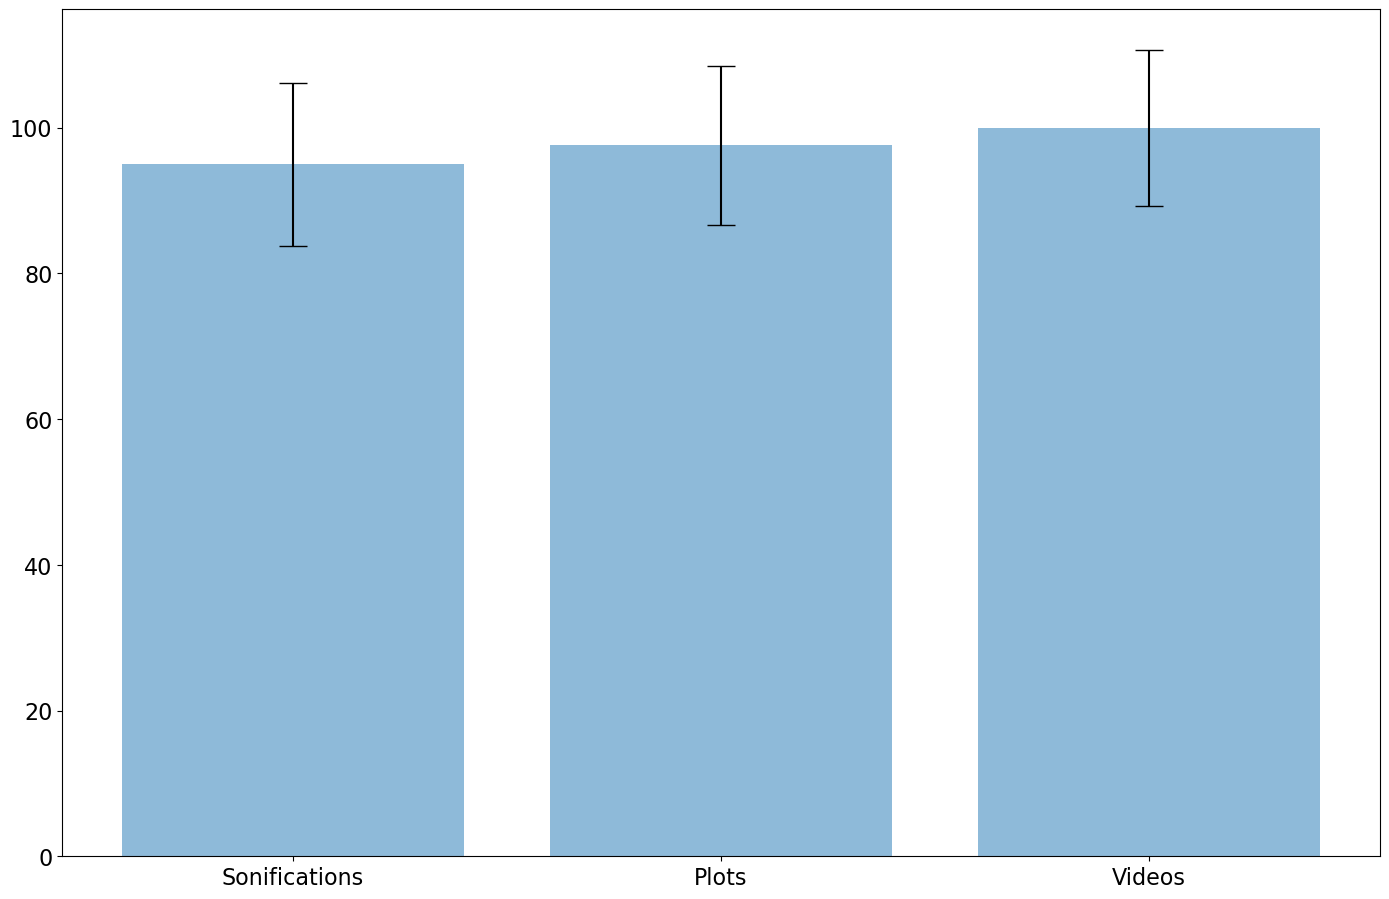

In [77]:
suc_expert = []
errsuc_expert = []

def sort(df):
    df.sort_values(by=['SNR'], inplace=True)

for i in sets['Data']:
    
    j = i.iloc[6:18]
    sort(j)
    display(j)
    
    
    tot_n = 0
    tot_resp = 0
    
    global suc_expert
    global errsuc_expert
    
    for k in range(0,len(j['Name'])):
        n = j.iloc[k]['Number of correct answers']
        resp = j.iloc[k]['Total responses']
        
        if k == 2:
            print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)
        
        elif k == 3:
            print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)
            
        elif k == 6:
            print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)
            
        elif k == 7:
            print(n,resp)
            tot_n = tot_n + float(n)
            tot_resp = tot_resp + float(resp)
            
        else:
            continue
        
        print(tot_n,tot_resp)
    suc_expert.append(tot_n/tot_resp)
    errsuc_expert.append(np.sqrt(tot_resp)/tot_resp)
        
print(suc_expert,errsuc_expert)

f, ax = plt.subplots(figsize=(17,11))
ax.bar([1,2,3], [x*100 for x in suc_expert], yerr=[x*100 for x in errsuc_expert], alpha=0.5,align='center', ecolor='black', capsize=10)
ax.hlines()
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
x_locator = ticker.FixedLocator([1,2,3])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)

tabulating

In [1]:
suc_expert = [0.8365384615384616, 0.970873786407767, 0.9461538461538461]
errsuc_expert = [0.09805806756909201, 0.0985329278164293, 0.08770580193070292]

suc_expert71012 = [0.26881720430107525, 0.7375, 0.6461538461538462]
errsuc_expert71012 = [0.10369516947304253, 0.1118033988749895, 0.12403473458920845]

suc_expert3010012 = [0.95, 0.9761904761904762, 1.0]
errsuc_expert3010012 = [0.1118033988749895, 0.10910894511799618, 0.1072112534837795]

suc_nexpert = [0.5757575757575758, 0.5555555555555556, 0.5555555555555556]
err_suc_nexpert = [0.17407765595569782, 0.19245008972987526, 0.19245008972987526]

suc_nexpert71012 = [0.25, 0.47058823529411764, 0.45]
err_suc_nexpert71012 = [0.223606797749979, 0.24253562503633297, 0.223606797749979]

suc_nexpert3010012 = [0.8695652173913043, 0.8181818181818182, 1.0]
err_suc_nexpert3010012 = [0.20851441405707474, 0.21320071635561044, 0.25]

snr = 7, 10

In [2]:
matplotlib.rcParams.update({'font.size': 16})
f, ax = plt.subplots(111,figsize=(14,8))
ax = plt.subplot(111)
ax.bar([x + 0.1 for x in [0,0.5,1]], [x*100 for x in suc_expert71012], 
       yerr = [x*100 for x in errsuc_expert71012], width=0.2, 
       color='mediumturquoise', align='center',alpha=0.5,capsize=10,label='Astronomers')
ax.bar([x - 0.1 for x in [0,0.5,1]], [x*100 for x in suc_expert71012], 
       yerr = [x*100 for x in err_suc_expert71012],width=0.2, 
       color='darkslateblue', align='center',alpha=0.5,capsize=10,label='Non-astronomers')
ax.set_xlabel("",fontsize=20)
ax.set_ylabel("Percentage of users",fontsize=20)
ax.legend(loc='best')

plt.xticks([0,0.5,1],fontsize=18)
ax.set_ylabel("Percentage success rate")
ax.set_title("Success rate for light curves of 1,2 transits at SNR = 7,10")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
x_locator = ticker.FixedLocator([0,0.5,1])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
plt.gcf()
#plt.savefig("bar of n = 1,2 transits, SNR = 7, 10.jpg")

NameError: name 'matplotlib' is not defined

snr = 30, 100

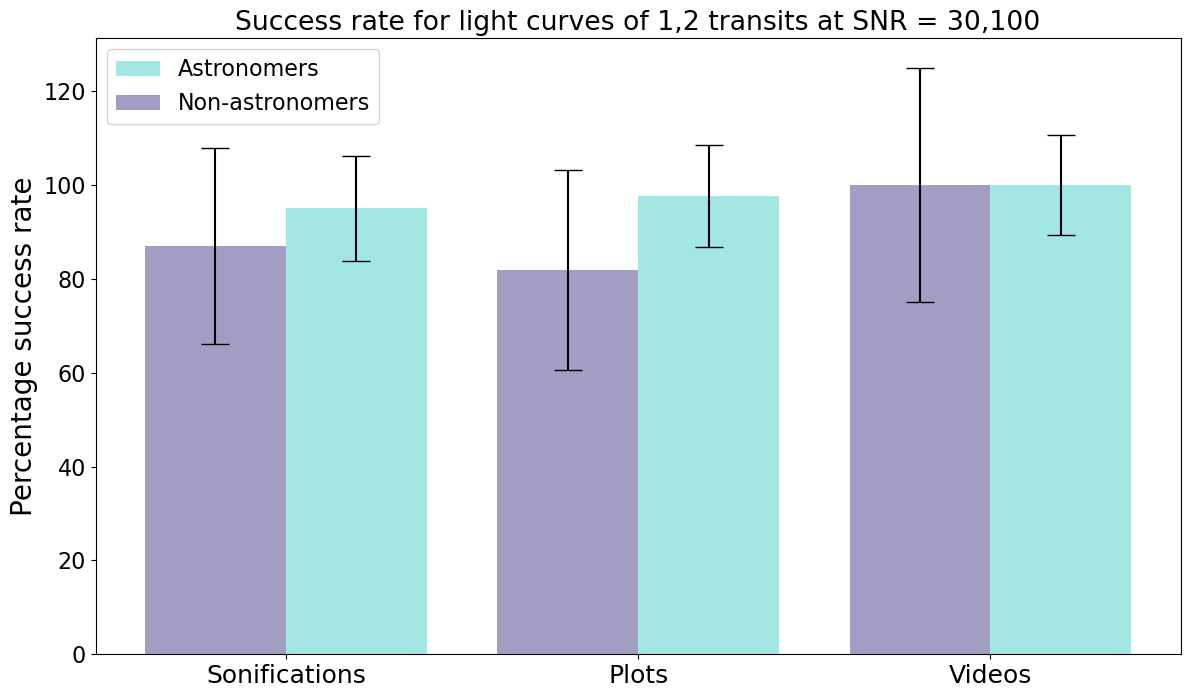

In [79]:
matplotlib.rcParams.update({'font.size': 16})
f, ax = plt.subplots(111,figsize=(14,8))
ax = plt.subplot(111)
ax.bar([x + 0.1 for x in [0,0.5,1]], [x*100 for x in suc_expert3010012], 
       yerr = [x*100 for x in errsuc_expert3010012], width=0.2, 
       color='mediumturquoise', align='center',alpha=0.5,capsize=10,label='Astronomers')
ax.bar([x - 0.1 for x in [0,0.5,1]], [x*100 for x in suc_expert3010012], 
       yerr = [x*100 for x in err_suc_expert3010012],width=0.2, 
       color='darkslateblue', align='center',alpha=0.5,capsize=10,label='Non-astronomers')
ax.set_xlabel("",fontsize=20)
ax.set_ylabel("Percentage of users",fontsize=20)
ax.legend(loc='best')

plt.xticks([0,0.5,1],fontsize=18)
ax.set_ylabel("Percentage success rate")
ax.set_title("Success rate for light curves of 1,2 transits at SNR = 30,100")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
x_locator = ticker.FixedLocator([0,0.5,1])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
plt.gcf()
plt.savefig("bar of n = 1,2 transits, SNR = 30, 100.jpg")

Normal

In [144]:
print(zeroguessperc)

0.36372206999999995


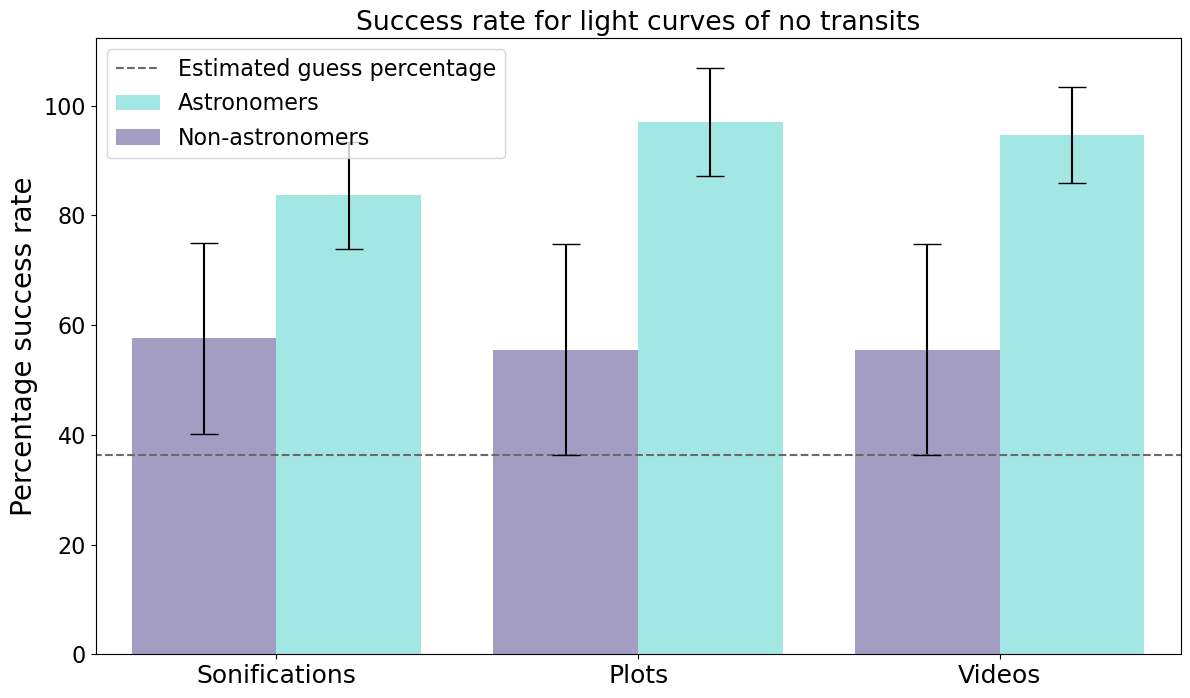

In [146]:
matplotlib.rcParams.update({'font.size': 16})
f, ax = plt.subplots(111,figsize=(14,8))
ax = plt.subplot(111)
ax.bar([x + 0.1 for x in [0,0.5,1]], [x*100 for x in suc_expert], 
       yerr = [x*100 for x in errsuc_expert], width=0.2, 
       color='mediumturquoise', align='center',alpha=0.5,capsize=10,label='Astronomers')
ax.bar([x - 0.1 for x in [0,0.5,1]], [x*100 for x in suc_expert], 
       yerr = [x*100 for x in err_suc_expert],width=0.2, 
       color='darkslateblue', align='center',alpha=0.5,capsize=10,label='Non-astronomers')
ax.set_xlabel("",fontsize=20)
ax.set_ylabel("Percentage of users",fontsize=20)
ax.set_xlim(-0.25,1.25)
ax.hlines(0.36372206999999995*100, -1, 2, colors='k', linestyles='dashed', label='Estimated guess percentage',color='dimgray')
ax.legend(loc='best')

plt.xticks([0,0.5,1],fontsize=18)

ax.set_ylabel("Percentage success rate")
ax.set_title("Success rate for light curves of no transits")
x_formatter = ticker.FixedFormatter(["Sonifications","Plots","Videos"])
x_locator = ticker.FixedLocator([0,0.5,1])
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)
plt.gcf()
plt.savefig("n = 0 transits, non-astronomers, bar.jpg")

<ipython-input-117-1d3aab138072>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
4,Here is the link to sonification 64: https://d...,1,1,9,0,1,5,3,0,0,0,3.0,10,1
11,Here is the link to sonification 94: https://d...,2,1,3,0,2,1,0,0,0,0,1.7320508075688772,10,4
16,Here is the link to sonification 59: https://d...,1,4,4,0,4,0,0,0,0,0,2.0,100,6
9,Here is the link to sonification 71: https://d...,2,4,5,0,0,4,0,1,0,0,2.23606797749979,100,3
0,Here is the link to sonification 91: https://d...,1,0,9,5,0,0,4,0,0,0,3.0,3,1
15,Here is the link to sonification 18: https://d...,2,1,5,2,2,1,0,0,0,0,2.23606797749979,3,5
3,Here is the link to sonification 10: https://d...,1,7,9,0,7,1,1,0,0,0,3.0,30,1
6,Here is the link to sonification 36: https://d...,2,4,4,0,0,4,0,0,0,0,2.0,30,2
7,Here is the link to sonification 17: https://d...,1,1,4,2,1,1,0,0,0,0,2.0,5,2
2,Here is the link to sonification 49: https://d...,2,1,9,4,0,1,0,4,0,0,3.0,5,1


[16.666666666666664] [28.867513459481287]
[16.666666666666664, 88.88888888888889] [28.867513459481287, 33.33333333333333]
[16.666666666666664, 88.88888888888889, 7.142857142857142] [28.867513459481287, 33.33333333333333, 26.72612419124244]
[16.666666666666664, 88.88888888888889, 7.142857142857142, 84.61538461538461] [28.867513459481287, 33.33333333333333, 26.72612419124244, 27.735009811261456]
[16.666666666666664, 88.88888888888889, 7.142857142857142, 84.61538461538461, 15.384615384615385] [28.867513459481287, 33.33333333333333, 26.72612419124244, 27.735009811261456, 27.735009811261456]
[16.666666666666664, 88.88888888888889, 7.142857142857142, 84.61538461538461, 15.384615384615385, 37.5] [28.867513459481287, 33.33333333333333, 26.72612419124244, 27.735009811261456, 27.735009811261456, 35.35533905932738]


<ipython-input-117-1d3aab138072>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
8,Here is the link to plot 64: https://drive.goo...,1,1,5,1,1,2,1,0,0,0,2.23606797749979,10,3
17,Here is the link to plot 94: https://drive.goo...,2,1,4,1,1,1,1,0,0,0,2.0,10,6
12,Here is the link to plot 59: https://drive.goo...,1,4,5,0,4,1,0,0,0,0,2.23606797749979,100,5
1,Here is the link to plot 71: https://drive.goo...,2,7,9,0,0,7,1,1,0,0,3.0,100,1
2,Here is the link to plot 91: https://drive.goo...,1,0,8,4,0,0,1,3,0,0,3.0,3,1
11,Here is the link to plot 18: https://drive.goo...,2,1,4,2,0,1,1,0,0,0,2.23606797749979,3,5
10,Here is the link to plot 10: https://drive.goo...,1,3,3,0,3,0,0,0,0,0,1.7320508075688772,30,4
15,Here is the link to plot 36: https://drive.goo...,2,4,5,0,0,4,0,1,0,0,2.23606797749979,30,5
9,Here is the link to plot 17: https://drive.goo...,1,1,5,4,1,0,0,0,0,0,2.23606797749979,5,3
5,Here is the link to plot 49: https://drive.goo...,2,2,4,1,1,2,0,0,0,0,2.0,5,2


<ipython-input-117-1d3aab138072>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['SNR'], ascending=True,inplace=True)


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
3,Here is the link to video 64: https://drive.go...,1,1,5,1,1,3,0,0,0,0,2.23606797749979,10,3
17,Here is the link to video 94: https://drive.go...,2,1,4,0,2,1,1,0,0,0,2.0,10,6
8,Here is the link to video 59: https://drive.go...,1,3,3,0,3,0,0,0,0,0,1.7320508075688772,100,4
16,Here is the link to video 71: https://drive.go...,2,4,4,0,0,4,0,0,0,0,2.0,100,6
2,Here is the link to video 91: https://drive.go...,1,0,5,3,0,0,1,1,0,0,2.23606797749979,3,3
6,Here is the link to video 18: https://drive.go...,2,0,3,2,0,0,0,1,0,0,1.7320508075688772,3,4
14,Here is the link to video 10: https://drive.go...,1,4,4,0,4,0,0,0,0,0,2.0,30,6
7,Here is the link to video 36: https://drive.go...,2,3,3,0,0,3,0,0,0,0,1.7320508075688772,30,4
13,Here is the link to video 17: https://drive.go...,1,1,4,2,1,0,0,1,0,0,2.0,5,6
1,Here is the link to video 49: https://drive.go...,2,2,4,1,0,2,1,0,0,0,2.0,5,2


<ipython-input-117-1d3aab138072>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(x_formatter)


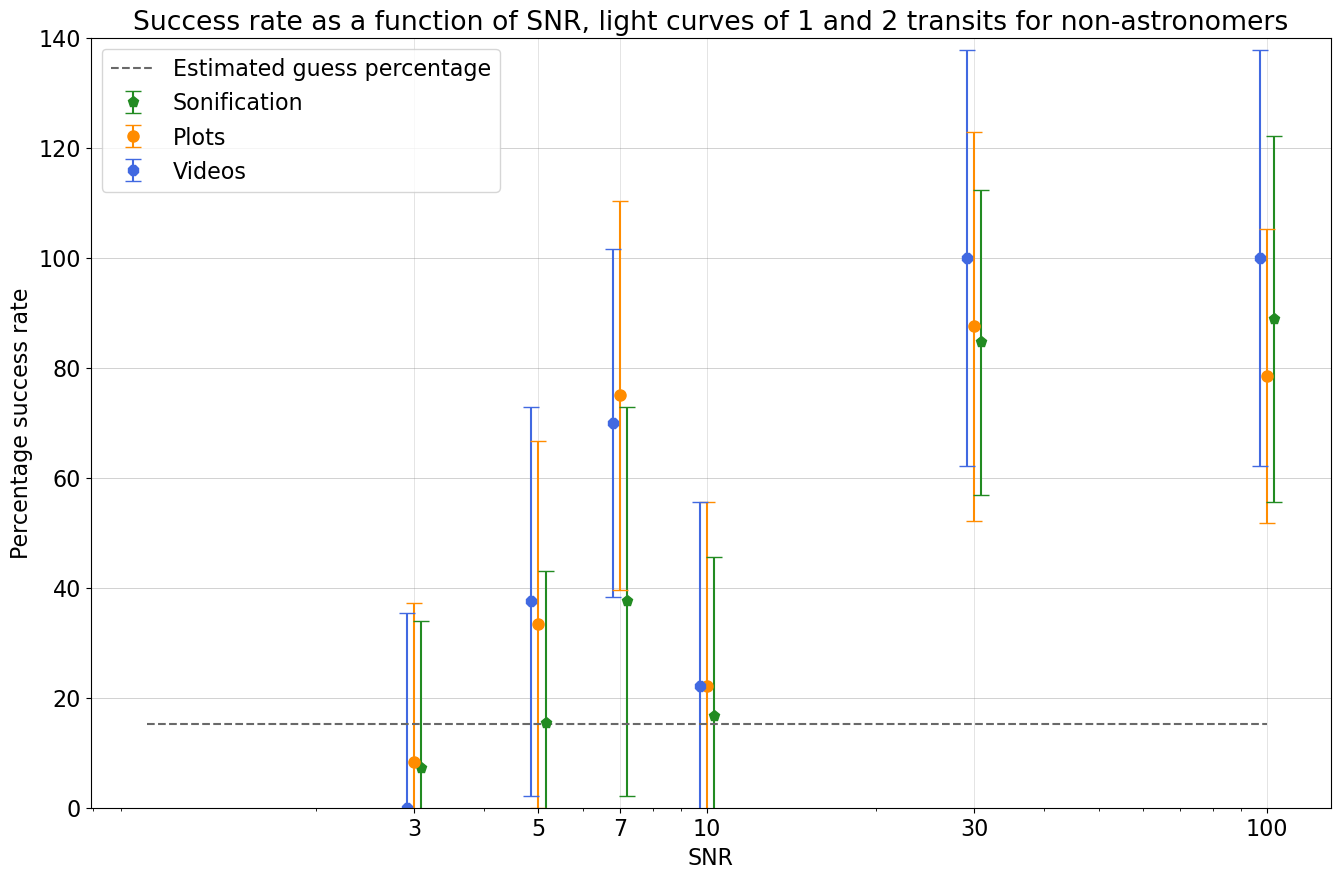

In [117]:
snr = [10,100,3,30,5,7]

n12_success_sound = []
n12_success_sound_err = []

n12_success_visual = []
n12_success_visual_err = []

n12_success_video = []
n12_success_video_err = []

def sort(df):
    df.sort_values(by=['SNR'], ascending=True,inplace=True)

for i in sets['Data']:
    
    j = i.iloc[6:18]

    sort(j)
    display(j)
    
    for k in range(0,len(j['Name']),2):
        #print(j.iloc[k]['Correct n'])
        
        if "sonification" in j.iloc[0]['Name']: 

            global n12_success_sound
            
            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            n12_success_sound.append(correct/tot*100.0)
            n12_success_sound_err.append(err*100.0)
            
            print(n12_success_sound,n12_success_sound_err)
    
        elif "plot" in j.iloc[0]['Name']: 

            global n12_success_visual

            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            n12_success_visual.append(correct/tot*100.0)
            n12_success_visual_err.append(err*100.0)
            
        else:

            global n12_success_video

            tot = float(j.iloc[k]['Total responses']) + float(j.iloc[k+1]['Total responses'])
            correct = float(j.iloc[k]['Number of correct answers']) + float(j.iloc[k+1]['Number of correct answers'])
            
            err = np.sqrt(tot)/tot
            n12_success_video.append(correct/tot*100.0)
            n12_success_video_err.append(err*100.0)
            
f, ax = plt.subplots(figsize=(16, 10))

plt.errorbar([i + 0.03*i for i in snr],n12_success_sound,yerr=n12_success_sound_err,
             xerr=None,color = 'forestgreen', linestyle="None", marker='p', markersize=8, capsize=5.5, label='Sonification')
plt.errorbar(snr,n12_success_visual,yerr=n12_success_visual_err,
             xerr=None, color='darkorange', linestyle="None", marker='o', markersize=8, capsize=5.5, label='Plots')
plt.errorbar([i - 0.03*i for i in snr],n12_success_video,yerr=n12_success_video_err,
             xerr=None,color='royalblue', linestyle="None", marker='8', markersize=8, capsize=5.5, label='Videos')
plt.hlines(guessperc, 1, 100, colors='k', linestyles='dashed', label='Estimated guess percentage',color='dimgray')
#plt.xticks([3,5,7,10,30,100])
plt.xscale("log")
plt.legend(loc="best")#,fontsize='xx-large')
ax.set_ylim(0,140.0)
ax.set_xlabel("SNR")
ax.set_ylabel("Percentage success rate")
ax.set_title("Success rate as a function of SNR, light curves of 1 and 2 transits for non-astronomers")
x_formatter = ticker.FixedFormatter(["3","5","7","10","30","100"])
x_locator = ticker.FixedLocator([3,5,7,10,30,100])
ax.grid(axis="x", color="grey", alpha=.3, linewidth=.5)
ax.grid(axis="y", color="grey", alpha=.5, linewidth=.5)
ax.xaxis.set_major_formatter(x_formatter)
ax.xaxis.set_major_locator(x_locator)

plt.savefig("n = 1,2 transits, non-astronomers.jpg")

## Histogram for SNR = 3,5,7 for sonification questions

In [134]:
zeroguessperc = (0.32894737+0.41975309+0.34246575)/3
print(zeroguessperc)

0.36372206999999995


Histogram for SNR = 3

<ipython-input-126-f0fca4dc2157>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_3 = df_sound_3[df_sound.SNR != '30']
<ipython-input-126-f0fca4dc2157>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_3 = df_sound_3[df_sound.SNR != '10']
<ipython-input-126-f0fca4dc2157>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_3 = df_sound_3[df_sound.SNR != '7']
<ipython-input-126-f0fca4dc2157>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_3 = df_sound_3[df_sound.SNR != '5']


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
17,Here is the link to sonification 110: https://...,0,14,16,14,2,0,0,0,0,0,4.0,3,6
0,Here is the link to sonification 91: https://d...,1,1,22,19,1,1,0,1,0,0,4.69041575982343,3,1
15,Here is the link to sonification 18: https://d...,2,2,15,6,6,2,1,0,0,0,3.872983346207417,3,5


No handles with labels found to put in legend.
No handles with labels found to put in legend.


totals =  [0.         0.02631579 0.         0.         0.        ]
totals =  [0.25       0.02631579 0.01315789 0.         0.01315789]
totals =  [0.32894737 0.10526316 0.01315789 0.01315789 0.01315789]


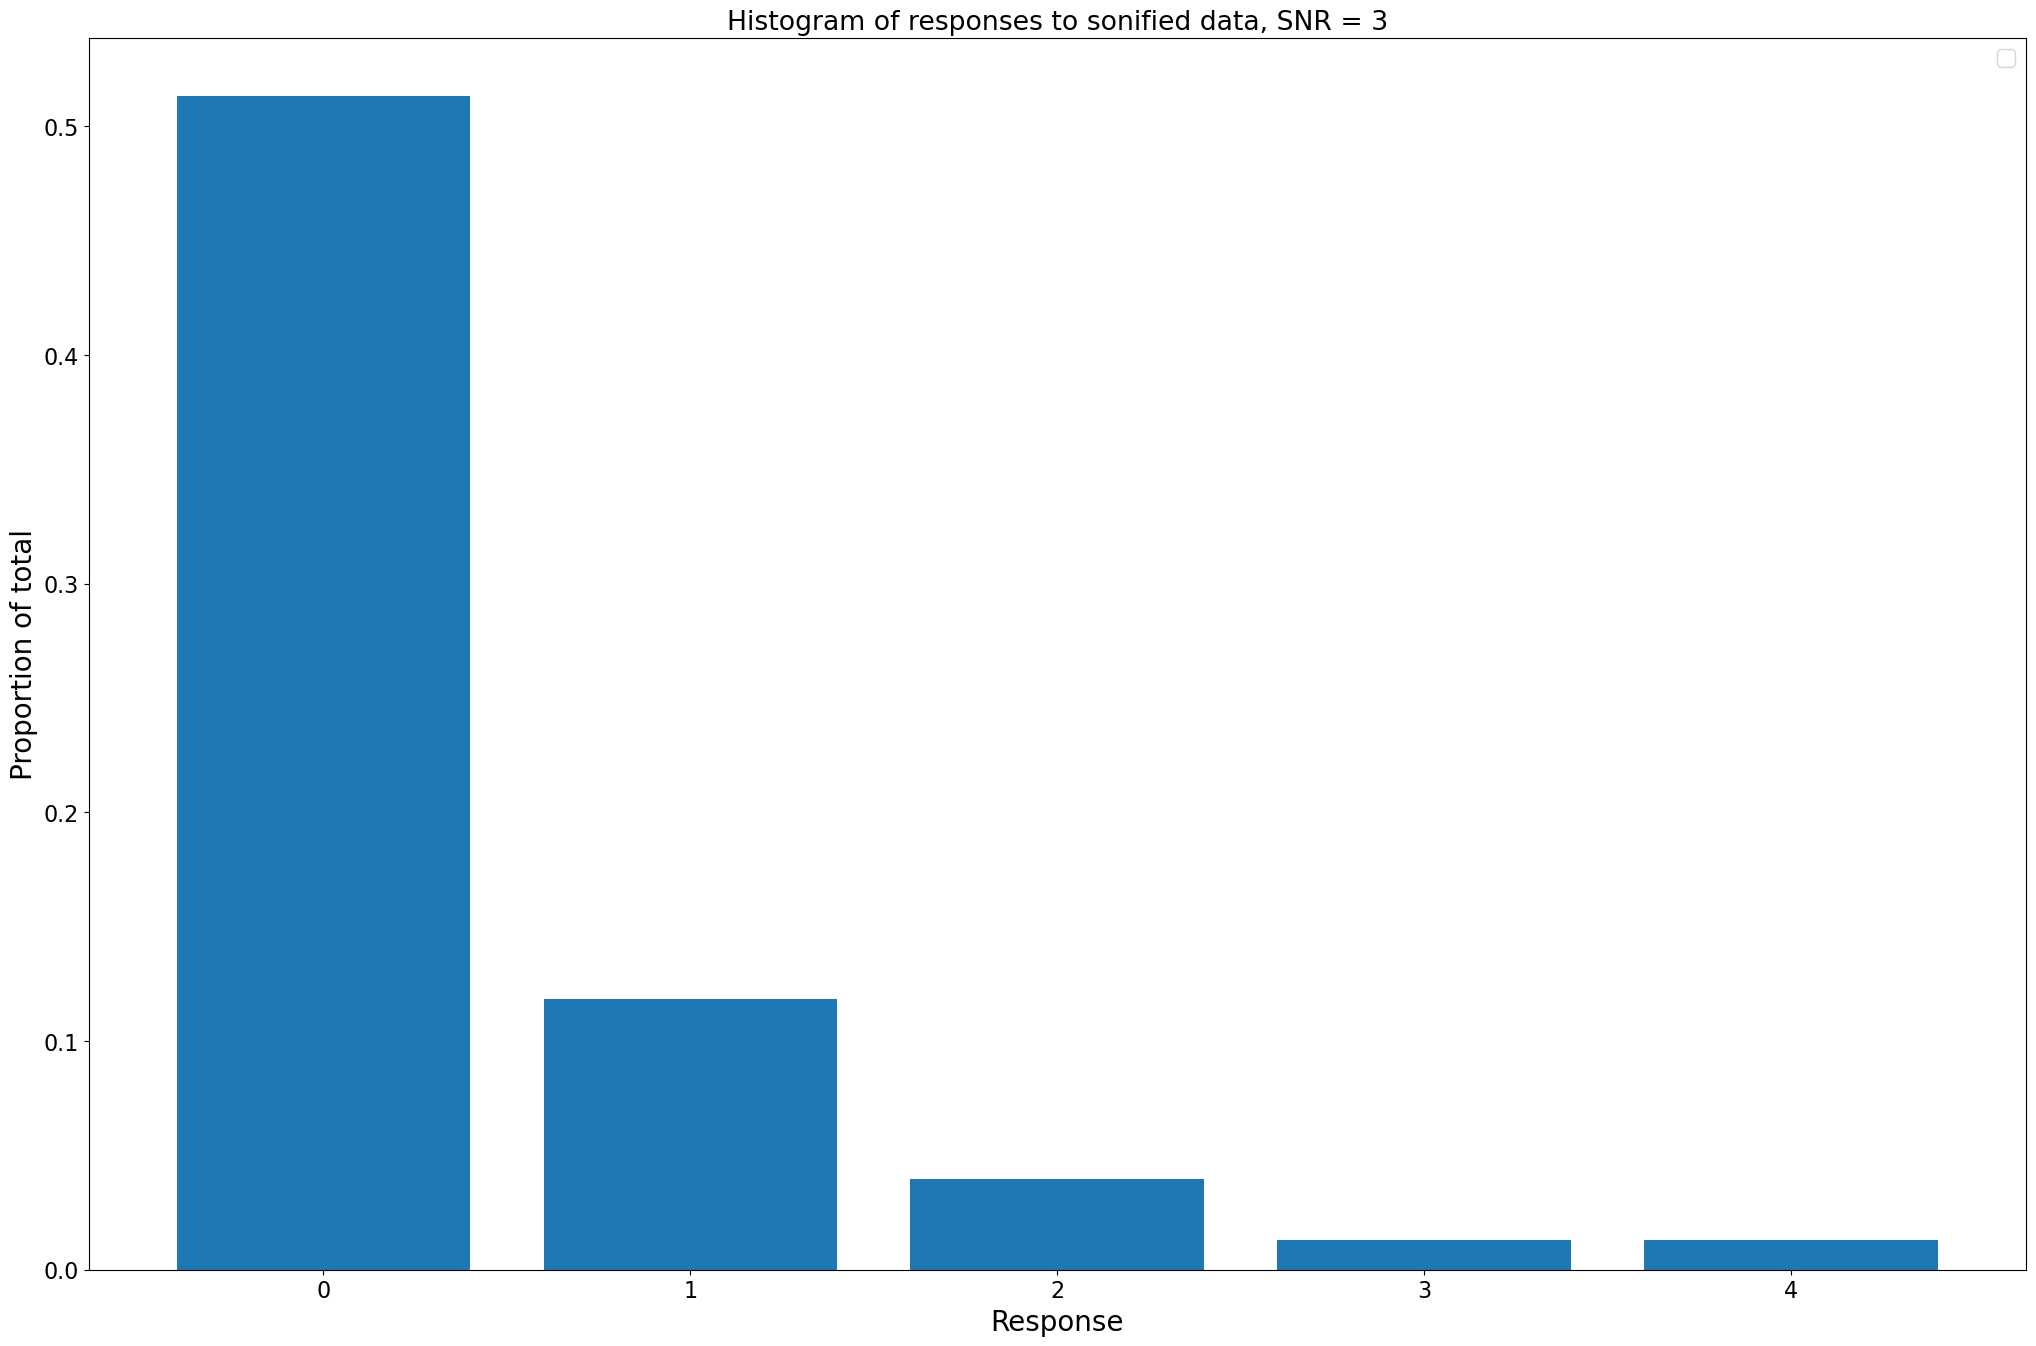

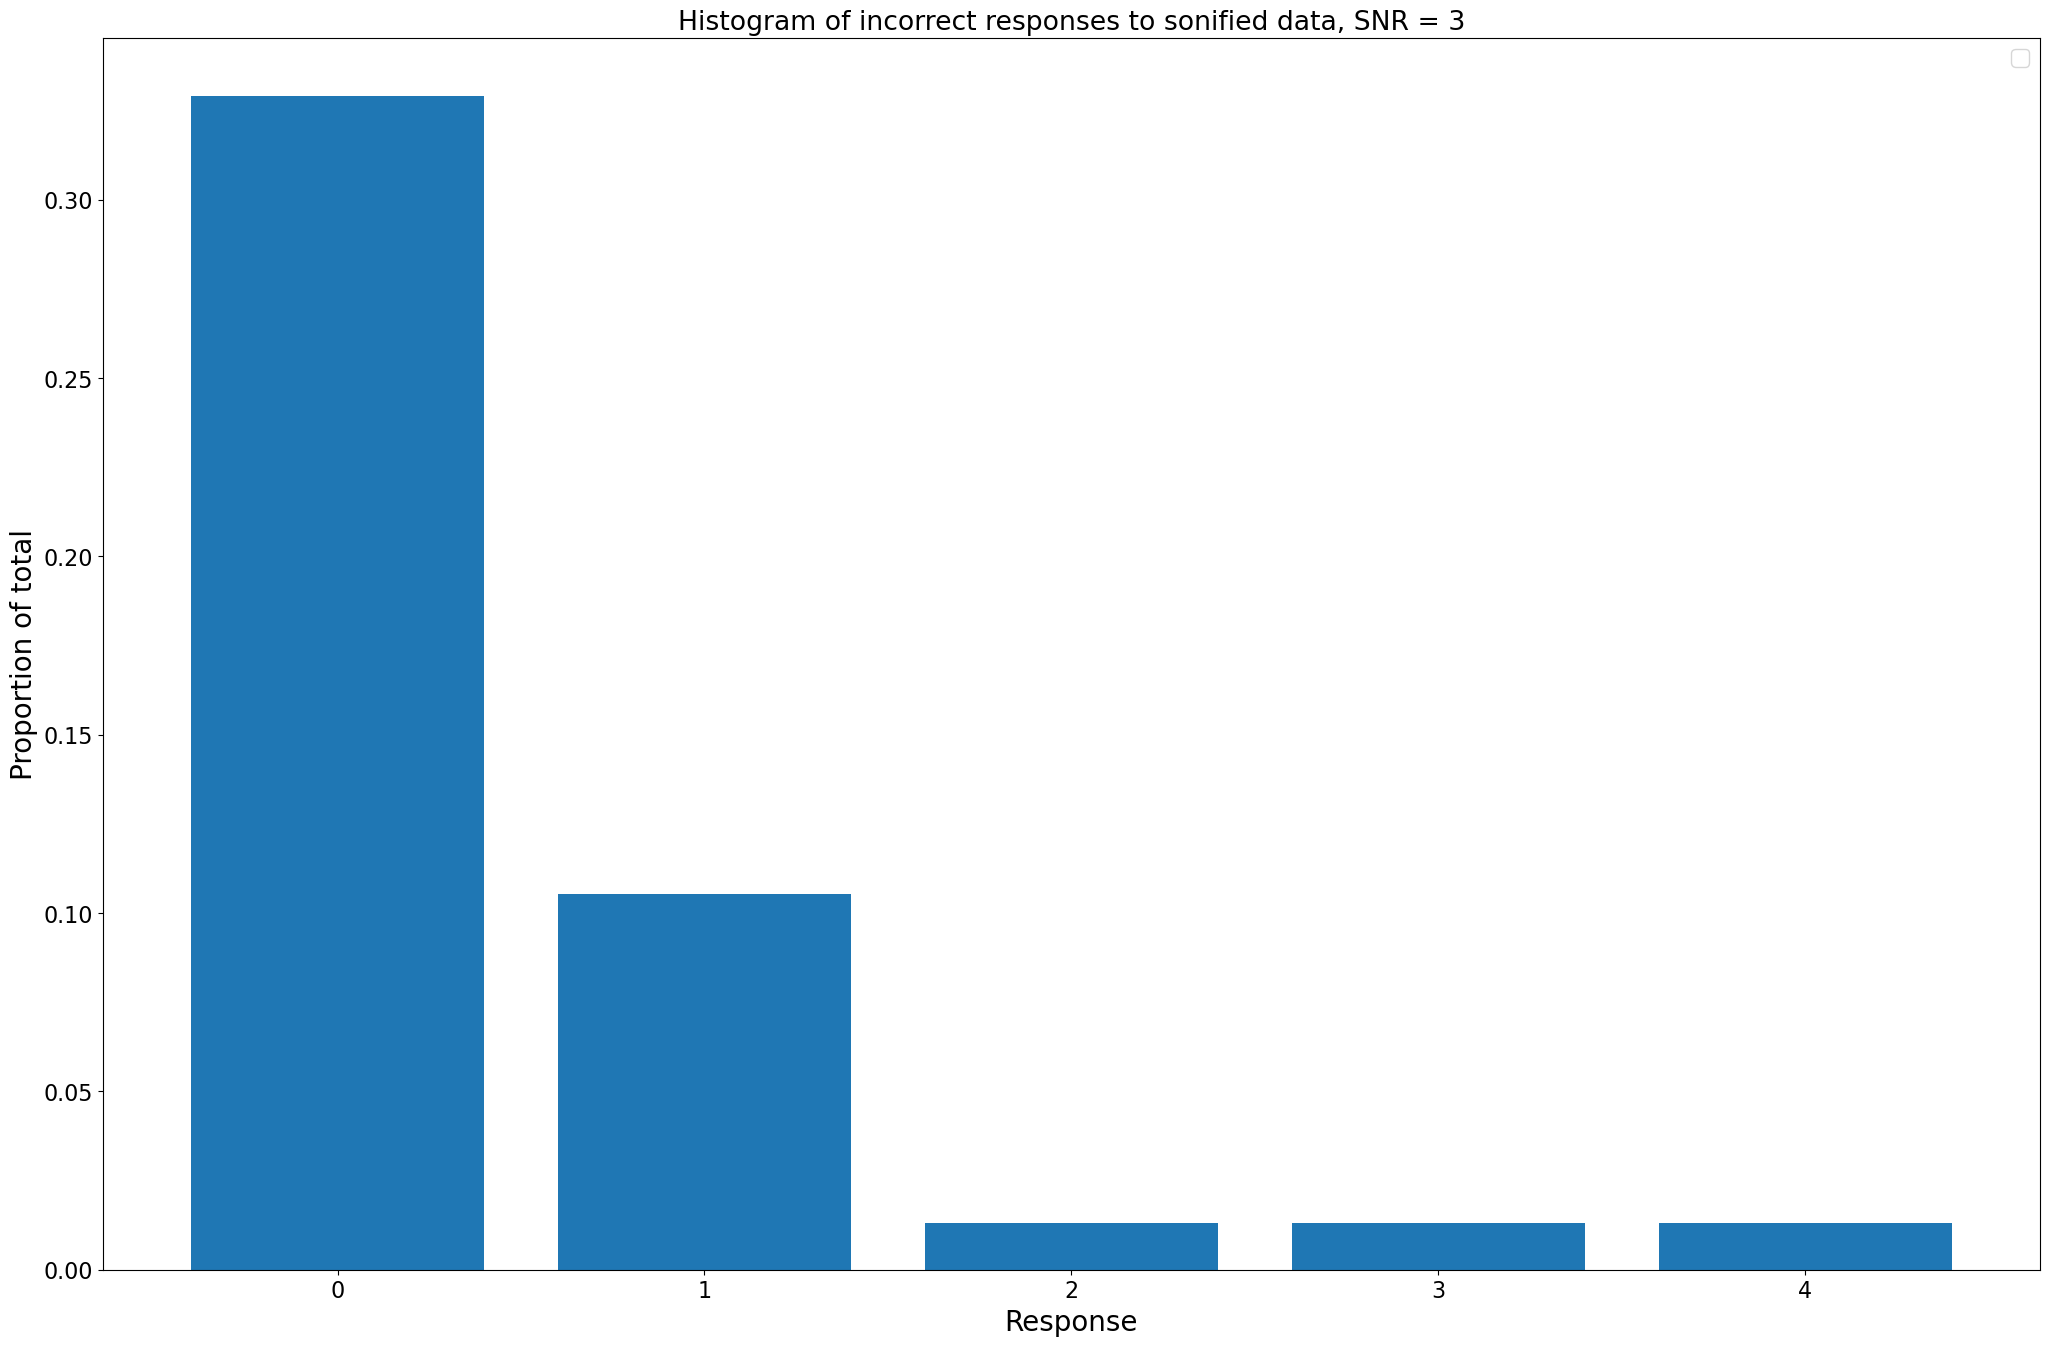

In [126]:
df_sound_3 = df_sound[df_sound.SNR != '100']
df_sound_3 = df_sound_3[df_sound.SNR != '30']
df_sound_3 = df_sound_3[df_sound.SNR != '10']
df_sound_3 = df_sound_3[df_sound.SNR != '7']
df_sound_3 = df_sound_3[df_sound.SNR != '5']

display(df_sound_3)

total = 22+32+22

totals = [0,0,0,0,0]

for i in range(0,len(df_sound_3['Name'])):
    
    totals_i = [float(df_sound_3.iloc[i]['# of 0s']),float(df_sound_3.iloc[i]['# of 1s']),
                float(df_sound_3.iloc[i]['# of 2s']),float(df_sound_3.iloc[i]['# of 3s']),
                float(df_sound_3.iloc[i]['# of 4s'])]
    #print(totals_i)
    
    totals = np.add([x/total for x in totals_i],totals)
    #print("totals = ",totals)
    
f, ax = plt.subplots(figsize=(25,16))

example_x = [0,1,2,3,4]
ax.bar(example_x,totals)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Proportion of total",fontsize=20)
ax.set_title("Histogram of responses to sonified data, SNR = 3")
ax.legend(loc='best')
plt.savefig("snr = 3 correct responses; sonification")

#-------------------------------------------------------------------
# incorrect responses

totals = [0,0,0,0,0]

for i in range(0,len(df_sound_3['Name'])):
    
    tru = float(df_sound_3.iloc[i]['Correct n'])
    #print("The right answer was",tru)
    
    totals_i = [float(df_sound_3.iloc[i]['# of 0s']),float(df_sound_3.iloc[i]['# of 1s']),
                float(df_sound_3.iloc[i]['# of 2s']),float(df_sound_3.iloc[i]['# of 3s']),
                float(df_sound_3.iloc[i]['# of 4s'])]
    
    #for x in range(0,len(totals_i)):
    for n, i in enumerate(example_x):
        if i == tru:
            totals_i[n] = 0
            #print(totals_i[n])
        #if totals_i[x] == tru:
         #   totals_i[x] == 0
            #print("x =",x)
        else:
            continue
            
    #print("totals_i = ",totals_i)
    
    totals = np.add([x/total for x in totals_i],totals)
    print("totals = ",totals)
    
f, ax = plt.subplots(figsize=(25,16))

ax.bar(example_x,totals)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Proportion of total",fontsize=20)
ax.legend(loc='best')
ax.set_title("Histogram of incorrect responses to sonified data, SNR = 3")
plt.savefig("snr = 3 incorrect responses; sonification")

SNR = 5

<ipython-input-127-2bb602b55a02>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_5 = df_sound_5[df_sound.SNR != '30']
<ipython-input-127-2bb602b55a02>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_5 = df_sound_5[df_sound.SNR != '10']
<ipython-input-127-2bb602b55a02>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_5 = df_sound_5[df_sound.SNR != '7']
<ipython-input-127-2bb602b55a02>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_5 = df_sound_5[df_sound.SNR != '3']


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
10,Here is the link to sonification 123: https://...,0,14,15,14,1,0,0,0,0,0,3.872983346207417,5,3
7,Here is the link to sonification 17: https://d...,1,2,22,19,2,0,1,0,0,0,4.69041575982343,5,2
2,Here is the link to sonification 49: https://d...,2,2,22,15,5,2,0,0,0,0,4.69041575982343,5,1


No handles with labels found to put in legend.
No handles with labels found to put in legend.


totals =  [0.         0.01234568 0.         0.         0.        ]
totals =  [0.2345679  0.01234568 0.         0.01234568 0.        ]
totals =  [0.41975309 0.07407407 0.         0.01234568 0.        ]


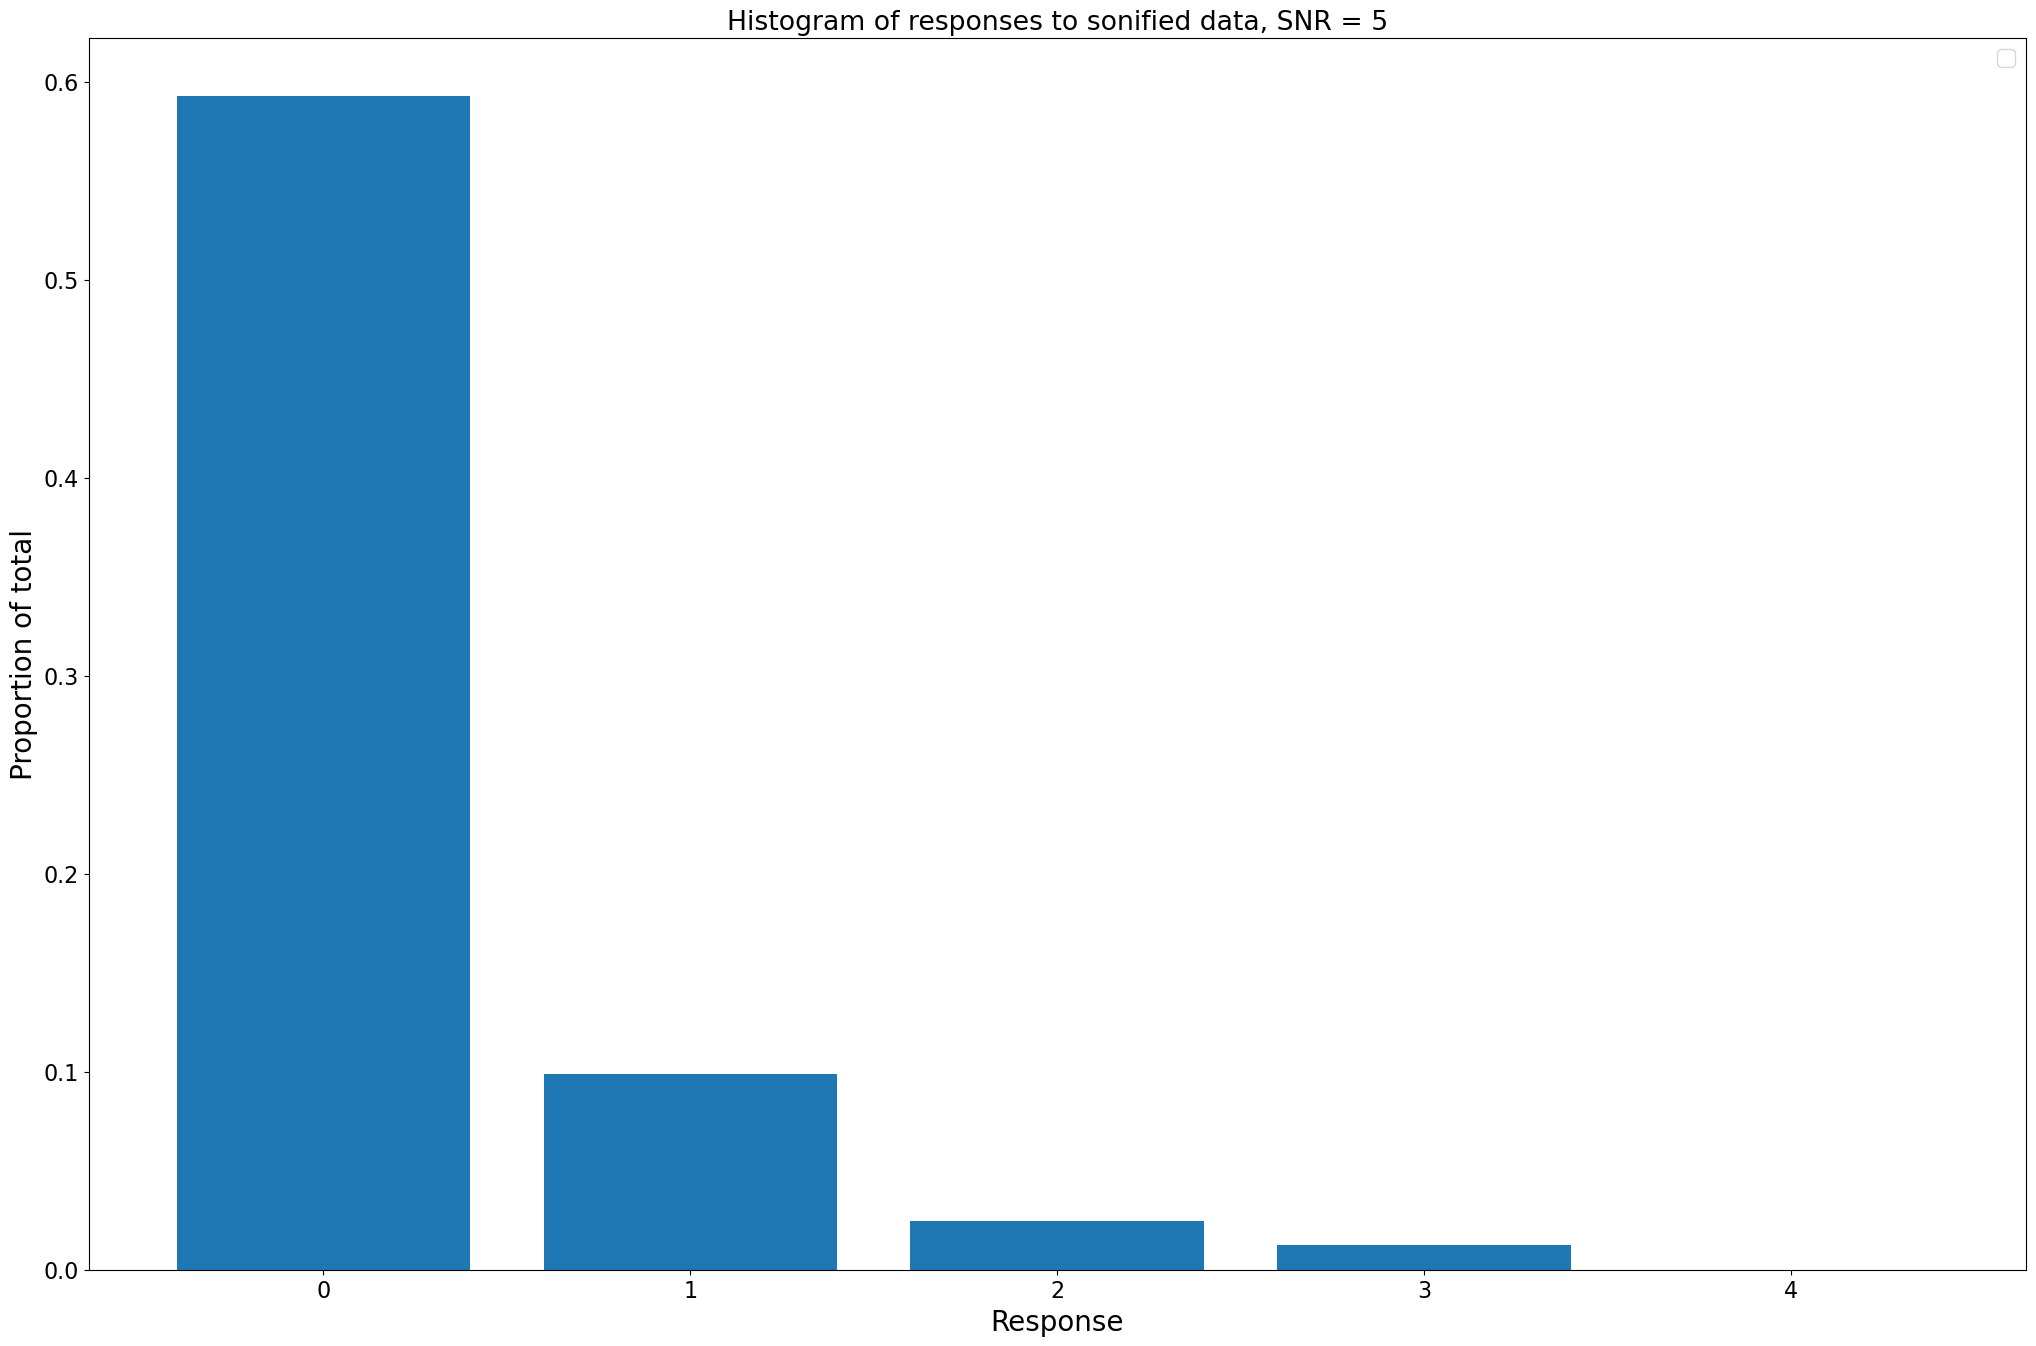

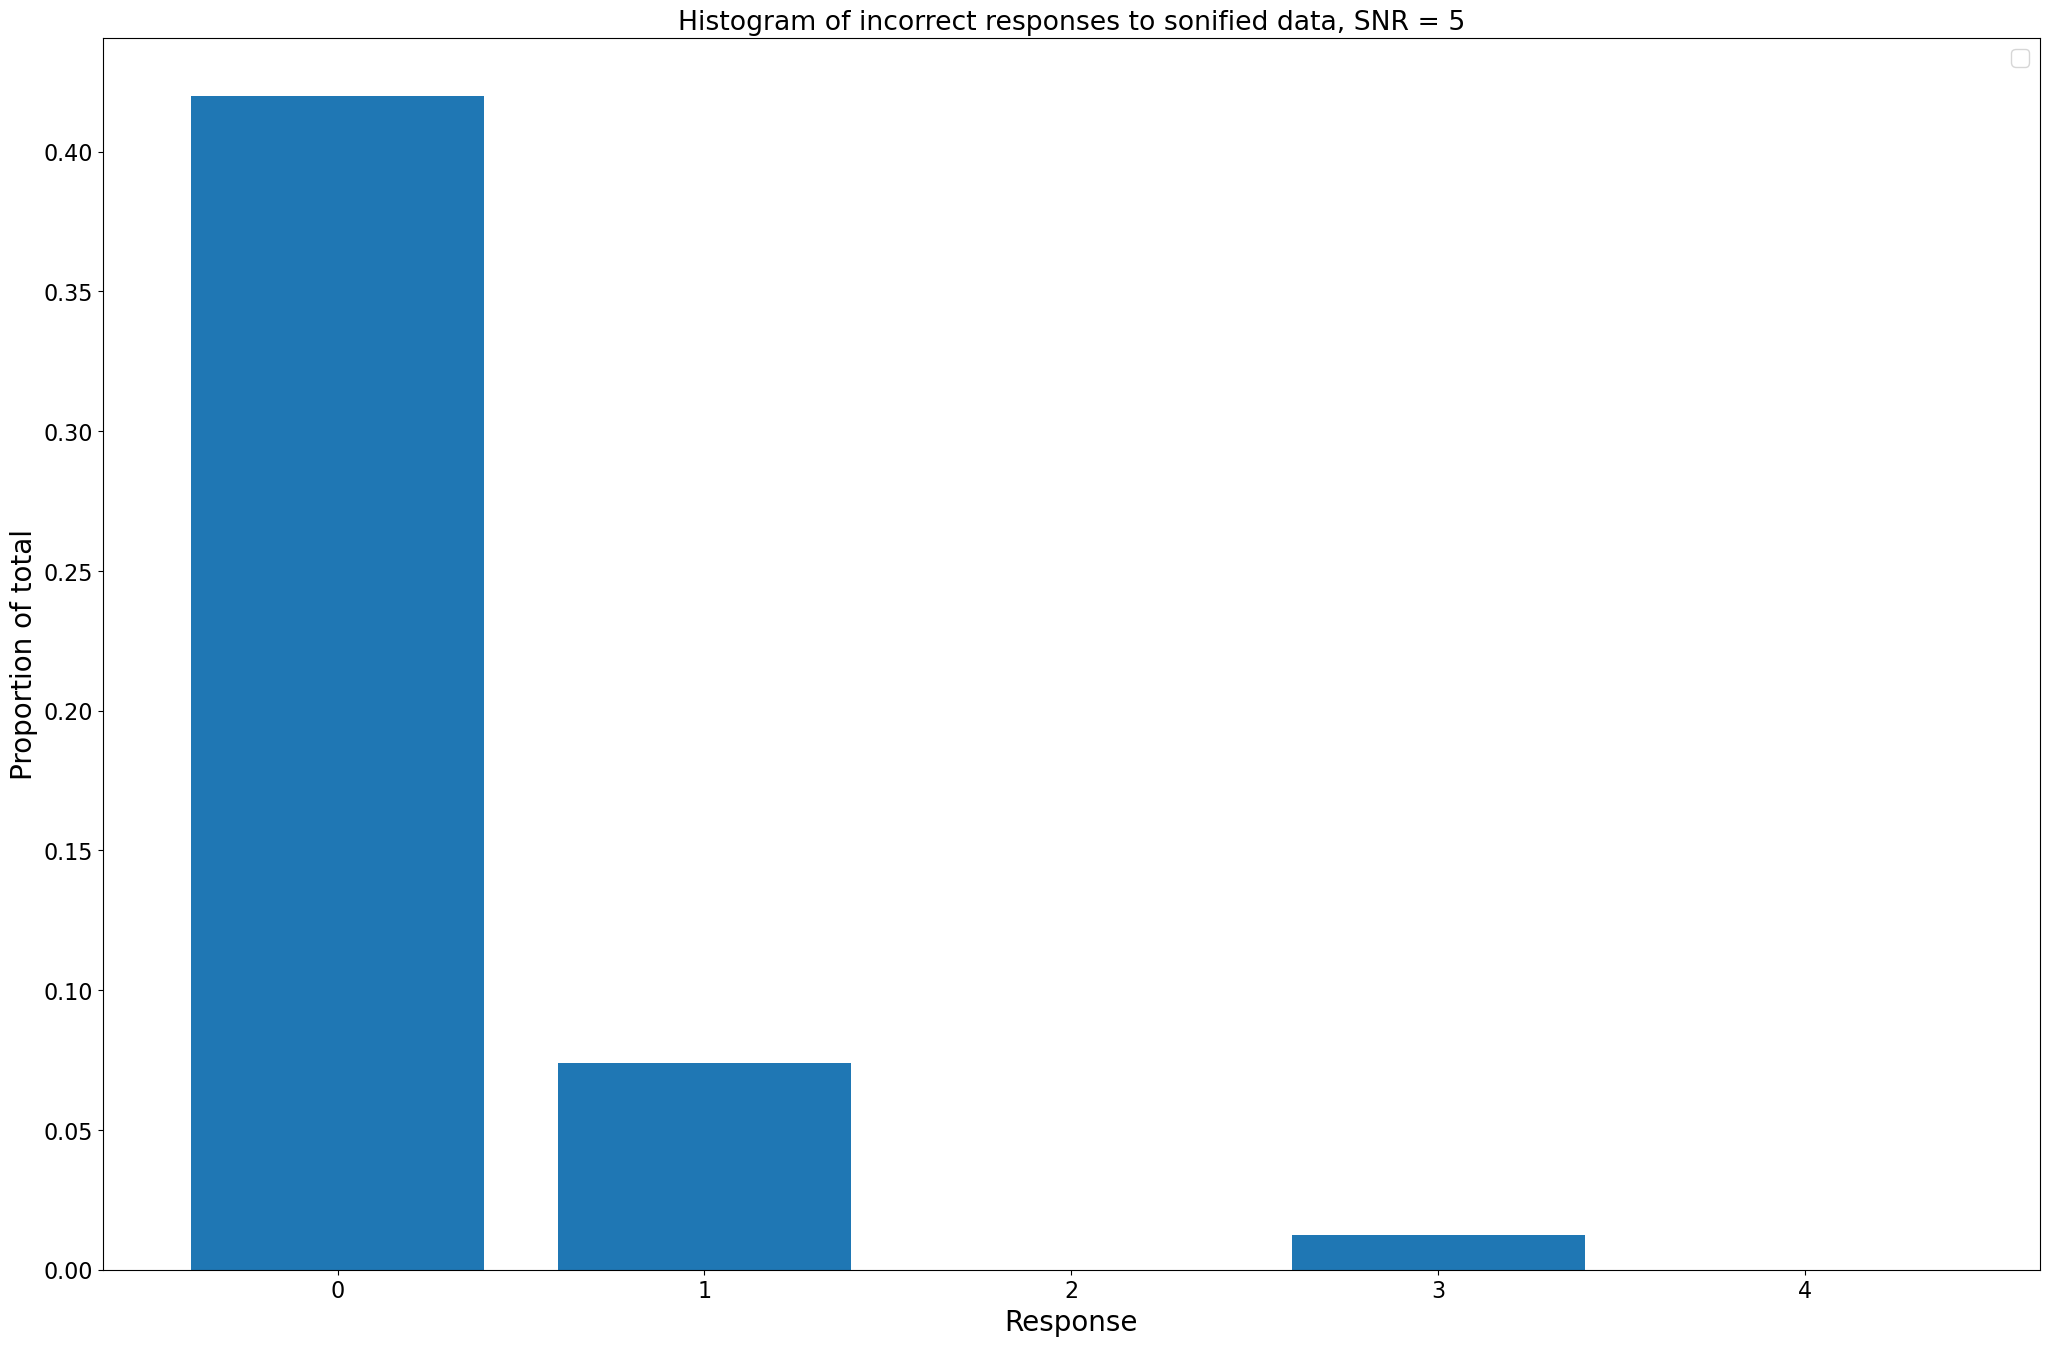

In [127]:
df_sound_5 = df_sound[df_sound.SNR != '100']
df_sound_5 = df_sound_5[df_sound.SNR != '30']
df_sound_5 = df_sound_5[df_sound.SNR != '10']
df_sound_5 = df_sound_5[df_sound.SNR != '7']
df_sound_5 = df_sound_5[df_sound.SNR != '3']

display(df_sound_5)


total = 21+28+32
totals = [0,0,0,0,0]

for i in range(0,len(df_sound_5['Name'])):
    
    totals_i = [float(df_sound_5.iloc[i]['# of 0s']),float(df_sound_5.iloc[i]['# of 1s']),
                float(df_sound_5.iloc[i]['# of 2s']),float(df_sound_5.iloc[i]['# of 3s']),
                float(df_sound_5.iloc[i]['# of 4s'])]
    #print(totals_i)
    
    totals = np.add([x/total for x in totals_i],totals)
    #print("totals = ",totals)
    
f, ax = plt.subplots(figsize=(25,16))

example_x = [0,1,2,3,4]
ax.bar(example_x,totals)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Proportion of total",fontsize=20)
ax.set_title("Histogram of responses to sonified data, SNR = 5")
ax.legend(loc='best')
plt.savefig("snr = 5 correct responses; sonification")

#-------------------------------------------------------------------
# incorrect responses

totals = [0,0,0,0,0]

for i in range(0,len(df_sound_5['Name'])):
    
    tru = float(df_sound_5.iloc[i]['Correct n'])
    #print("The right answer was",tru)
    
    totals_i = [float(df_sound_5.iloc[i]['# of 0s']),float(df_sound_5.iloc[i]['# of 1s']),
                float(df_sound_5.iloc[i]['# of 2s']),float(df_sound_5.iloc[i]['# of 3s']),
                float(df_sound_5.iloc[i]['# of 4s'])]
    
    #for x in range(0,len(totals_i)):
    for n, i in enumerate(example_x):
        if i == tru:
            totals_i[n] = 0
            #print(totals_i[n])
        #if totals_i[x] == tru:
         #   totals_i[x] == 0
            #print("x =",x)
        else:
            continue
            
    #print("totals_i = ",totals_i)
    
    totals = np.add([x/total for x in totals_i],totals)
    print("totals = ",totals)
    
f, ax = plt.subplots(figsize=(25,16))

ax.bar(example_x,totals)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Proportion of total",fontsize=20)
ax.legend(loc='best')
ax.set_title("Histogram of incorrect responses to sonified data, SNR = 5")
plt.savefig("snr = 5 incorrect responses; sonification")

SNR = 7

<ipython-input-129-fad6acb3cd2f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_7 = df_sound_7[df_sound.SNR != '30']
<ipython-input-129-fad6acb3cd2f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_7 = df_sound_7[df_sound.SNR != '10']
<ipython-input-129-fad6acb3cd2f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_7 = df_sound_7[df_sound.SNR != '5']
<ipython-input-129-fad6acb3cd2f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sound_7 = df_sound_7[df_sound.SNR != '3']


,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
14,Here is the link to sonification 161: https://...,0,13,15,13,0,0,2,0,0,0,3.872983346207417,7,5
12,Here is the link to sonification 28: https://d...,1,8,25,17,8,0,0,0,0,0,5.0990195135927845,7,4
13,Here is the link to sonification 15: https://d...,2,2,15,8,5,2,0,0,0,0,3.872983346207417,7,5


No handles with labels found to put in legend.
No handles with labels found to put in legend.


totals =  [0.         0.         0.         0.02739726 0.        ]
totals =  [0.23287671 0.         0.         0.02739726 0.        ]
totals =  [0.34246575 0.06849315 0.         0.02739726 0.        ]


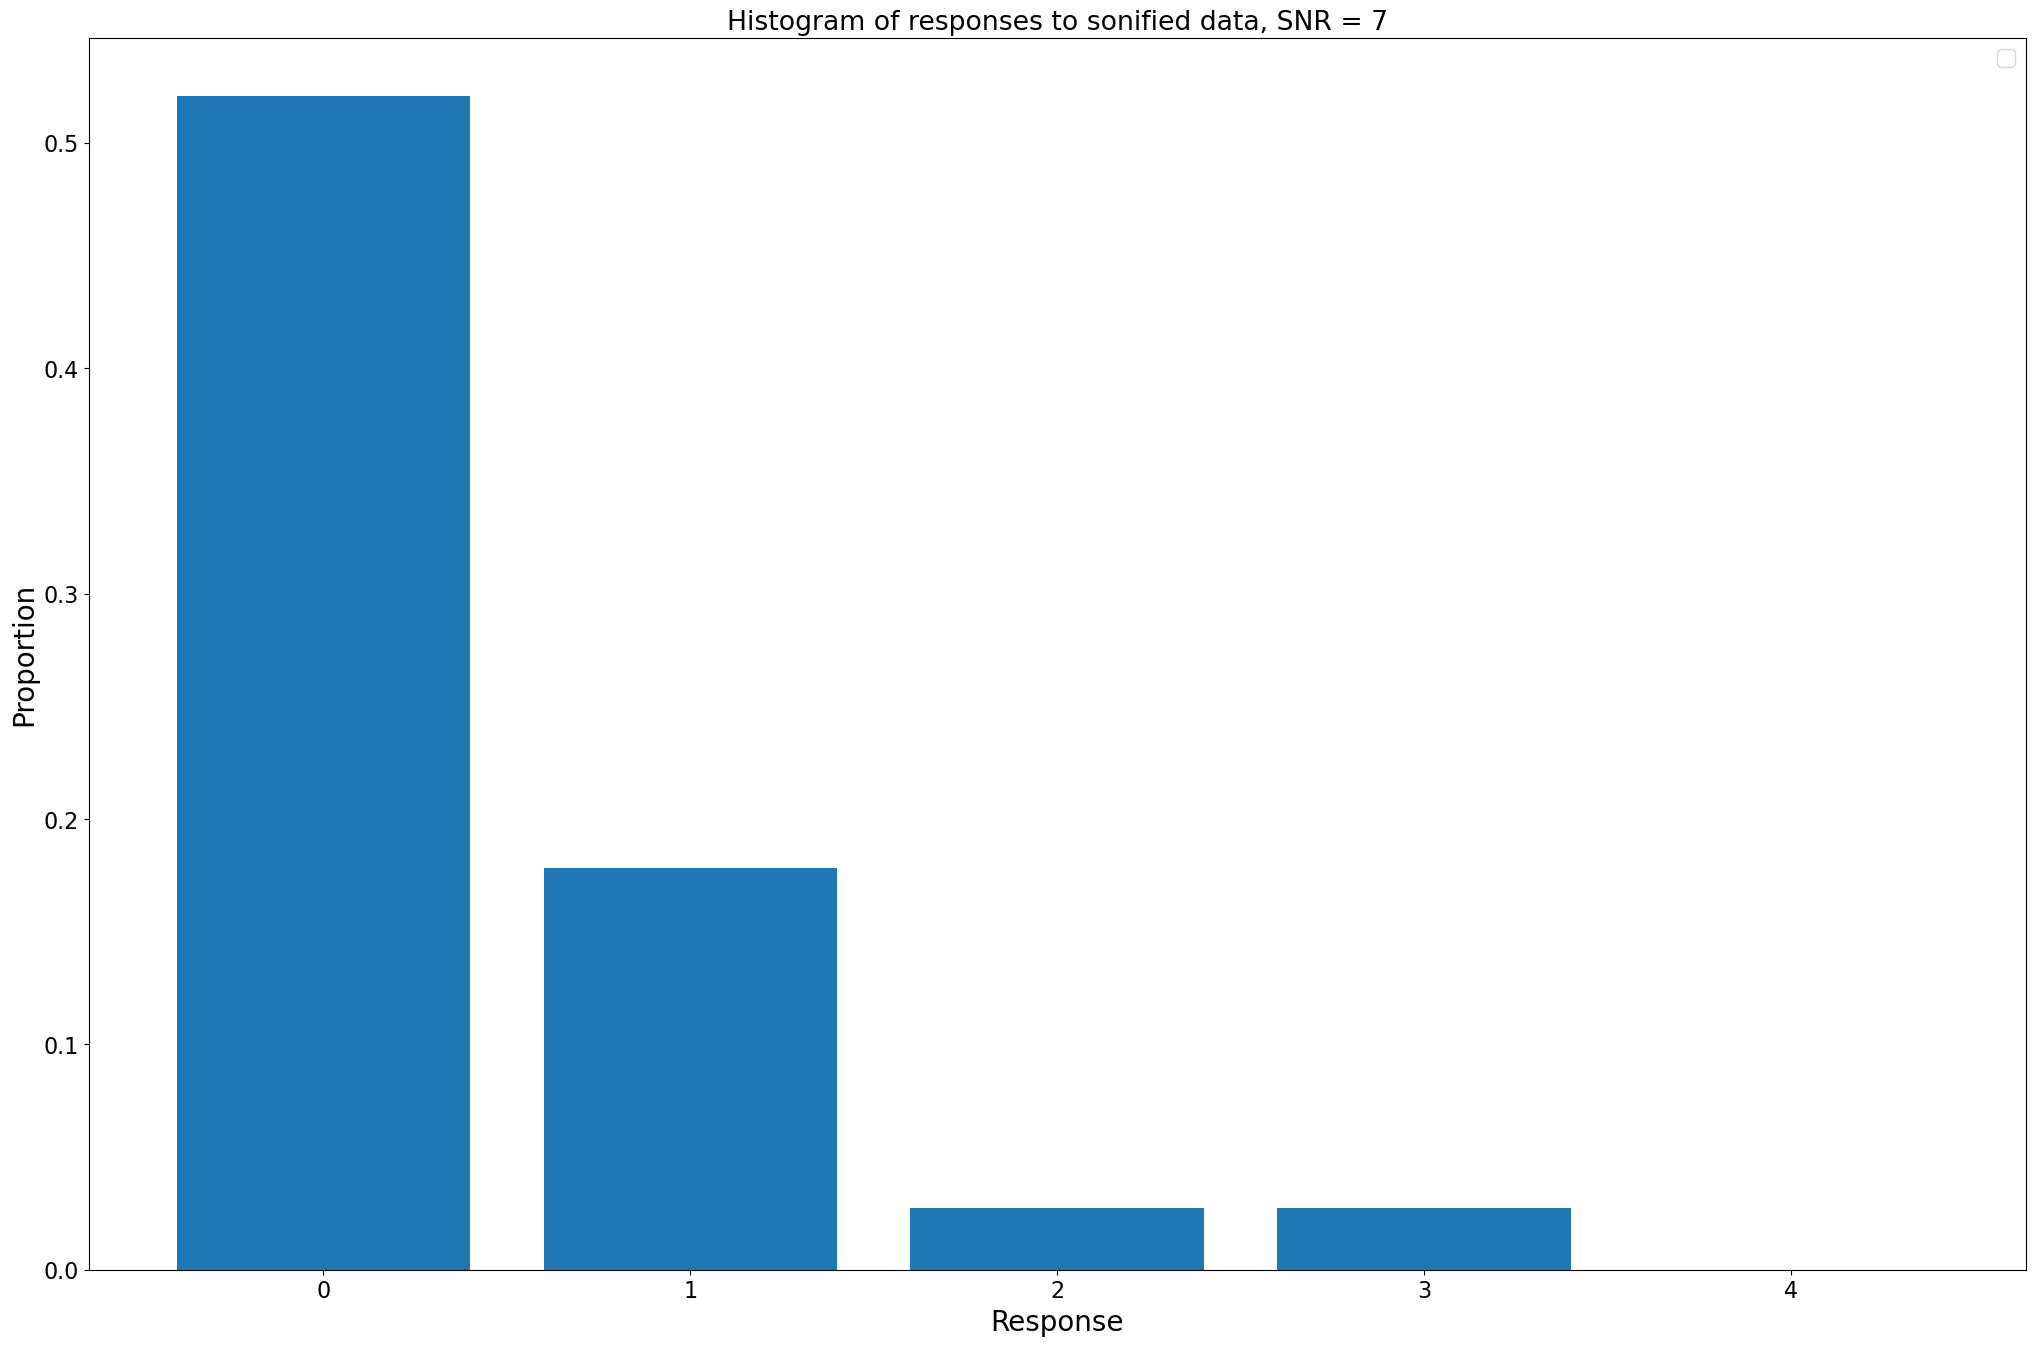

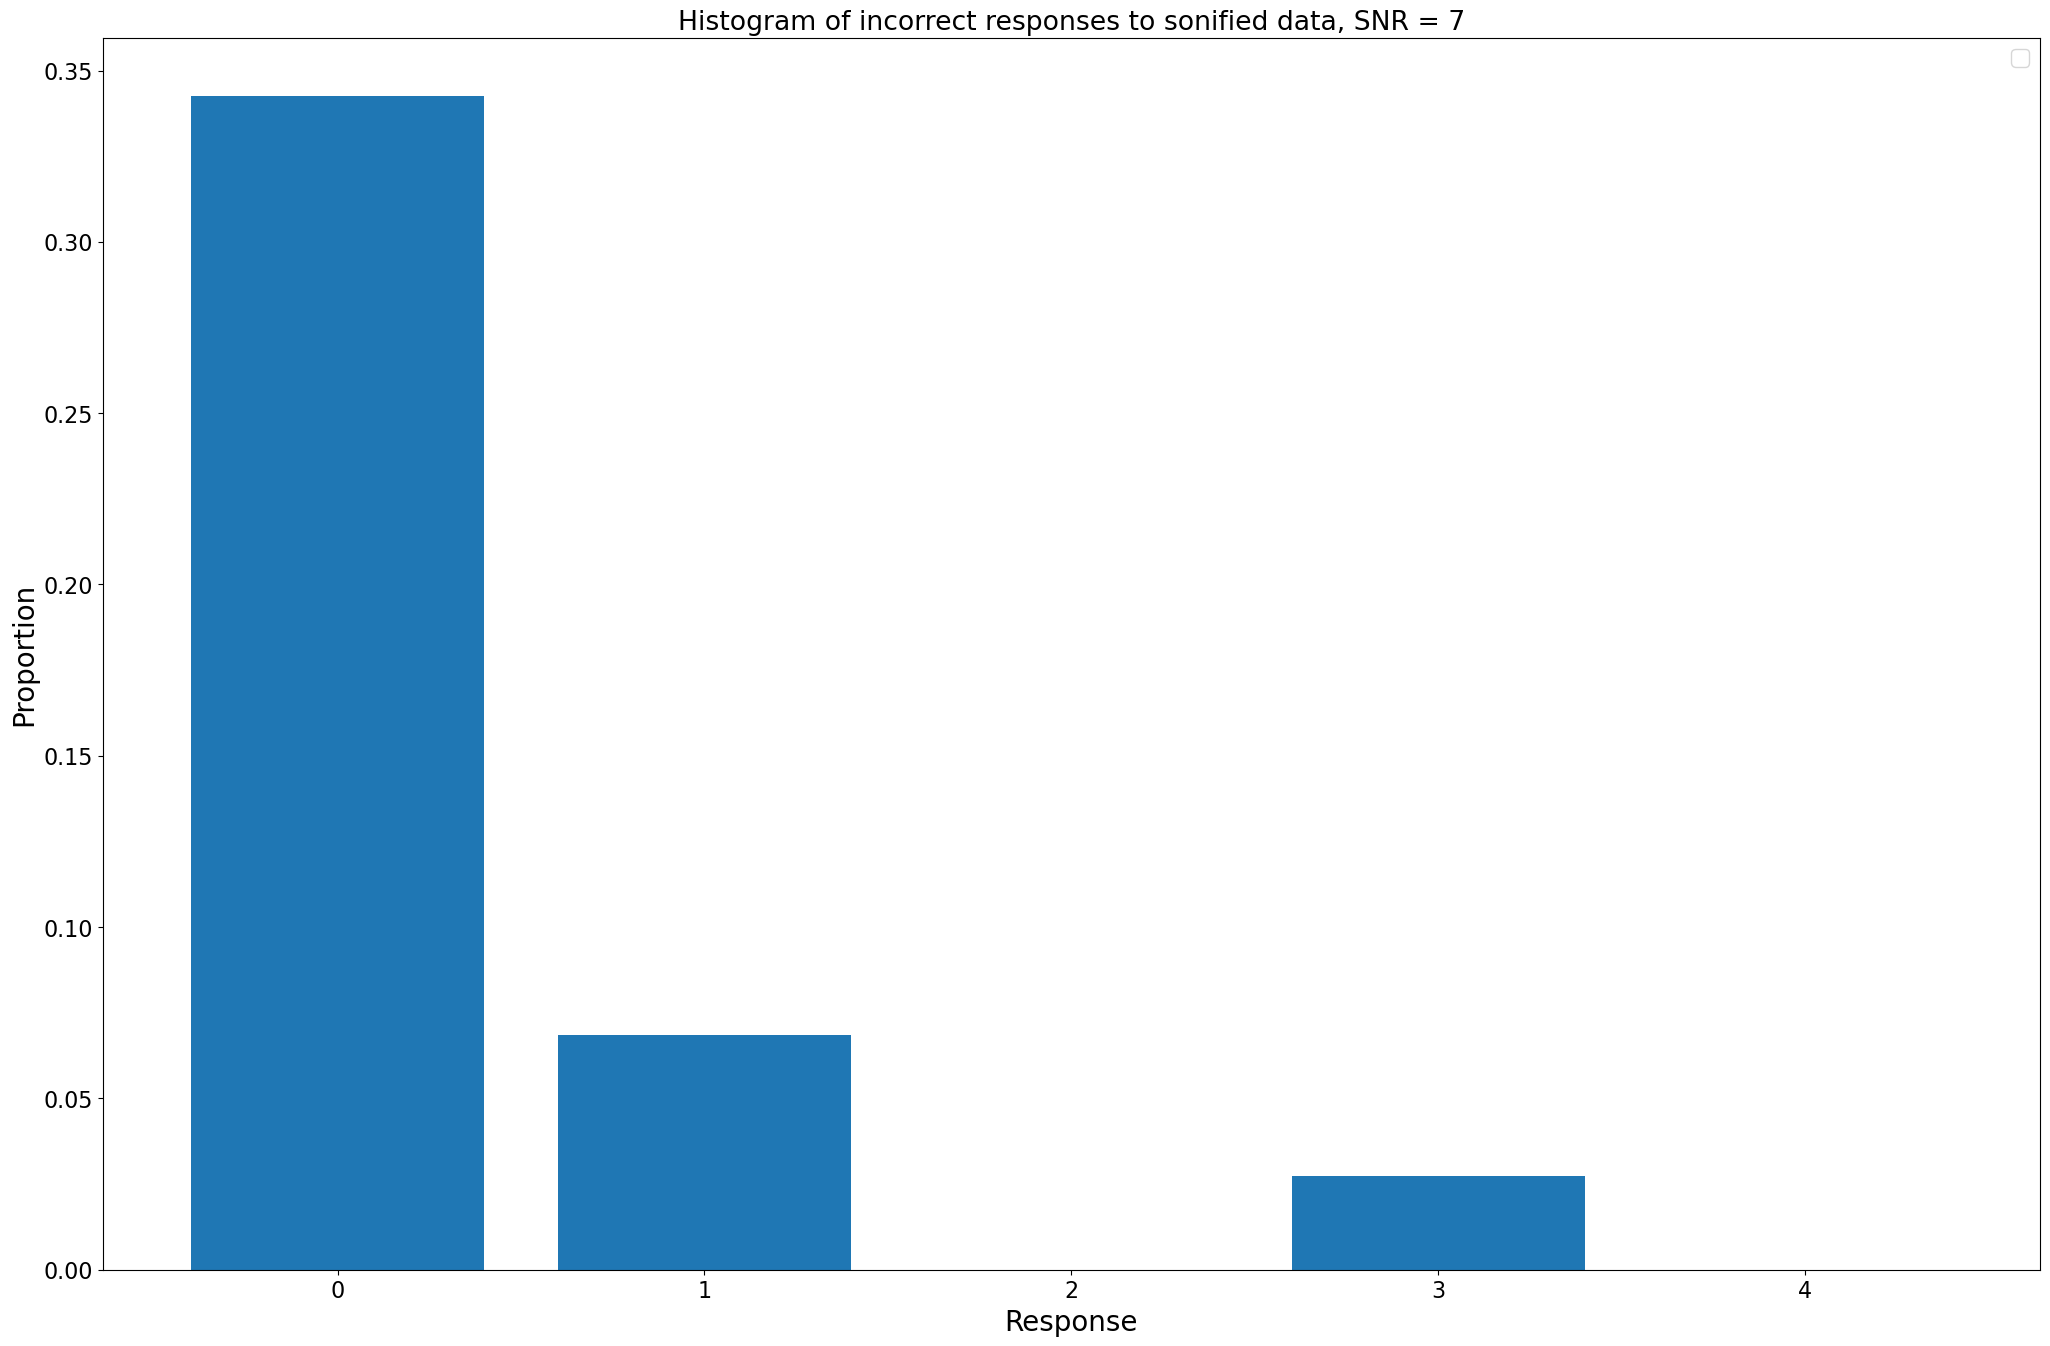

In [129]:
df_sound_7 = df_sound[df_sound.SNR != '100']
df_sound_7 = df_sound_7[df_sound.SNR != '30']
df_sound_7 = df_sound_7[df_sound.SNR != '10']
df_sound_7 = df_sound_7[df_sound.SNR != '5']
df_sound_7 = df_sound_7[df_sound.SNR != '3']

display(df_sound_7)

total = 22 + 29 +22
totals = [0,0,0,0,0]

for i in range(0,len(df_sound_7['Name'])):
    
    totals_i = [float(df_sound_7.iloc[i]['# of 0s']),float(df_sound_7.iloc[i]['# of 1s']),
                float(df_sound_7.iloc[i]['# of 2s']),float(df_sound_7.iloc[i]['# of 3s']),
                float(df_sound_7.iloc[i]['# of 4s'])]
    #print(totals_i)
    
    totals = np.add([x/total for x in totals_i],totals)
    #print("totals = ",totals)
    
f, ax = plt.subplots(figsize=(25,16))

example_x = [0,1,2,3,4]
ax.bar(example_x,totals)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Proportion",fontsize=20)
ax.set_title("Histogram of responses to sonified data, SNR = 7")
ax.legend(loc='best')
plt.savefig("snr = 7 correct responses; sonification")

#-------------------------------------------------------------------
# incorrect responses

totals = [0,0,0,0,0]

for i in range(0,len(df_sound_7['Name'])):
    
    tru = float(df_sound_7.iloc[i]['Correct n'])
    #print("The right answer was",tru)
    
    totals_i = [float(df_sound_7.iloc[i]['# of 0s']),float(df_sound_7.iloc[i]['# of 1s']),
                float(df_sound_7.iloc[i]['# of 2s']),float(df_sound_7.iloc[i]['# of 3s']),
                float(df_sound_7.iloc[i]['# of 4s'])]
    
    #for x in range(0,len(totals_i)):
    for n, i in enumerate(example_x):
        if i == tru:
            totals_i[n] = 0
            #print(totals_i[n])
        #if totals_i[x] == tru:
         #   totals_i[x] == 0
            #print("x =",x)
        else:
            continue
            
    #print("totals_i = ",totals_i)
    
    totals = np.add([x/total for x in totals_i],totals)
    print("totals = ",totals)
    
f, ax = plt.subplots(figsize=(25,16))

ax.bar(example_x,totals)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Proportion",fontsize=20)
ax.legend(loc='best')
ax.set_title("Histogram of incorrect responses to sonified data, SNR = 7")
plt.savefig("snr = 7 incorrect responses; sonification")

Combined for SNR = 3, 5 and 7

,Name,Correct n,Number of correct answers,Total responses,# of 0s,# of 1s,# of 2s,# of 3s,# of 4s,KS statistic,KS p-value,σ,SNR,Survey
14,Here is the link to sonification 161: https://...,0,19,22,19,1,0,2,0,0.6136363636363636,1.7024921845004416e-08,0.8731533051044794,7,5
10,Here is the link to sonification 123: https://...,0,17,21,17,4,0,0,0,0.5595238095238095,1.0086624741052983e-06,0.39267672624930106,5,3
17,Here is the link to sonification 110: https://...,0,17,22,17,3,1,0,1,0.5227272727272727,4.015590814640108e-06,0.93706946036765,3,6
7,Here is the link to sonification 17: https://d...,1,3,28,23,3,1,1,0,0.5714285714285714,3.525988160370623e-09,0.6998542122237652,5,2
12,Here is the link to sonification 28: https://d...,1,10,29,18,10,1,0,0,0.4655172413793104,2.8037621580624622e-06,0.5567306167185677,7,4
0,Here is the link to sonification 91: https://d...,1,1,32,25,1,1,4,1,0.53125,5.880538797173715e-09,1.19528696868158,3,1
2,Here is the link to sonification 49: https://d...,2,3,32,20,5,3,0,4,0.375,0.00015015335773116095,1.3488276159317023,5,1
13,Here is the link to sonification 15: https://d...,2,3,22,12,7,3,0,0,0.36363636363636365,0.004098499095644859,0.7172606290027046,7,5
15,Here is the link to sonification 18: https://d...,2,3,22,9,9,3,1,0,0.31818181818181823,0.017640392422226592,0.8331955809010618,3,5


No handles with labels found to put in legend.
No handles with labels found to put in legend.


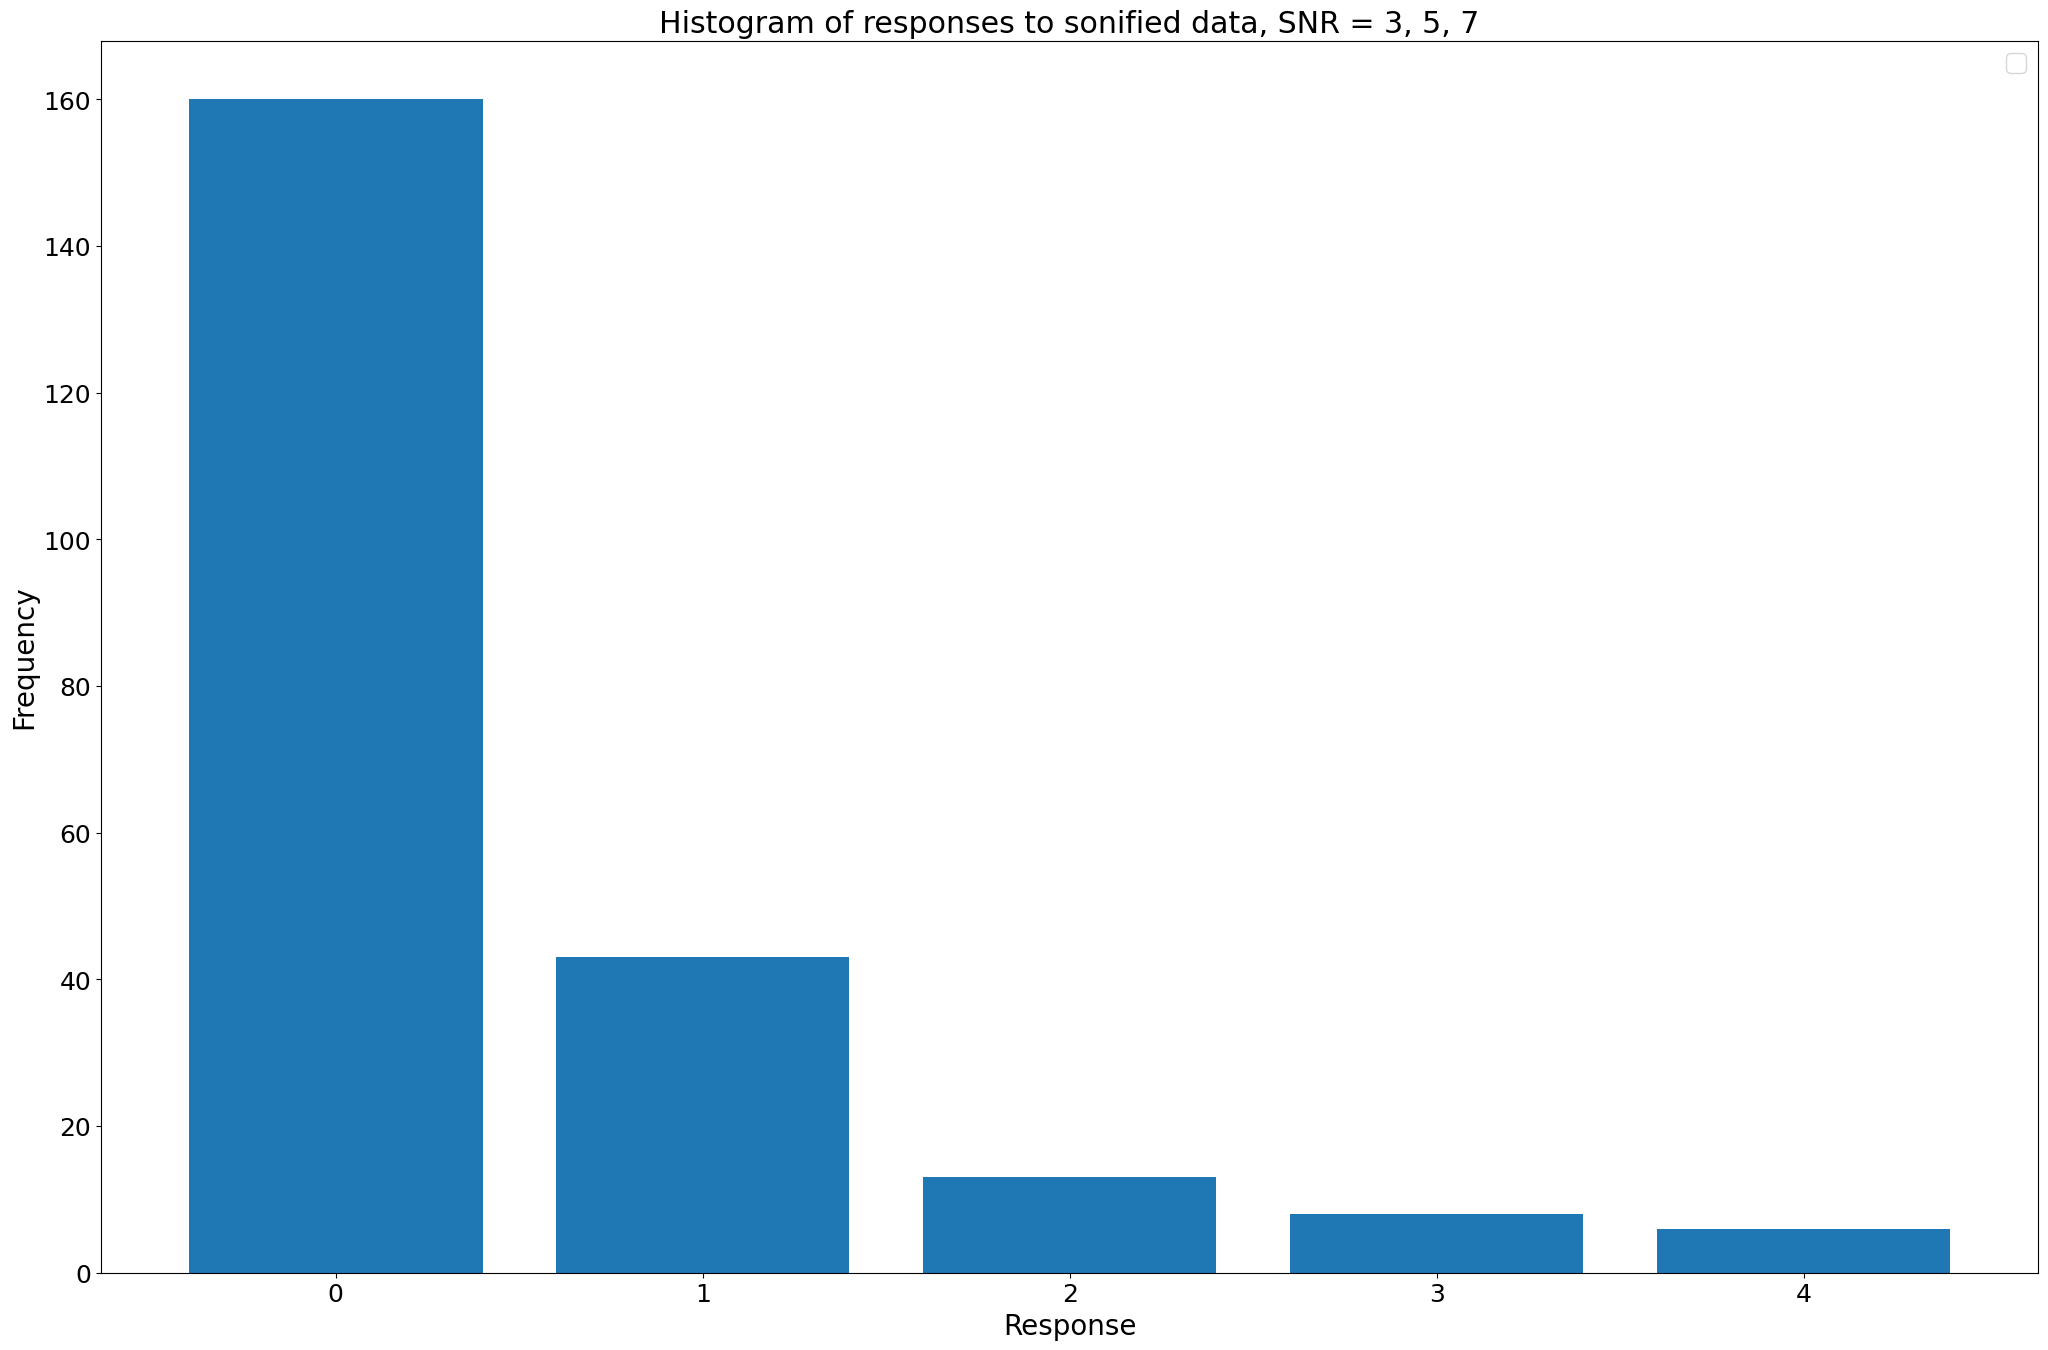

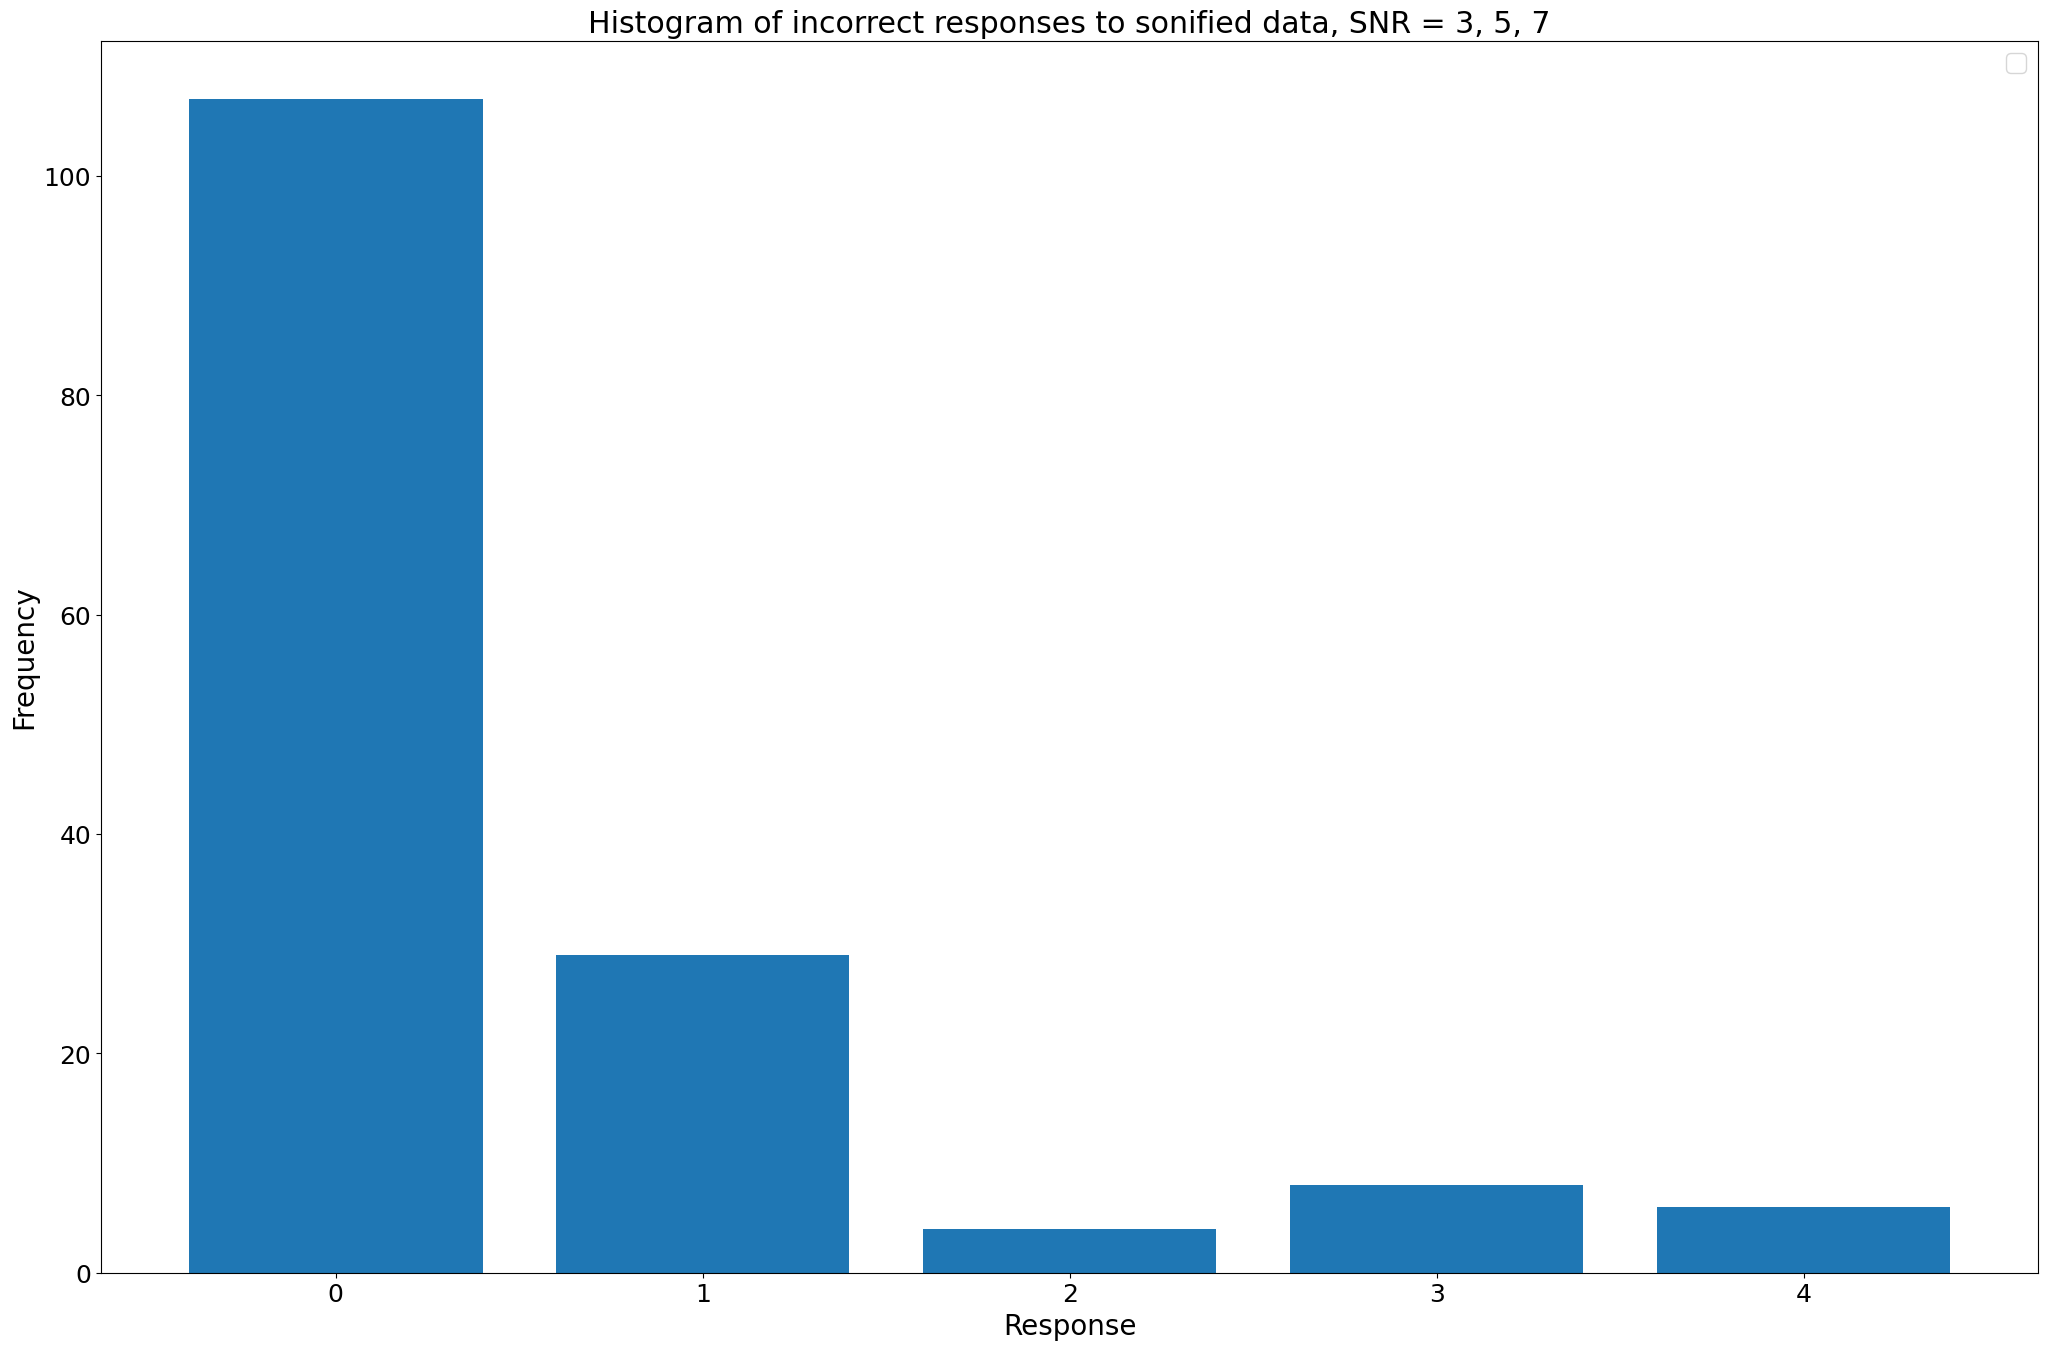

In [87]:
df_sound = df_sound[df_sound.SNR != '100']
df_sound = df_sound[df_sound.SNR != '30']
df_sound = df_sound[df_sound.SNR != '10']

display(df_sound)

#-----------------------------------------
# correct responses

totals = [0,0,0,0,0]

for i in range(0,len(df_sound['Name'])):
    
    totals_i = [float(df_sound.iloc[i]['# of 0s']),float(df_sound.iloc[i]['# of 1s']),
                float(df_sound.iloc[i]['# of 2s']),float(df_sound.iloc[i]['# of 3s']),
                float(df_sound.iloc[i]['# of 4s'])]
    #print(totals_i)
    
    totals = np.add(totals_i,totals)
    #print("totals = ",totals)
    
f, ax = plt.subplots(figsize=(25,16))

example_x = [0,1,2,3,4]
ax.bar(example_x,totals)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Frequency",fontsize=20)
ax.set_title("Histogram of responses to sonified data, SNR = 3, 5, 7")
ax.legend(loc='best')
plt.savefig("snr = 3,5,7 correct responses; sonification")

#-------------------------------------------------------------------
# incorrect responses

totals = [0,0,0,0,0]

for i in range(0,len(df_sound['Name'])):
    
    tru = float(df_sound.iloc[i]['Correct n'])
    #print("The right answer was",tru)
    
    totals_i = [float(df_sound.iloc[i]['# of 0s']),float(df_sound.iloc[i]['# of 1s']),
                float(df_sound.iloc[i]['# of 2s']),float(df_sound.iloc[i]['# of 3s']),
                float(df_sound.iloc[i]['# of 4s'])]
    
    #for x in range(0,len(totals_i)):
    for n, i in enumerate(example_x):
        if i == tru:
            totals_i[n] = 0
            #print(totals_i[n])
        #if totals_i[x] == tru:
         #   totals_i[x] == 0
            #print("x =",x)
        else:
            continue
            
    #print("totals_i = ",totals_i)
    
    totals = np.add(totals_i,totals)
    #print("totals = ",totals)
    
f, ax = plt.subplots(figsize=(25,16))

ax.bar(example_x,totals)
ax.set_xlabel("Response",fontsize=20)
ax.set_ylabel("Frequency",fontsize=20)
ax.legend(loc='best')
ax.set_title("Histogram of incorrect responses to sonified data, SNR = 3, 5, 7")
plt.savefig("snr = 3,5,7 incorrect responses; sonification")

## Response rate against time

In [11]:
from datetime import datetime
import random

In [12]:
timestamp = pd.DataFrame({'Time': [],
                          'Day': []})

freq = pd.DataFrame({'Day': [],
                     'Frequency':[]})

def response(survey_sheet):
    
    sh = gc.open(survey_sheet) # Open the response spreadsheet and assign the worksheet
    worksheet = sh.sheet1
    
    print("I opened", survey_sheet)
    print("")
    
    timecol = worksheet.col_values(1,0)
    timecol.pop(0)
    
    freq = []
    day = []
    
    global timestamp
    
    for idx in timecol:
        
        date_time_obj = datetime.strptime(idx, '%m/%d/%Y %H:%M:%S')
        timestamp = timestamp.append({'Time' : [date_time_obj],
                                      'Day' : float(date_time_obj.strftime('%d'))-21.0},
                                      ignore_index = 'True')
        
    #display(timestamp)
    
    if survey_sheet == 'Survey 6 (Responses)':
        
        string = 'test' + str(random.randint(1,5)) + '.xlsx'
        freq = timestamp['Day'].value_counts(normalize=True, sort=True, ascending=True)
        timestamp.to_excel(string, sheet_name='sheet1', index=False)
        
for x in names:
    response(x)
    
print("Finished timestamping")

I opened Survey 1 (Responses)

I opened Survey 2 (Responses)

I opened Survey 3 (Responses)

I opened Survey 4 (Responses)

I opened Survey 5 (Responses)

I opened Survey 6 (Responses)

Finished timestamping


Have to insert the file name into responses

In [15]:
import datetime
import time
from datetime import date

,Real day,Freq
0,1.0,30.0
1,2.0,45.0
2,3.0,8.0
3,4.0,23.0
4,5.0,9.0
...,...,...
150,NaN,NaN
151,NaN,NaN
152,NaN,NaN
153,NaN,NaN


Number of days survey has been released: 27


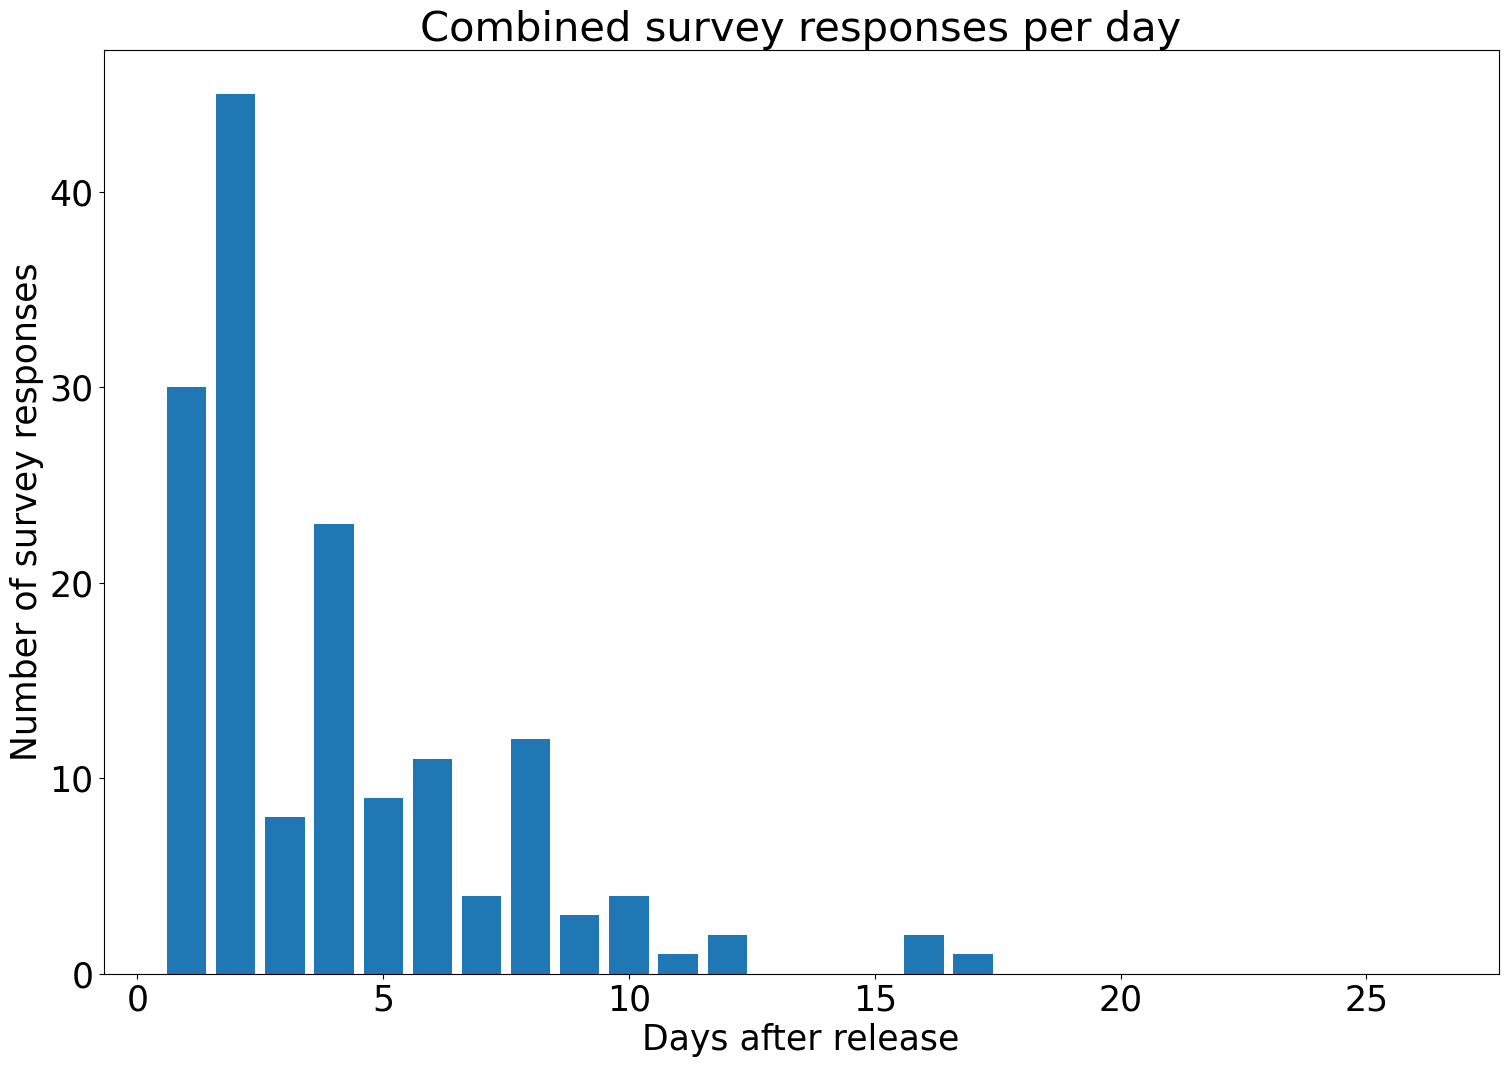

In [21]:
matplotlib.rcParams.update({'font.size': 25})
responses = pd.read_excel(r'C:\Users\jackt\OneDrive - Newcastle University\Project\Survey work\test3.xlsx')
#print(responses)

df = pd.DataFrame(responses, columns= ['Real day','Freq'])
display(df)

day = []
freq = []

start = datetime.date(21,3,22)
start = float(start.strftime('%d'))
counter = date.today()
counter = float(counter.strftime('%d'))

n = int(start - 21.0 + 9.0 + counter) 

print("Number of days survey has been released:",n)

for idx in range(0,n):
    
    day.append(df['Real day'][idx])
    freq.append(df['Freq'][idx])

f, ax = plt.subplots(figsize=(18,12))

ax.bar(day,freq)
ax.set_xlabel('Days after release')
ax.set_ylabel('Number of survey responses')
ax.set_title('Combined survey responses per day')
plt.savefig("Response rate prelim.jpg")